# Standard modules

In [1]:
import sys
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')
import pandas as pd
import numpy as np
from time import time
from scipy.stats import zscore
pd.options.display.max_colwidth = 1000
from sklearn import show_versions
show_versions()


System:
    python: 3.9.13 | packaged by conda-forge | (main, May 27 2022, 16:56:21)  [GCC 10.3.0]
executable: /home/mauricio/miniconda3/envs/dev/bin/python
   machine: Linux-5.15.0-52-generic-x86_64-with-glibc2.35

Python dependencies:
      sklearn: 1.1.3
          pip: 22.3.1
   setuptools: 65.5.1
        numpy: 1.23.4
        scipy: 1.9.3
       Cython: None
       pandas: 1.5.1
   matplotlib: 3.6.2
       joblib: 1.2.0
threadpoolctl: 3.1.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: mkl
         prefix: libmkl_rt
       filepath: /home/mauricio/miniconda3/envs/dev/lib/libmkl_rt.so.2
        version: 2022.1-Product
threading_layer: intel
    num_threads: 8

       user_api: openmp
   internal_api: openmp
         prefix: libomp
       filepath: /home/mauricio/miniconda3/envs/dev/lib/libomp.so
        version: None
    num_threads: 16


In [2]:
np.show_config()

blas_info:
    libraries = ['cblas', 'blas', 'cblas', 'blas']
    library_dirs = ['/home/mauricio/miniconda3/envs/dev/lib']
    include_dirs = ['/home/mauricio/miniconda3/envs/dev/include']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
blas_opt_info:
    define_macros = [('NO_ATLAS_INFO', 1), ('HAVE_CBLAS', None)]
    libraries = ['cblas', 'blas', 'cblas', 'blas']
    library_dirs = ['/home/mauricio/miniconda3/envs/dev/lib']
    include_dirs = ['/home/mauricio/miniconda3/envs/dev/include']
    language = c
lapack_info:
    libraries = ['lapack', 'blas', 'lapack', 'blas']
    library_dirs = ['/home/mauricio/miniconda3/envs/dev/lib']
    language = f77
lapack_opt_info:
    libraries = ['lapack', 'blas', 'lapack', 'blas', 'cblas', 'blas', 'cblas', 'blas']
    library_dirs = ['/home/mauricio/miniconda3/envs/dev/lib']
    language = c
    define_macros = [('NO_ATLAS_INFO', 1), ('HAVE_CBLAS', None)]
    include_dirs = ['/home/mauricio/miniconda3/envs/dev/include']
Supported SIM

In [3]:
from scipy import show_config
show_config()

lapack_mkl_info:
  NOT AVAILABLE
openblas_lapack_info:
  NOT AVAILABLE
openblas_clapack_info:
  NOT AVAILABLE
flame_info:
  NOT AVAILABLE
atlas_3_10_threads_info:
  NOT AVAILABLE
atlas_3_10_info:
  NOT AVAILABLE
atlas_threads_info:
  NOT AVAILABLE
atlas_info:
  NOT AVAILABLE
lapack_info:
    libraries = ['lapack', 'blas', 'lapack', 'blas']
    library_dirs = ['/home/mauricio/miniconda3/envs/dev/lib']
    language = f77
blas_mkl_info:
  NOT AVAILABLE
blis_info:
  NOT AVAILABLE
openblas_info:
  NOT AVAILABLE
atlas_3_10_blas_threads_info:
  NOT AVAILABLE
atlas_3_10_blas_info:
  NOT AVAILABLE
atlas_blas_threads_info:
  NOT AVAILABLE
atlas_blas_info:
  NOT AVAILABLE
blas_info:
    libraries = ['cblas', 'blas', 'cblas', 'blas']
    library_dirs = ['/home/mauricio/miniconda3/envs/dev/lib']
    include_dirs = ['/home/mauricio/miniconda3/envs/dev/include']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
blas_opt_info:
    define_macros = [('NO_ATLAS_INFO', 1), ('HAVE_CBLAS', None)]


# Custom modules

In [4]:
sys.path.insert(1, '/home/mauricio/code/mcr')

from mcr.util import glimpse, missing_report, plot_missing
from mcr.util import size, numeric_statistics
from mcr.util import cross_value_counts, cross_value_counts_summary, density_plots
from mcr.util import plot_regression_correlation_imputation, plot_grouped_correlation_imputation, plot_grouped_statistics

# Exploring training data

## Load and view training data

In [5]:
df = pd.read_csv('/data/drivendata/TrainingData.csv', index_col=0)
glimpse(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400277 entries, 134338 to 415831
Columns: 25 entries, Function to Text_1
dtypes: float64(2), object(23)
memory usage: 548.5 MB


field non-null count missing ratio data type  \
0                      FTE         126071      0.685041   float64   
1   Facility_or_Department          53886      0.865378    object   
2                 Function         400277           0.0    object   
3     Function_Description         342195      0.145105    object   
4         Fund_Description         202877      0.493158    object   
5    Job_Title_Description         292743      0.268649    object   
6     Location_Description         162054      0.595145    object   
7       Object_Description         375493      0.061917    object   
8              Object_Type         400277           0.0    object   
9         Operating_Status         400277           0.0    object   
10          Position_Extra         264764      0.338548    object   
11           Position_Type         400277           0.0    object   
12                   Pre_K         400277           0.0    object   
13     Program_Description         304660      0.238877    object   
14               Reporting         400277           0.0    object   
15                 Sharing         400277           0.0    object   
16            Student_Type         400277           0.0    object   
17     SubFund_Description         306855      0.233393    object   
18  Sub_Object_Description          91603      0.771151    object   
19                  Text_1         292285      0.269793    object   
20                  Text_2          88217       0.77961    object   
21                  Text_3         109152      0.727309    object   
22                  Text_4          53746      0.865728    object   
23                   Total         395722       0.01138   float64   
24                     Use         400277           0.0    object   

   unique count  \
0         21003   
1           179   
2            37   
3           687   
4           141   
5          3516   
6           354   
7           602   
8            11   
9             3   
10          580   
11           25   
12            3   
13          421   
14            3   
15            5   
16            9   
17          274   
18          182   
19         1423   
20          301   
21           34   
22          244   
23       286430   
24            8   

                                                                                                                                                                                                                                                                                                                                          unique preview  
0                                                                                                                                                                                                         [-0.000255593312793, -0.000313463508459, -0.000964788883325, -0.00106383646319, -0.00120436417783, ..., 8.2, 8.4, 9.0, 9.6, 9.77249628643e-07]  
1                                      ["(Year End Allocation To   , "Human Resources, Administration", "Maintenance, Construction Projects", "Technology Department, Administration", ACCOUNTABILITY, ..., WAREHOUSE & GROUNDS           , WASTE WATER/SEWAGE PLANT      , WEB DESIGN                    , WRITING TEAMS                 , Warehousing]  
2                                                                                                  [Aides Compensation, Career & Academic Counseling, Communications, Curriculum Development, Data Processing & Information Services, ..., Student Transportation, Substitute Compensation, Teacher Compensation, Untracked Budget Set-Aside, Utilities]  
3                                                                                                                                     [ CENTURY CLASSROON COLLABO,  CENTURY TOOLKIT GRANT,  CNTRY COMMTY LRNG - ,  COP's CAPITAL FACILITIES,  ELA SUMMER ACADEMY, ..., WIRED WORKFORCE, WORK STUDY, WORK STUDY , Work Study Coordinator, YOUTH SERVICES

### Multi-class multi-label

[https://www.drivendata.org/competitions/4/box-plots-for-education/page/15/#labels_list]

`Object_Type` describes what the spending "is" while the other 8 categories describe what the spending "does", which groups of students benefit, and where the funds come from.

In [6]:
LABELS = ['Function', 'Object_Type', 'Operating_Status', 'Position_Type', 'Pre_K', 'Reporting', 'Sharing', 'Student_Type', 'Use']
glimpse(df[LABELS])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400277 entries, 134338 to 415831
Columns: 9 entries, Function to Use
dtypes: object(9)
memory usage: 242.0 MB


field non-null count missing ratio data type unique count  \
0          Function         400277           0.0    object           37   
1       Object_Type         400277           0.0    object           11   
2  Operating_Status         400277           0.0    object            3   
3     Position_Type         400277           0.0    object           25   
4             Pre_K         400277           0.0    object            3   
5         Reporting         400277           0.0    object            3   
6           Sharing         400277           0.0    object            5   
7      Student_Type         400277           0.0    object            9   
8               Use         400277           0.0    object            8   

                                                                                                                                                                                                                                          unique preview  
0  [Aides Compensation, Career & Academic Counseling, Communications, Curriculum Development, Data Processing & Information Services, ..., Student Transportation, Substitute Compensation, Teacher Compensation, Untracked Budget Set-Aside, Utilities]  
1                                       [Base Salary/Compensation, Benefits, Contracted Services, Equipment & Equipment Lease, NO_LABEL, ..., Other Non-Compensation, Rent/Utilities, Substitute Compensation, Supplies/Materials, Travel & Conferences]  
2                                                                                                                                                                                             [Non-Operating, Operating, Not PreK-12, PreK-12 Operating]  
3                                                                                                   [(Exec) Director, Area Officers, Club Advisor/Coach, Coordinator/Manager, Custodian, ..., Speech Therapist, Substitute, TA, Teacher, Vice Principal]  
4                                                                                                                                                                                                                             [NO_LABEL, Non PreK, PreK]  
5                                                                                                                                                                                                                         [NO_LABEL, Non-School, School]  
6                                                                                                                                                       [Leadership & Management, NO_LABEL, School Reported, School on Central Budgets, Shared Services]  
7                                                                                                                                                           [Alternative, At Risk, ELL, Gifted, NO_LABEL, Poverty, PreK, Special Education, Unspecified]  
8                                                                                                                             [Business Services, ISPD, Instruction, Leadership, NO_LABEL, O&M, Pupil Services & Enrichment, Untracked Budget Set-Aside]

There is a hierarchical relationship for these labels. If a line is marked as `'Non-Operating'` in the `Operating_Status` category, then all of the other labels should be marked as `'NO_LABEL'` since ERS does not analyze and compare non-operating budget items.

Checking which `Operating_Status` come along with all other labels marked as `'NO_LABEL'`.

In [7]:
other_labels = [l for l in LABELS if l !='Operating_Status']
df[(df[other_labels]=='NO_LABEL').all(axis=1)].groupby(['Operating_Status'] + other_labels,).size()

Operating_Status        Function  Object_Type  Position_Type  Pre_K     Reporting  Sharing   Student_Type  Use     
Non-Operating           NO_LABEL  NO_LABEL     NO_LABEL       NO_LABEL  NO_LABEL   NO_LABEL  NO_LABEL      NO_LABEL    48034
Operating, Not PreK-12  NO_LABEL  NO_LABEL     NO_LABEL       NO_LABEL  NO_LABEL   NO_LABEL  NO_LABEL      NO_LABEL     8665
dtype: int64

### Features

* `FTE` If an employee, the percentage of full-time that the employee works.
* `Facility_or_Department` - If expenditure is tied to a department/facility, that department/facility.
* `Function_Description` - A description of the function the expenditure was serving.
* `Fund_Description` - A description of the source of the funds.
* `Job_Title_Description` - If this is an employee, a description of that employee's job title.
* `Location_Description` - A description of where the funds were spent.
* `Object_Description` - A description of what the funds were used for.
* `Position_Extra` - Any extra information about the position that we have.
* `Program_Description` - A description of the program that the funds were used for.
* `SubFund_Description` - More detail on Fund_Description
* `Sub_Object_Description` - More detail on Object_Description
* `Text_1` - Any additional text supplied by the district.
* `Text_2` - Any additional text supplied by the district.
* `Text_3` - Any additional text supplied by the district.
* `Text_4` - Any additional text supplied by the district.
* `Total` The total cost of the expenditure.

In [8]:
FEATURES = [feature for feature in df.columns if feature not in LABELS]
glimpse(df[FEATURES])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400277 entries, 134338 to 415831
Columns: 16 entries, Object_Description to Text_1
dtypes: float64(2), object(14)
memory usage: 309.5 MB


field non-null count missing ratio data type  \
0                      FTE         126071      0.685041   float64   
1   Facility_or_Department          53886      0.865378    object   
2     Function_Description         342195      0.145105    object   
3         Fund_Description         202877      0.493158    object   
4    Job_Title_Description         292743      0.268649    object   
5     Location_Description         162054      0.595145    object   
6       Object_Description         375493      0.061917    object   
7           Position_Extra         264764      0.338548    object   
8      Program_Description         304660      0.238877    object   
9      SubFund_Description         306855      0.233393    object   
10  Sub_Object_Description          91603      0.771151    object   
11                  Text_1         292285      0.269793    object   
12                  Text_2          88217       0.77961    object   
13                  Text_3         109152      0.727309    object   
14                  Text_4          53746      0.865728    object   
15                   Total         395722       0.01138   float64   

   unique count  \
0         21003   
1           179   
2           687   
3           141   
4          3516   
5           354   
6           602   
7           580   
8           421   
9           274   
10          182   
11         1423   
12          301   
13           34   
14          244   
15       286430   

                                                                                                                                                                                                                                                                                                                                          unique preview  
0                                                                                                                                                                                                         [-0.000255593312793, -0.000313463508459, -0.000964788883325, -0.00106383646319, -0.00120436417783, ..., 8.2, 8.4, 9.0, 9.6, 9.77249628643e-07]  
1                                      ["(Year End Allocation To   , "Human Resources, Administration", "Maintenance, Construction Projects", "Technology Department, Administration", ACCOUNTABILITY, ..., WAREHOUSE & GROUNDS           , WASTE WATER/SEWAGE PLANT      , WEB DESIGN                    , WRITING TEAMS                 , Warehousing]  
2                                                                                                                                     [ CENTURY CLASSROON COLLABO,  CENTURY TOOLKIT GRANT,  CNTRY COMMTY LRNG - ,  COP's CAPITAL FACILITIES,  ELA SUMMER ACADEMY, ..., WIRED WORKFORCE, WORK STUDY, WORK STUDY , Work Study Coordinator, YOUTH SERVICES]  
3   [ Regional Collaboratives,  Virtual School Network Receiver, "Title  Part A ARRA, "Title  Part A Improving Basic Programs", "Title  Part C - Migrant", ..., Trust And Agency Funds, Vocational Basic Ed., Vocational Education Enhancement, Vocational Education-Federal Funded, Vocational Education: Carl D. Perkins Vocational Education Act of ]  
4                                                                                   [               ,                   ,   Hour General ed aide,  Appliance Repair Tech ,  Athletic Field Tech , ..., prog mgr speech lang pathology, program coord family care, program coordinator:child fin, recruitment coordinator, special assistant to exec dir]  
5                                                                                            [ACADEMY, ACCOUNTABILITY, TESTING, RESEARCH & EVAL, ACCOUNTABILITY-RESEARCH-EVAL, ACCOUNTING SERVICE OFFICE, ACCOUNTS PAYABLE, ..., VOCATIONAL/TECHNICAL SCHOOLS, WAREHOUSE AND SUPPORT         , WAREHOUSE OPERATIONS, WELLNESS CENTER, WORK STUDY OFFICE]  
6                                   ["Building Purchase, Construction Or Improvements", ******

### Numeric features

In [9]:
NUMERIC_FEATURES = ['FTE', 'Total']
glimpse(df[NUMERIC_FEATURES])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400277 entries, 134338 to 415831
Columns: 2 entries, FTE to Total
dtypes: float64(2)
memory usage: 9.2 MB


field non-null count missing ratio data type unique count  \
0    FTE         126071      0.685041   float64        21003   
1  Total         395722       0.01138   float64       286430   

                                                                                                                                   unique preview  
0  [-0.000255593312793, -0.000313463508459, -0.000964788883325, -0.00106383646319, -0.00120436417783, ..., 8.2, 8.4, 9.0, 9.6, 9.77249628643e-07]  
1                   [-0.004162455553, -0.01, -0.0128689914276, -0.0199999999994599, -0.02, ..., 99999.72, 99999.79, 99999.9, 99999.97, 999999.43]

### Text features

In [10]:
TEXT_FEATURES = [text_feature for text_feature in FEATURES if text_feature not in NUMERIC_FEATURES]
glimpse(df[TEXT_FEATURES])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400277 entries, 134338 to 415831
Columns: 14 entries, Object_Description to Text_1
dtypes: object(14)
memory usage: 303.4 MB


field non-null count missing ratio data type  \
0   Facility_or_Department          53886      0.865378    object   
1     Function_Description         342195      0.145105    object   
2         Fund_Description         202877      0.493158    object   
3    Job_Title_Description         292743      0.268649    object   
4     Location_Description         162054      0.595145    object   
5       Object_Description         375493      0.061917    object   
6           Position_Extra         264764      0.338548    object   
7      Program_Description         304660      0.238877    object   
8      SubFund_Description         306855      0.233393    object   
9   Sub_Object_Description          91603      0.771151    object   
10                  Text_1         292285      0.269793    object   
11                  Text_2          88217       0.77961    object   
12                  Text_3         109152      0.727309    object   
13                  Text_4          53746      0.865728    object   

   unique count  \
0           179   
1           687   
2           141   
3          3516   
4           354   
5           602   
6           580   
7           421   
8           274   
9           182   
10         1423   
11          301   
12           34   
13          244   

                                                                                                                                                                                                                                                                                                                                          unique preview  
0                                      ["(Year End Allocation To   , "Human Resources, Administration", "Maintenance, Construction Projects", "Technology Department, Administration", ACCOUNTABILITY, ..., WAREHOUSE & GROUNDS           , WASTE WATER/SEWAGE PLANT      , WEB DESIGN                    , WRITING TEAMS                 , Warehousing]  
1                                                                                                                                     [ CENTURY CLASSROON COLLABO,  CENTURY TOOLKIT GRANT,  CNTRY COMMTY LRNG - ,  COP's CAPITAL FACILITIES,  ELA SUMMER ACADEMY, ..., WIRED WORKFORCE, WORK STUDY, WORK STUDY , Work Study Coordinator, YOUTH SERVICES]  
2   [ Regional Collaboratives,  Virtual School Network Receiver, "Title  Part A ARRA, "Title  Part A Improving Basic Programs", "Title  Part C - Migrant", ..., Trust And Agency Funds, Vocational Basic Ed., Vocational Education Enhancement, Vocational Education-Federal Funded, Vocational Education: Carl D. Perkins Vocational Education Act of ]  
3                                                                                   [               ,                   ,   Hour General ed aide,  Appliance Repair Tech ,  Athletic Field Tech , ..., prog mgr speech lang pathology, program coord family care, program coordinator:child fin, recruitment coordinator, special assistant to exec dir]  
4                                                                                            [ACADEMY, ACCOUNTABILITY, TESTING, RESEARCH & EVAL, ACCOUNTABILITY-RESEARCH-EVAL, ACCOUNTING SERVICE OFFICE, ACCOUNTS PAYABLE, ..., VOCATIONAL/TECHNICAL SCHOOLS, WAREHOUSE AND SUPPORT         , WAREHOUSE OPERATIONS, WELLNESS CENTER, WORK STUDY OFFICE]  
5                                   ["Building Purchase, Construction Or Improvements", *******SUSPENSE*******, ADDITIONAL INCOME ALLOWANCE, ADDITIONAL/EXTRA DUTY PAY/STIP, ADMINISTRATIVE FEES, ..., WHEN ACTUALLY EMPLOYED - WAE, WORKERS' COMPENSATION         , WORKERS' COMPENSATION INSURANC, WORKSHOP PARTICIPANT          , Water and Sewage *]  
6                                                                                                                                                            [ CUSTODIAN,  MON-N/CERT, 1ST GRADE , 1ST GRADE                          , 2ND GRADE , ..., VOCATIONAL COUNSELOR,

## Missing analysis

Overall count and proportion of missing data

In [11]:
missing = df.isnull()
print(f'Missing count: {missing.sum().sum():,} proportion: {missing.mean().mean()}')

Missing count: 2,942,109 proportion: 0.2940072999447882


Missing report function: Count and proportion of missing data per column

### Univariate

In [12]:
missing_report(df[FEATURES])

missing  column proportion  overall proportion
Text_4                   346531           0.865728            0.054108
Facility_or_Department   346391           0.865378            0.054086
Text_2                   312060           0.779610            0.048726
Sub_Object_Description   308674           0.771151            0.048197
Text_3                   291125           0.727309            0.045457
FTE                      274206           0.685041            0.042815
Location_Description     238223           0.595145            0.037197
Fund_Description         197400           0.493158            0.030822
Position_Extra           135513           0.338548            0.021159
Text_1                   107992           0.269793            0.016862
Job_Title_Description    107534           0.268649            0.016791
Program_Description       95617           0.238877            0.014930
SubFund_Description       93422           0.233393            0.014587
Function_Description      58082           0.145105            0.009069
Object_Description        24784           0.061917            0.003870
Total                      4555           0.011380            0.000711

The numeric variable `FTE` lacks `68%` and `Total` lacks only `1%`.  The most frequent text feature is `Object Description`.

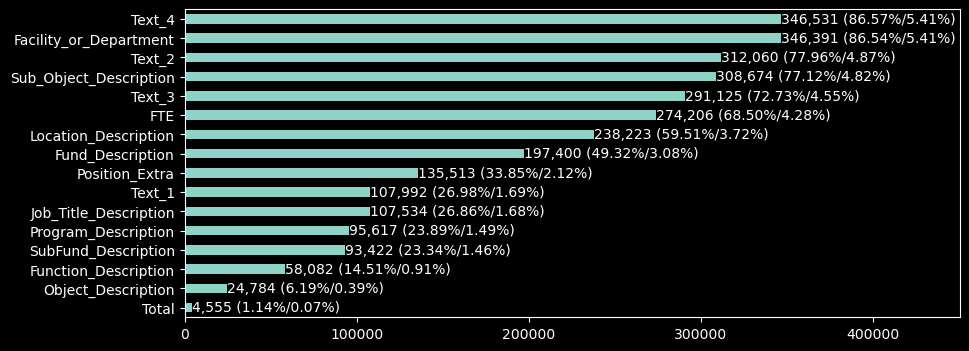

In [13]:
plot_missing(df[FEATURES])

Heatmap of missing features

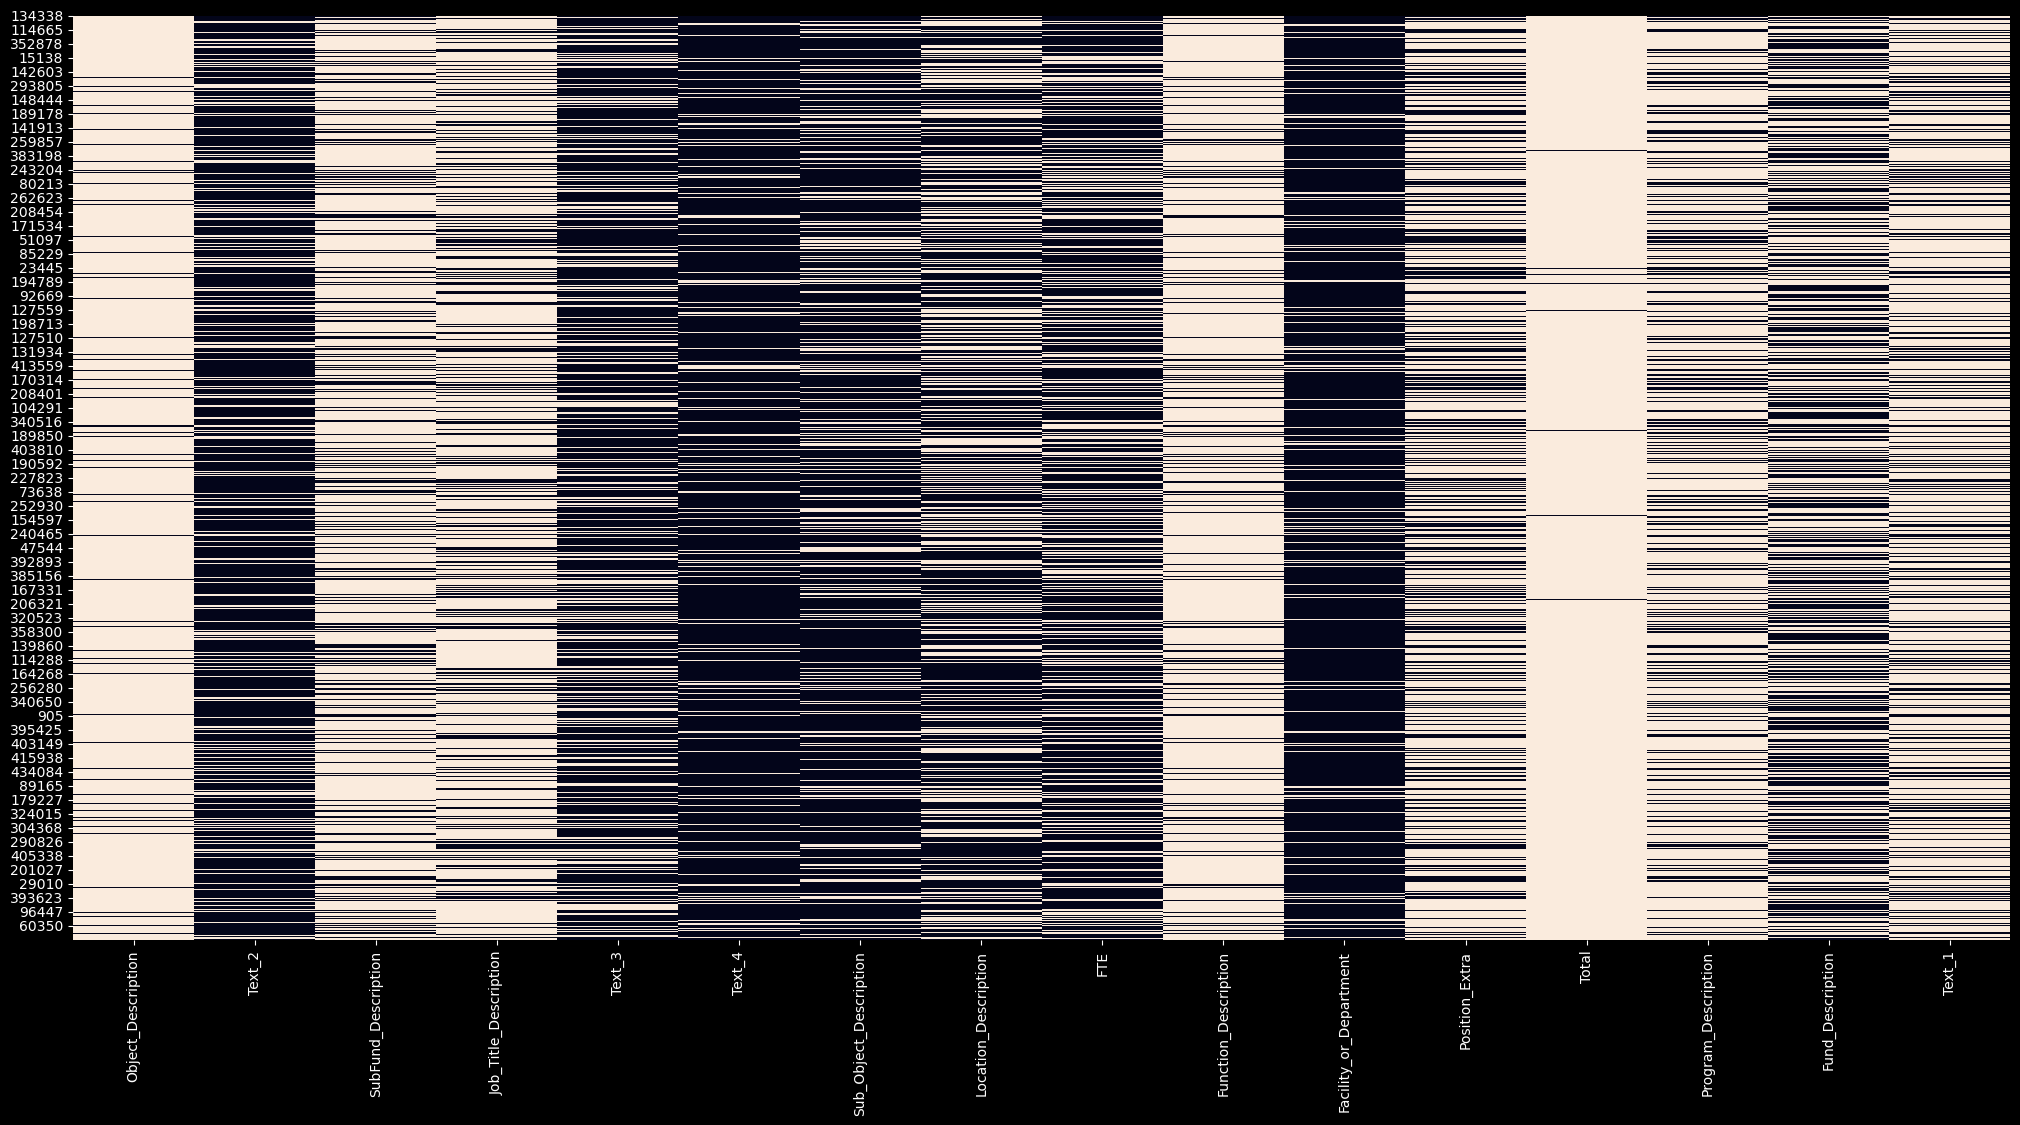

In [14]:
plt.figure(figsize=(25,12))
sns.heatmap(~missing[FEATURES], cbar=False)
plt.show()

### TODO: Missing proportion grouped by a categorical

In [15]:
def missing_report2(df, by, values, ascending=False):
    area = (df.shape[0]*(df.shape[1]))
    # missing = df.isnull()
    # print(missing)
    if not isinstance(values, list):
        values = [values]
    if not isinstance(by, list):
        by = [by]
    for v in values:
        for b in by:
            print(b, v, df[[b,v]].groupby(b)[v].isnull().sum().sort_values(ascending=ascending))
    
#     .agg(['sum', 'mean', lambda x: x.sum() / area]).transpose()
#     missing = missing.sort_values('sum', ascending=ascending)
#     missing.columns = ['missing', 'column proportion', 'overall proportion']
#     missing['missing'] = missing.missing.astype('int')
#     return missing

# missing_report2(df, by='Object_Description', values='FTE')

### **Missing `FTE`**

Let's subtotal missing `FTE` by `Object Description`.

One can see high ocurrences of missing `FTE` for `Object_Descritption` such as `"EMPLOYEE BENEFITS"`, similar ones, `"SUPPLIES"` and so on.

In [16]:
# .fillna({'Object_Description':'NaN'})
df.loc[df.FTE.isnull()].groupby('Object_Description', dropna=False).size().sort_values(ascending=False)

Object_Description
EMPLOYEE BENEFITS                 47495
CONTRA BENEFITS                   19381
ADDITIONAL/EXTRA DUTY PAY/STIP    16841
SUPPLIES                          13117
RETIREMENT CONTRIB.               13073
                                  ...  
PMT REFUNDED BOND ESCROW AGENT        1
FOOD ACQUISITIONS - USDA              1
Custodial  Supplies                   1
FILMS PURCHASED                       1
Land Purchase And Improvement         1
Length: 555, dtype: int64

### **Missing `Total`**

Let's subtotal missing `Total` by `Object Description`.

One can see less high occurrences of missing `Total` for `Object_description` such as `"EMPLOYEE BENEFITS"` and so on.

In [17]:
# .fillna({'Object_Description':'NaN'})
df.loc[df.Total.isnull()].groupby('Object_Description', dropna=False).size().sort_values(ascending=False)

Object_Description
EMPLOYEE BENEFITS                                     1184
SALARIES OF REGULAR EMPLOYEES                          876
EMPLOYER PD MED CONTRIBUTION                           295
Salaries And Wages For Teachers And Other Professi     288
NaN                                                    261
                                                      ... 
PURCHASED PROFESSIONAL AND TECH SVCS-CPA                 1
PURCHASED PROF AND TECH SVC-TEMPORARY SVCS               1
Instructional Materials                                  1
PURCHASE OR LEASE - PURCHASE OF COMPUTERS                1
Other                                                    1
Length: 217, dtype: int64

### Magnitude vs. Missing

**`Total` vs. `FTE`**

Highest `Total` values associated to missing `FTE` which can be outliers or wrong data.

In [18]:
numeric_statistics(df[['Total']])

count          mean            std          min      25%     50%  \
Total  395722  13105.856828  368225.392358 -87466307.15  73.7977  461.23   

             75%           max  missing  miss_ratio           sum  \
Total  3652.6625  1.297000e+08     4555     0.01138  5.186276e+09   

              range  skewness     kurtosis        iqr  lo_outlier  hi_outlier  
Total  2.171663e+08  100.3198  51040.80173  3578.8648  -5294.4995   9020.9597

In [19]:
df.loc[df.FTE.isnull(), ['Total', 'FTE', 'Object_Description']].sort_values('Total', ascending=False).head().style.format({'Total':'{:,.2f}'})

**Max Total**

In [20]:
df.iloc[df.Total.argmax()][NUMERIC_FEATURES + TEXT_FEATURES + LABELS]

FTE                                                      NaN
Total                                           129699999.22
Object_Description           Payments to a Community School*
Text_2                                                   NaN
SubFund_Description                      Regular Instruction
Job_Title_Description                                    NaN
Text_3                                                   NaN
Text_4                                                   NaN
Sub_Object_Description    Tuition And Other Similar Payments
Location_Description                                     NaN
Function_Description                           Other Regular
Facility_or_Department                                   NaN
Position_Extra                                           NaN
Program_Description                                      NaN
Fund_Description                                     General
Text_1                             SPECIAL PROJECTS-FINANCIA
Function                

**`FTE` vs. `Total`**

For missing `Total` we can see `FTE` values , likely inliers.

In [21]:
numeric_statistics(df[['FTE']])

count      mean       std       min       25%       50%  75%   max  \
FTE  126071  0.426794  0.573576 -0.087551  0.000792  0.130927  1.0  46.8   

     missing  miss_ratio           sum      range   skewness     kurtosis  \
FTE   274206    0.685041  53806.344446  46.887551  19.273698  1172.951126   

          iqr  lo_outlier  hi_outlier  
FTE  0.999208    -1.49802    2.498812

In [22]:
df.loc[df.Total.isnull(), ['FTE', 'Total', 'Object_Description']].sort_values('FTE', ascending=False).head().style.format({'Total':'{:,.2f}'})

**Max FTE**

In [23]:
df.iloc[df.FTE.argmax()][NUMERIC_FEATURES + TEXT_FEATURES + LABELS]

FTE                                                                46.8
Total                                                     528191.986943
Object_Description        Personal Services - Food Services - Cafeteria
Text_2                                                              NaN
SubFund_Description                                                 NaN
Job_Title_Description                                               NaN
Text_3                                                              NaN
Text_4                                                              NaN
Sub_Object_Description                                              NaN
Location_Description                                                NaN
Function_Description                                                NaN
Facility_or_Department                                              NaN
Position_Extra                                                      NaN
Program_Description                                       Food S

## Continuous variables: FTE and Total

**`FTE`: full-time equivalent** - If the budget item is associated to an employee, this number tells us the **percent** of full-time that the employee works.
* A value of 1 suggests an associated employee works full-time.
* A value greater than 1 suggests overtime or multiple headcount
* A value smaller than 1 suggests a part-time or contracted employee.

**`Total`: total cost of the expenditure** - This number tells us how much the budget item cost.

The reason of negative values is currently unknown.

### Disambiguation of Total when having FTE

In [24]:
from mcr.ml.preprocessing import disambiguate

In [25]:
numeric_statistics(df[NUMERIC_FEATURES])

count          mean            std           min        25%  \
FTE    126071      0.426794       0.573576 -8.755064e-02   0.000792   
Total  395722  13105.856828  368225.392358 -8.746631e+07  73.797700   

              50%        75%           max  missing  miss_ratio           sum  \
FTE      0.130927     1.0000  4.680000e+01   274206    0.685041  5.380634e+04   
Total  461.230000  3652.6625  1.297000e+08     4555    0.011380  5.186276e+09   

              range    skewness      kurtosis          iqr  lo_outlier  \
FTE    4.688755e+01   19.273698   1172.951126     0.999208    -1.49802   
Total  2.171663e+08  100.319800  51040.801730  3578.864800 -5294.49950   

        hi_outlier  
FTE       2.498812  
Total  9020.959700

In [26]:
df[['FTE', 'Total', 'Total_FTE']] = disambiguate(df[NUMERIC_FEATURES], 'FTE', 'Total')
NUMERIC_FEATURES = ['FTE', 'Total', 'Total_FTE']
FEATURES = TEXT_FEATURES + NUMERIC_FEATURES
df[NUMERIC_FEATURES]

FTE     Total     Total_FTE
134338  1.00000       NaN  50471.810000
206341      NaN  3477.860           NaN
326408  1.00000       NaN  62237.130000
364634      NaN    22.300           NaN
47683       NaN    54.166           NaN
...         ...       ...           ...
109283      NaN    48.620           NaN
102430  0.00431       NaN    128.824985
413949  1.00000       NaN   4902.290000
433672      NaN  4020.290           NaN
415831      NaN    46.530           NaN

[400277 rows x 3 columns]

In [27]:
df[NUMERIC_FEATURES].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400277 entries, 134338 to 415831
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   FTE        126071 non-null  float64
 1   Total      302248 non-null  float64
 2   Total_FTE  93474 non-null   float64
dtypes: float64(3)
memory usage: 20.3 MB


In [28]:
numeric_statistics(df)

count          mean            std           min          25%  \
FTE        126071      0.426794       0.573576 -8.755064e-02     0.000792   
Total      302248   7349.924937  420744.330221 -8.746631e+07    36.334320   
Total_FTE   93474  31717.651574   33972.349357 -4.876100e+03  1034.974195   

                    50%           75%           max  missing  miss_ratio  \
FTE            0.130927      1.000000  4.680000e+01   274206    0.685041   
Total        259.120000   1166.960000  1.297000e+08    98029    0.244903   
Total_FTE  22124.984157  53287.390805  8.458357e+05   306803    0.766477   

                    sum         range   skewness      kurtosis           iqr  \
FTE        5.380634e+04  4.688755e+01  19.273698   1172.951126      0.999208   
Total      2.221500e+09  2.171663e+08  88.084712  39207.950430   1130.625680   
Total_FTE  2.964776e+09  8.507118e+05   1.540053     10.574129  52252.416610   

            lo_outlier     hi_outlier  
FTE           -1.49802       2.498812  
Total      -1659.60420    2862.898520  
Total_FTE -77343.65072  131666.015720

Function to plot a panel with a scatter, density and box plots:

### `FTE` univariate analysis

In [29]:
df.FTE.describe()

count    126071.000000
mean          0.426794
std           0.573576
min          -0.087551
25%           0.000792
50%           0.130927
75%           1.000000
max          46.800000
Name: FTE, dtype: float64

`FTE` contains bi-modal skewed data with upper outliers

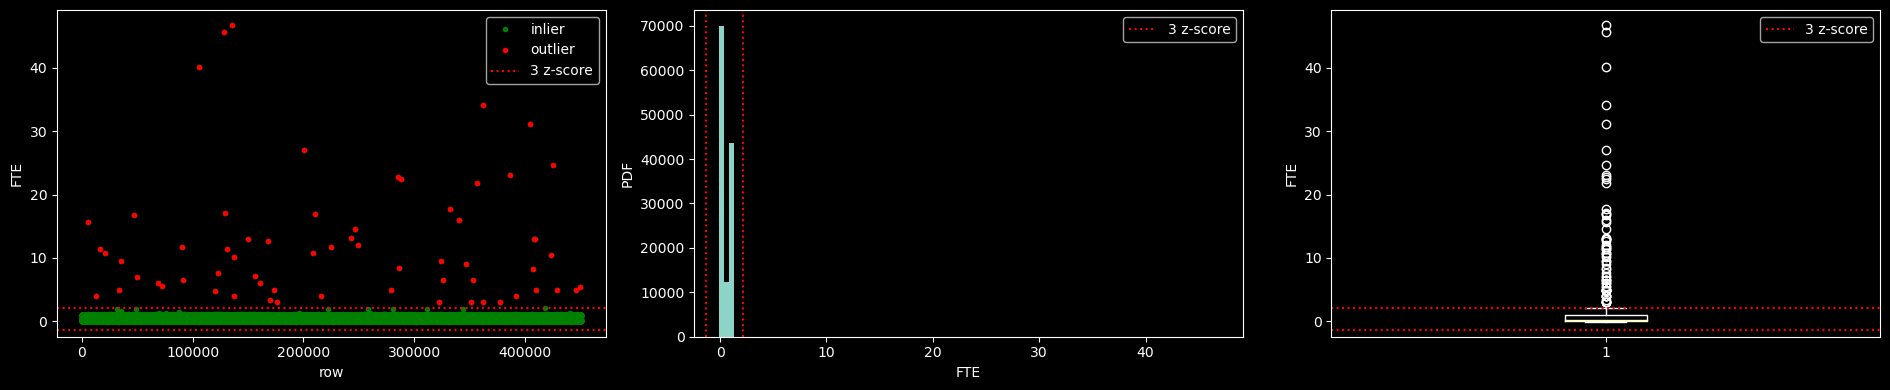

Upper outliers: 64
Lower outliers: 0


In [30]:
density_plots(df.FTE, bins=100)
zscores = zscore(df.FTE, nan_policy='omit')
print('Upper outliers:', sum(zscores > 3))
print('Lower outliers:', sum(zscores < -3))

`FTE` outliers hold values up to`46.8` and are assumed to be multiple headcount.

In [31]:
relevant = ['FTE', 'Total_FTE', 'Total', 'Fund_Description', 'Object_Description', 'Job_Title_Description']
df.loc[(zscores < -3) | (zscores > 3), relevant].sort_values('FTE', ascending=False)

FTE      Total_FTE  Total   Fund_Description  \
135371  46.8  528191.986943    NaN  Central Cafeteria   
128399  45.6  478476.893739    NaN  Central Cafeteria   
105857  40.2  580900.061569    NaN  Central Cafeteria   
362251  34.2  484744.886261    NaN  Central Cafeteria   
404264  31.1  352252.935596    NaN  Central Cafeteria   
...      ...            ...    ...                ...   
362443   3.0  280332.905298    NaN            General   
377132   3.0  149857.502317    NaN            General   
351528   3.0  162472.656884    NaN            General   
176122   3.0  130486.445186    NaN            General   
322285   3.0  135557.941531    NaN            General   

                                   Object_Description Job_Title_Description  
135371  Personal Services - Food Services - Cafeteria                   NaN  
128399  Personal Services - Food Services - Cafeteria                   NaN  
105857  Personal Services - Food Services - Cafeteria                   NaN  
362251  Personal Services - Food Services - Cafeteria                   NaN  
404264  Personal Services - Food Services - Cafeteria                   NaN  
...                                               ...                   ...  
362443                                      Regular *   TCHR, OCC THERAPIST  
377132                                      Regular *    EDUCATIONAL AIDE I  
351528                                      Regular *         MOBILE DEPUTY  
176122                                      Regular *             PARA (MF)  
322285                                      Regular *             PARA (OH)  

[64 rows x 6 columns]

What if to remove outliers?

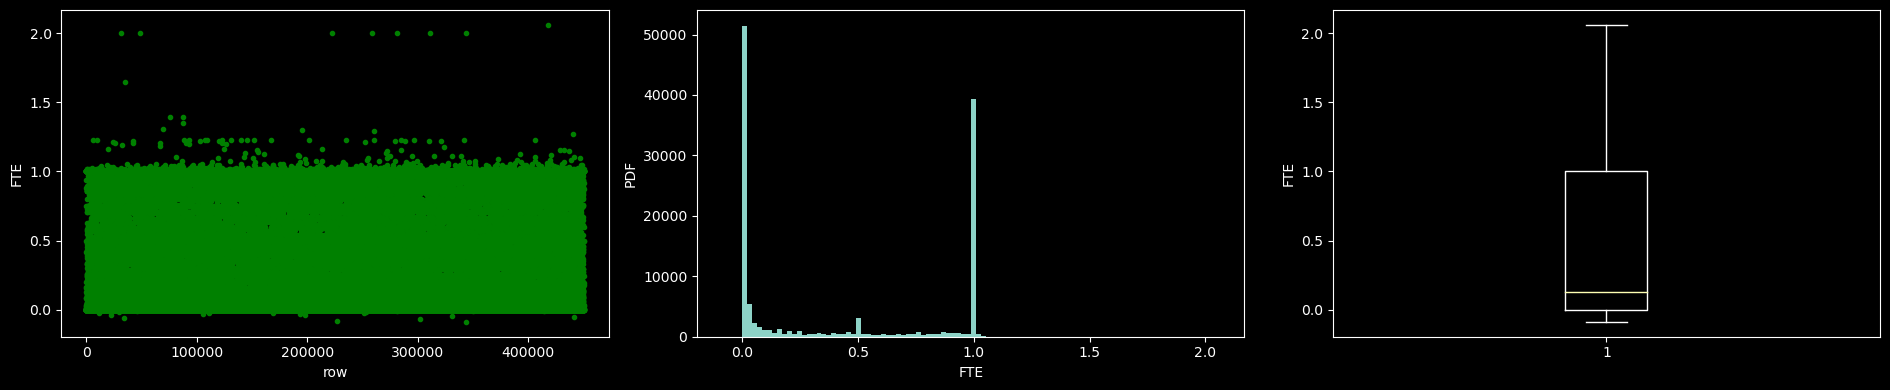

In [32]:
density_plots(df.FTE[(zscores >= -3) & (zscores <= 3)], outlying=False, bins=100)

Binning with and without outliers

In [33]:
pd.cut(df.FTE, bins=4).dtype

CategoricalDtype(categories=[(-0.134, 11.634], (11.634, 23.356], (23.356, 35.078], (35.078, 46.8]], ordered=True)

In [34]:
pd.cut(df.FTE[(zscores >= -3) & (zscores <= 3)], bins=4).dtype

CategoricalDtype(categories=[(-0.0897, 0.449], (0.449, 0.986], (0.986, 1.523], (1.523, 2.06]], ordered=True)

### `Total_FTE` univariate analysis

In [35]:
df.Total_FTE.describe()

count     93474.000000
mean      31717.651574
std       33972.349357
min       -4876.099653
25%        1034.974195
50%       22124.984157
75%       53287.390805
max      845835.712053
Name: Total_FTE, dtype: float64

`Total_FTE` contains upper and lower outliers with magnitude of 800,000.

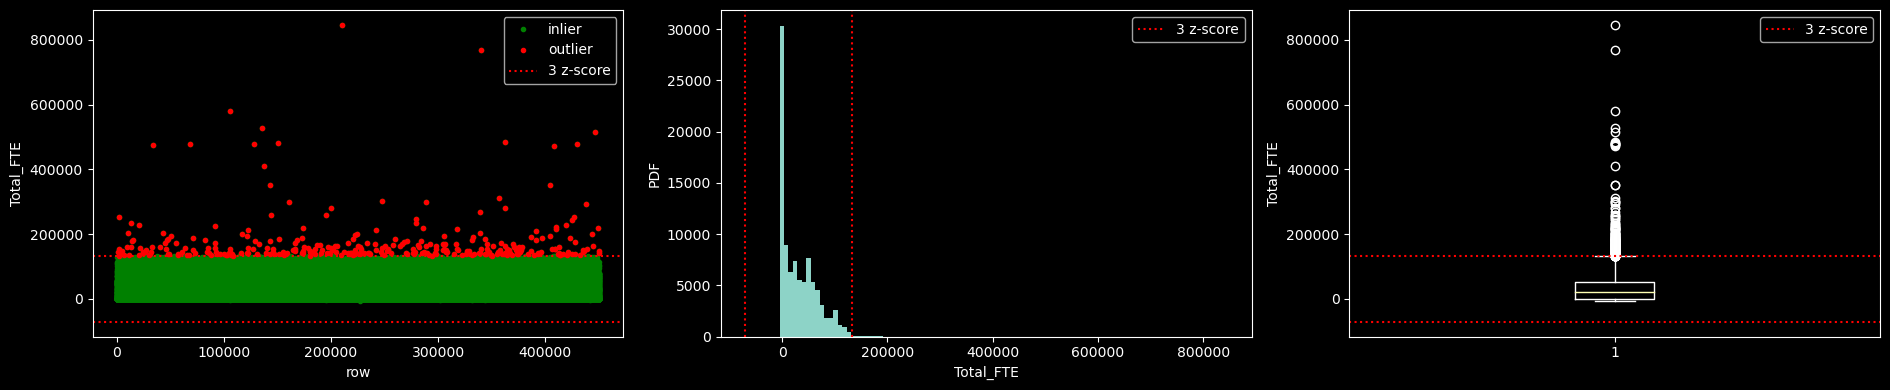

Upper outliers: 312
Lower outliers: 0


In [36]:
density_plots(df.Total_FTE, bins=100)
zscores = zscore(df.Total_FTE, nan_policy='omit')
print('Upper outliers:', sum(zscores > 3))
print('Lower outliers:', sum(zscores < -3))

In [37]:
df.loc[(zscores < -3) | (zscores > 3), relevant].sort_values('Total_FTE', ascending=False)

FTE      Total_FTE  Total           Fund_Description  \
210055  17.0  845835.712053    NaN                    General   
340130  16.0  768873.246873    NaN                    General   
105857  40.2  580900.061569    NaN          Central Cafeteria   
135371  46.8  528191.986943    NaN          Central Cafeteria   
446104   5.0  514157.663481    NaN  Improving Teacher Quality   
...      ...            ...    ...                        ...   
294188   1.0  134038.522865    NaN                    General   
180640   1.0  134038.172865    NaN                    General   
108020   1.0  134037.952865    NaN                    General   
2516     1.0  133867.190000    NaN               General Fund   
350493   1.0  133855.930000    NaN               General Fund   

                                   Object_Description  \
210055                                      Regular *   
340130                                      Regular *   
105857  Personal Services - Food Services - Cafeteria   
135371  Personal Services - Food Services - Cafeteria   
446104                                      Regular *   
...                                               ...   
294188                                      Regular *   
180640                                      Regular *   
108020                                      Regular *   
2516                                              NaN   
350493                                            NaN   

                              Job_Title_Description  
210055  EDUCATIONAL AIDE I - Preschool Supplemental  
340130                                  LEAD DRIVER  
105857                                          NaN  
135371                                          NaN  
446104              CLASSROOM TEACHERS - TITLE II A  
...                                             ...  
294188                        SENIOR HIGH PRINCIPAL  
180640                        SENIOR HIGH PRINCIPAL  
108020                        SENIOR HIGH PRINCIPAL  
2516                           Principal-Elementary  
350493                         Principal-Elementary  

[312 rows x 6 columns]

What if to remove outliers?

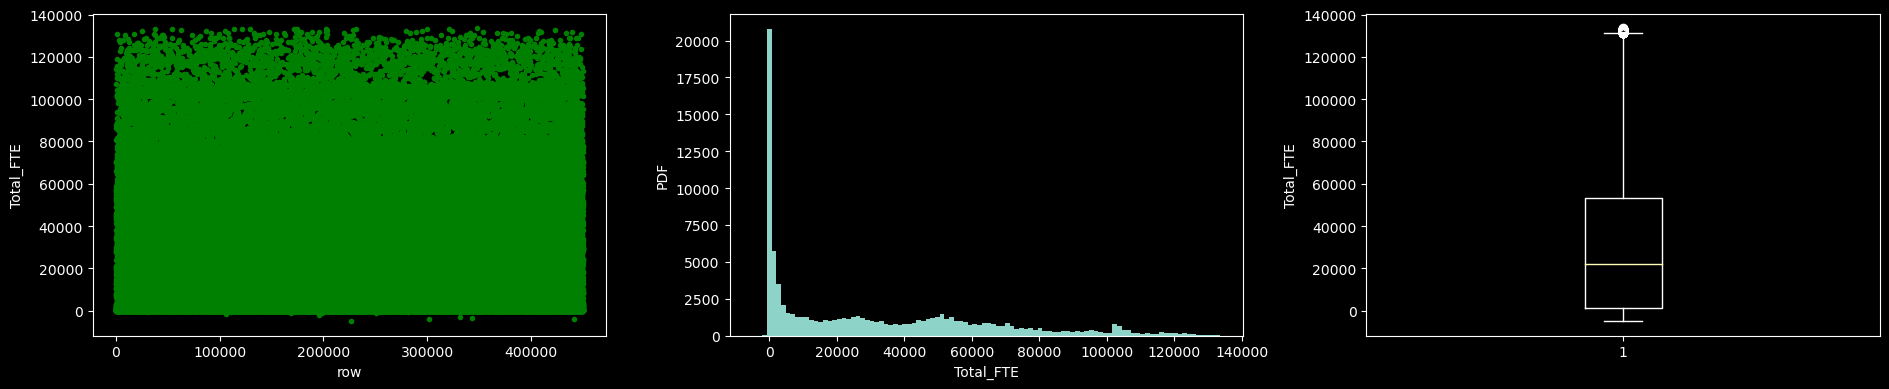

In [38]:
density_plots(df.Total_FTE[(zscores >= -3) & (zscores <= 3)], outlying=False, bins=100)

Binning with and without outliers

In [39]:
pd.cut(df.Total_FTE, bins=3).dtype

CategoricalDtype(categories=[(-5726.811, 278694.504], (278694.504, 562265.108], (562265.108, 845835.712]], ordered=True)

In [40]:
pd.cut(df.Total_FTE[(zscores >= -3) & (zscores <= 3)], bins=3).dtype

CategoricalDtype(categories=[(-5014.438, 41236.597], (41236.597, 87349.293], (87349.293, 133461.99]], ordered=True)

Under the hyphotesis that negative values are sign mistakes, what if to fix them by flipping their signs? **It would move most of the lower outliers to be upper outliers.**

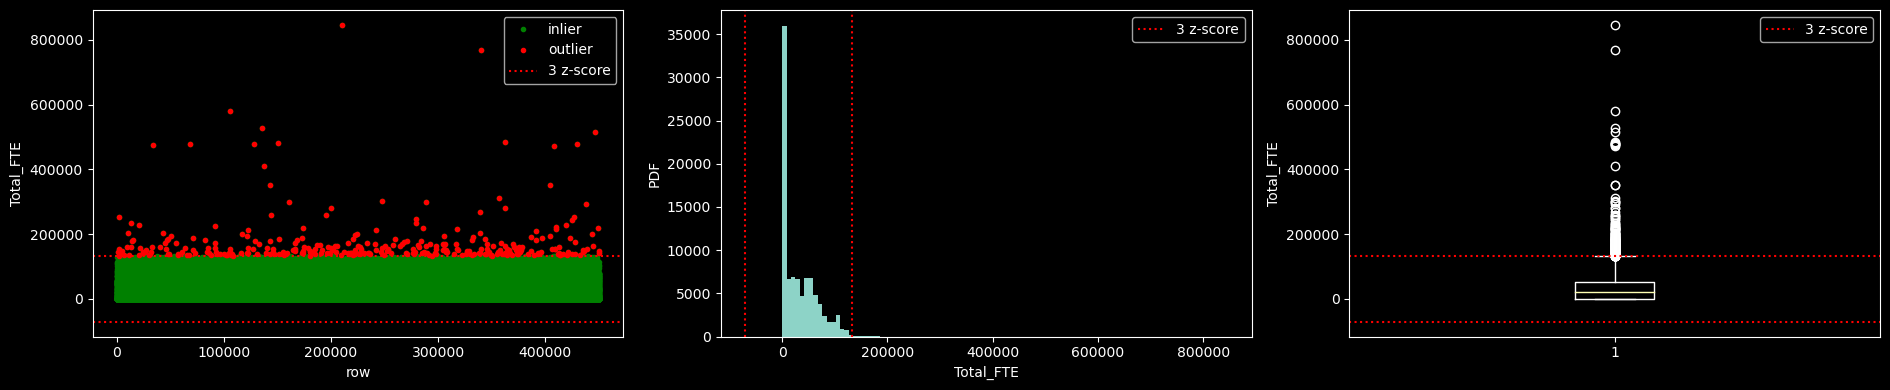

Upper outliers: 312
Lower outliers: 0


In [41]:
density_plots(df.Total_FTE.abs(), bins=100)
zscores_fixed = zscore(df.Total_FTE.abs(), nan_policy='omit')
print('Upper outliers:', sum(zscores_fixed > 3))
print('Lower outliers:', sum(zscores_fixed < -3))

### `Total` univariate analysis

In [42]:
df.Total.describe()

count    3.022480e+05
mean     7.349925e+03
std      4.207443e+05
min     -8.746631e+07
25%      3.633432e+01
50%      2.591200e+02
75%      1.166960e+03
max      1.297000e+08
Name: Total, dtype: float64

`Total` contains upper and lower outliers with magnitude or +/- 100 millions.

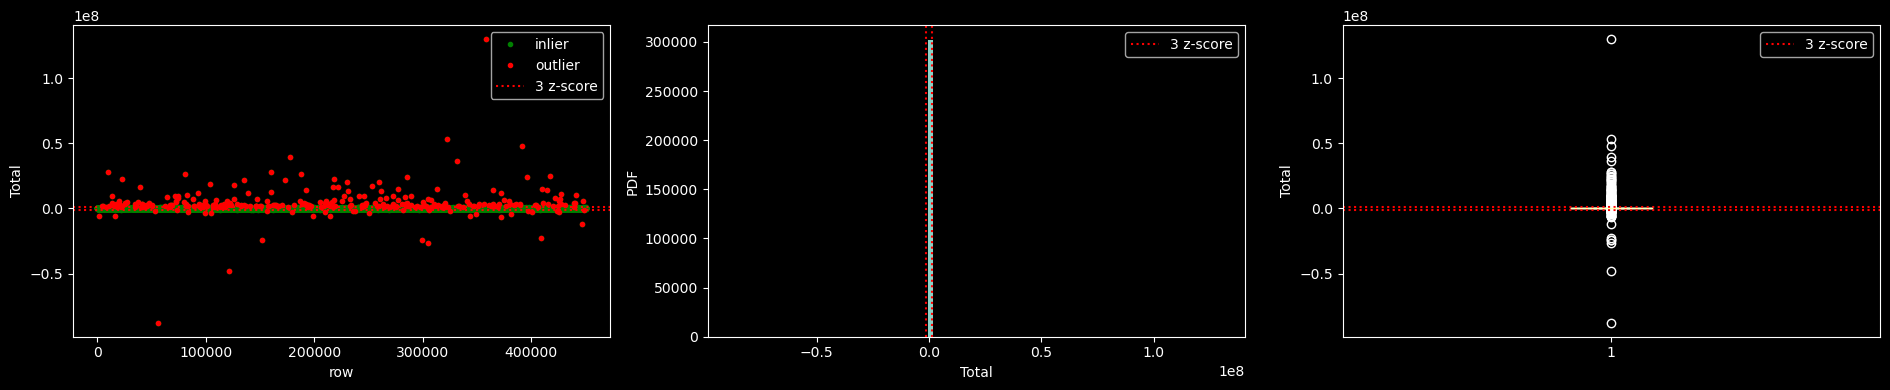

Upper outliers: 280
Lower outliers: 34


In [43]:
density_plots(df.Total, bins=100)
zscores = zscore(df.Total, nan_policy='omit')
print('Upper outliers:', sum(zscores > 3))
print('Lower outliers:', sum(zscores < -3))

In [44]:
df.loc[(zscores < -3) | (zscores > 3), relevant].sort_values('Total', ascending=False)

FTE  Total_FTE         Total                  Fund_Description  \
358538  NaN        NaN  1.297000e+08                           General   
322149  NaN        NaN  5.323797e+07  Employee Benefits Self-Insurance   
390959  NaN        NaN  4.789057e+07                               NaN   
177775  NaN        NaN  3.956446e+07                               NaN   
331752  NaN        NaN  3.645094e+07                               NaN   
...     ...        ...           ...                               ...   
152005  NaN        NaN -2.399966e+07                      General Fund   
299589  NaN        NaN -2.400000e+07             Capital Projects Fund   
304649  NaN        NaN -2.646500e+07                               NaN   
121092  NaN        NaN -4.789057e+07                               NaN   
56063   NaN        NaN -8.746631e+07                               NaN   

                        Object_Description Job_Title_Description  
358538     Payments to a Community School*                   NaN  
322149            Other Purchased Services                   NaN  
390959           PAYMENTS TO ESCROW AGENTS               (blank)  
177775                  INTEREST ON LEASES               (blank)  
331752                           BUILDINGS               (blank)  
...                                    ...                   ...  
152005  OPERATING TRANSFERS TO OTHER FUNDS                   NaN  
299589  OPERATING TRANSFERS TO OTHER FUNDS                   NaN  
304649             REDEMPTION OF PRINCIPAL               (blank)  
121092           PAYMENTS TO ESCROW AGENTS               (blank)  
56063                            BUILDINGS               (blank)  

[314 rows x 6 columns]

What if to remove outliers?

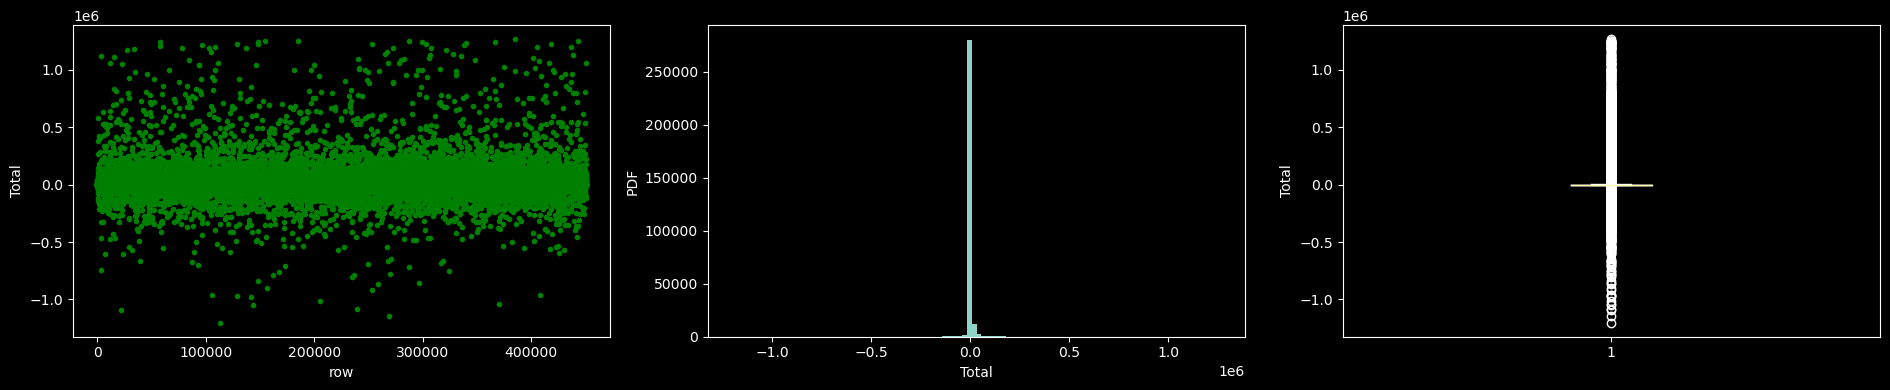

In [45]:
density_plots(df.Total[(zscores >= -3) & (zscores <= 3)], outlying=False, bins=100)

Binning with and without outliers

In [46]:
pd.cut(df.Total, bins=3).dtype

CategoricalDtype(categories=[(-87683473.456, -15077538.36], (-15077538.36, 57311230.43], (57311230.43, 129699999.22]], ordered=True)

In [47]:
pd.cut(df.Total[(zscores >= -3) & (zscores <= 3)], bins=3).dtype

CategoricalDtype(categories=[(-1204431.11, -379189.51], (-379189.51, 443583.77], (443583.77, 1266357.05]], ordered=True)

Under the hyphotesis that negative values are sign mistakes, what if to fix them by flipping their signs? **It would move most of the lower outliers to be upper outliers.**

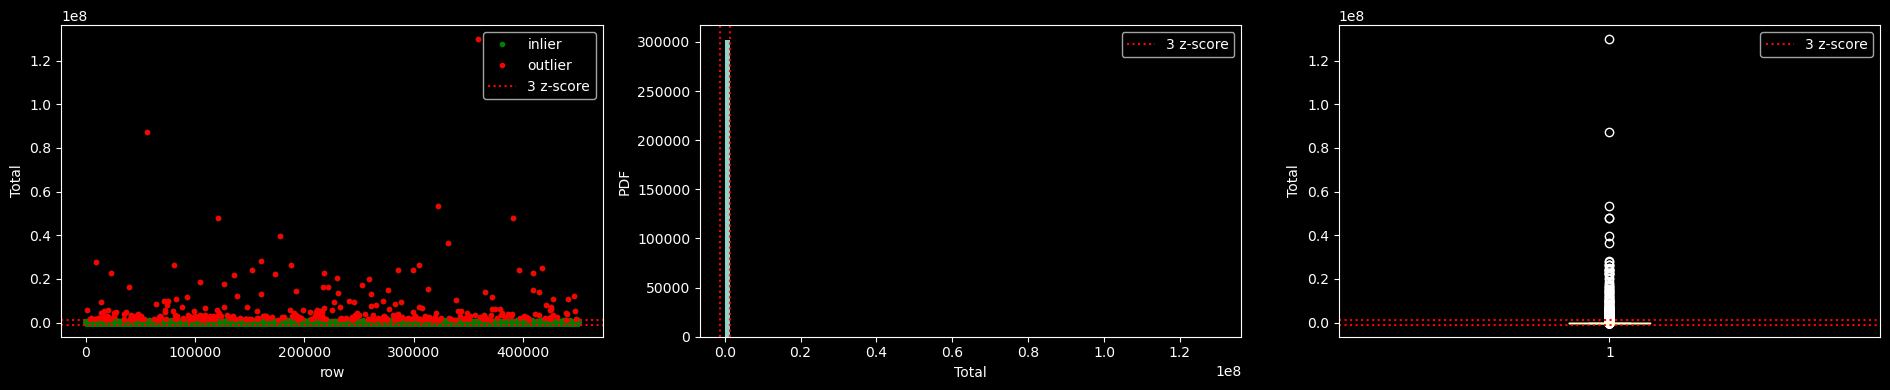

Upper outliers: 314
Lower outliers: 0


In [48]:
density_plots(df.Total.abs(), bins=100)
zscores_fixed = zscore(df.Total.abs(), nan_policy='omit')
print('Upper outliers:', sum(zscores_fixed > 3))
print('Lower outliers:', sum(zscores_fixed < -3))

### Regression and correlation by imputation strategy

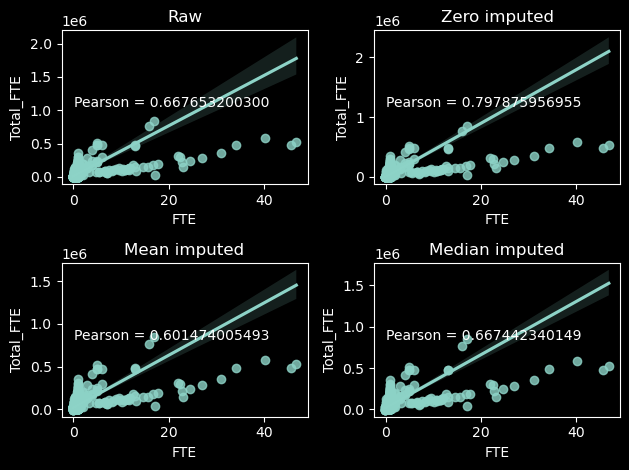

In [49]:
plot_regression_correlation_imputation(df, 'FTE', 'Total_FTE')

### Correlations grouped by labels by imputation strategy

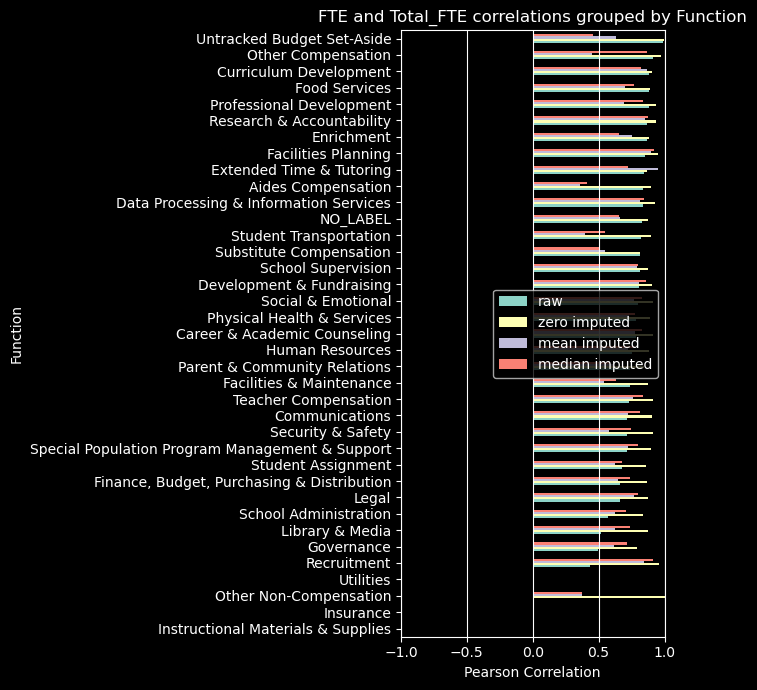

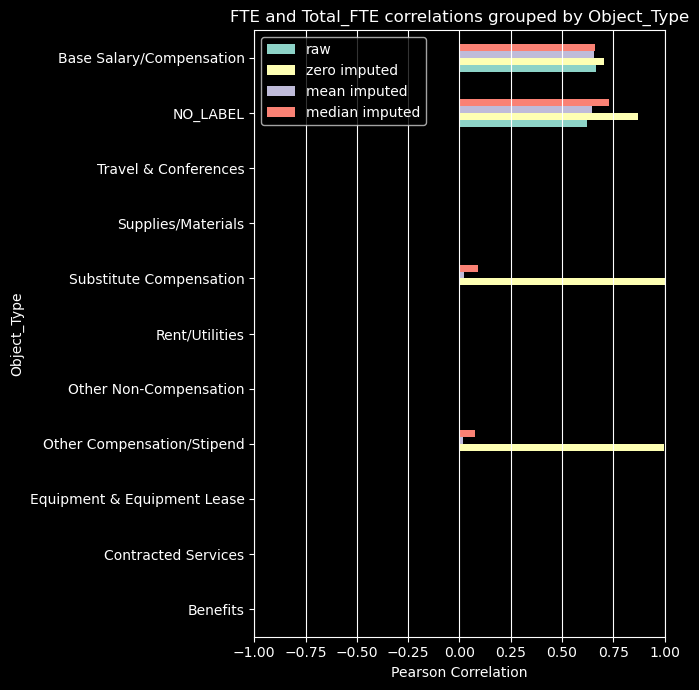

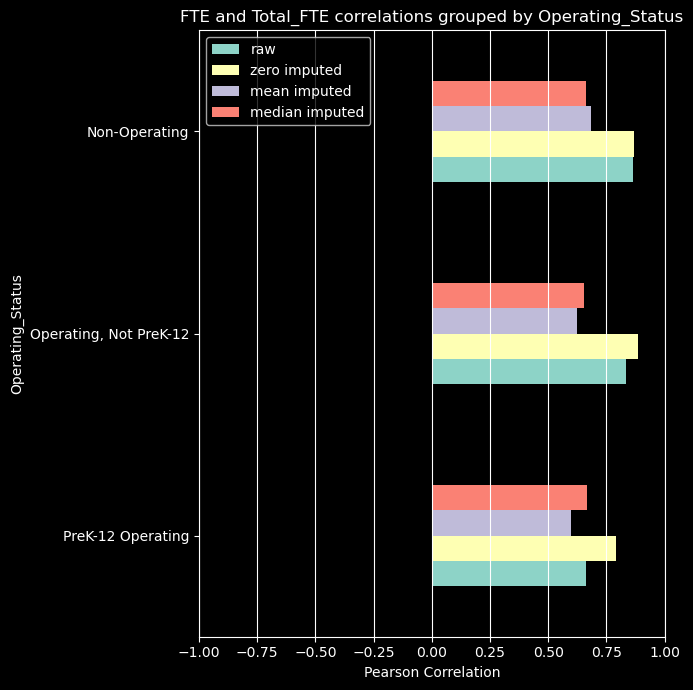

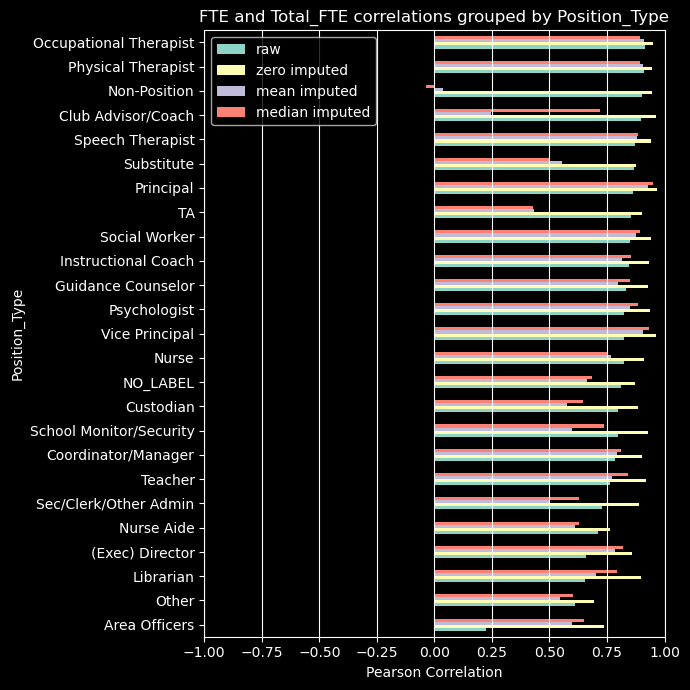

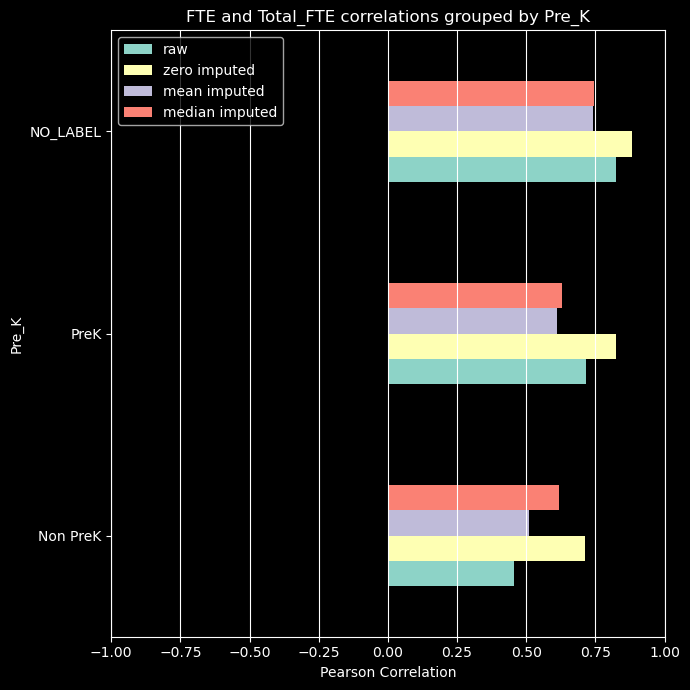

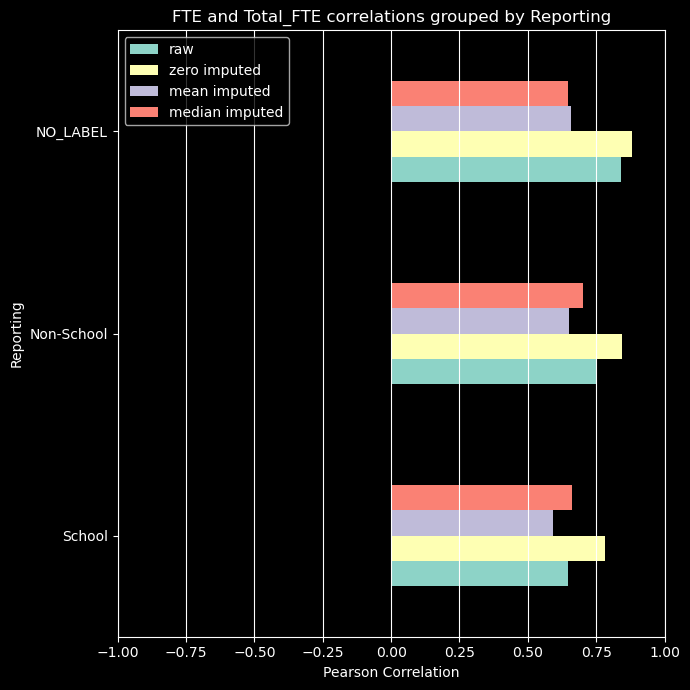

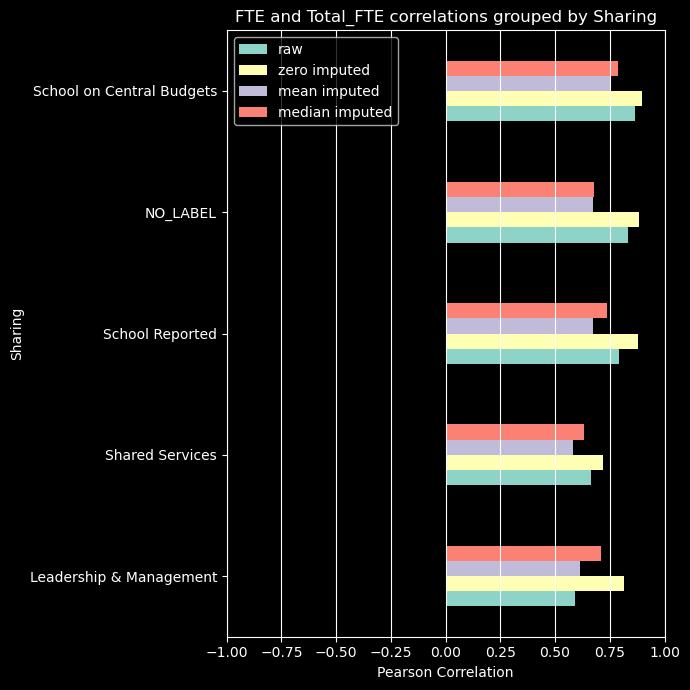

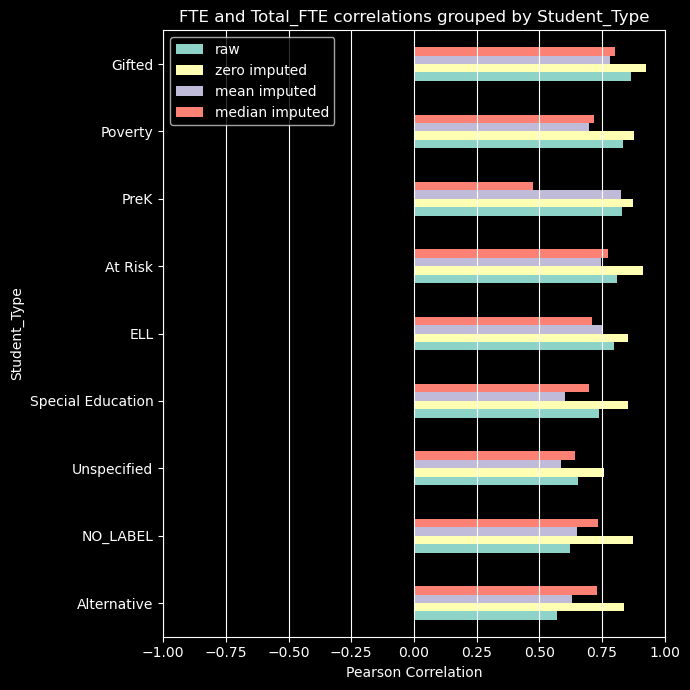

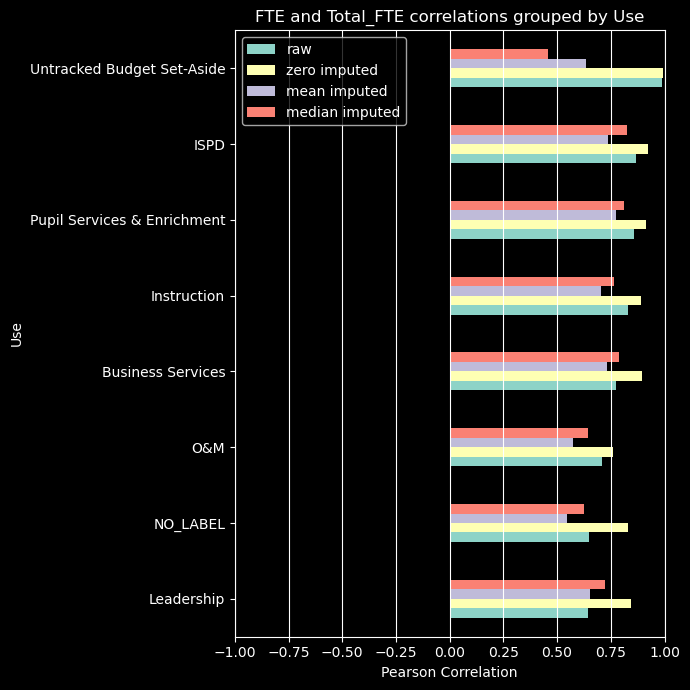

In [50]:
for label in LABELS:
    plot_grouped_correlation_imputation(df=df, x='FTE', y='Total_FTE', by=label)

### Statistics grouped by labels

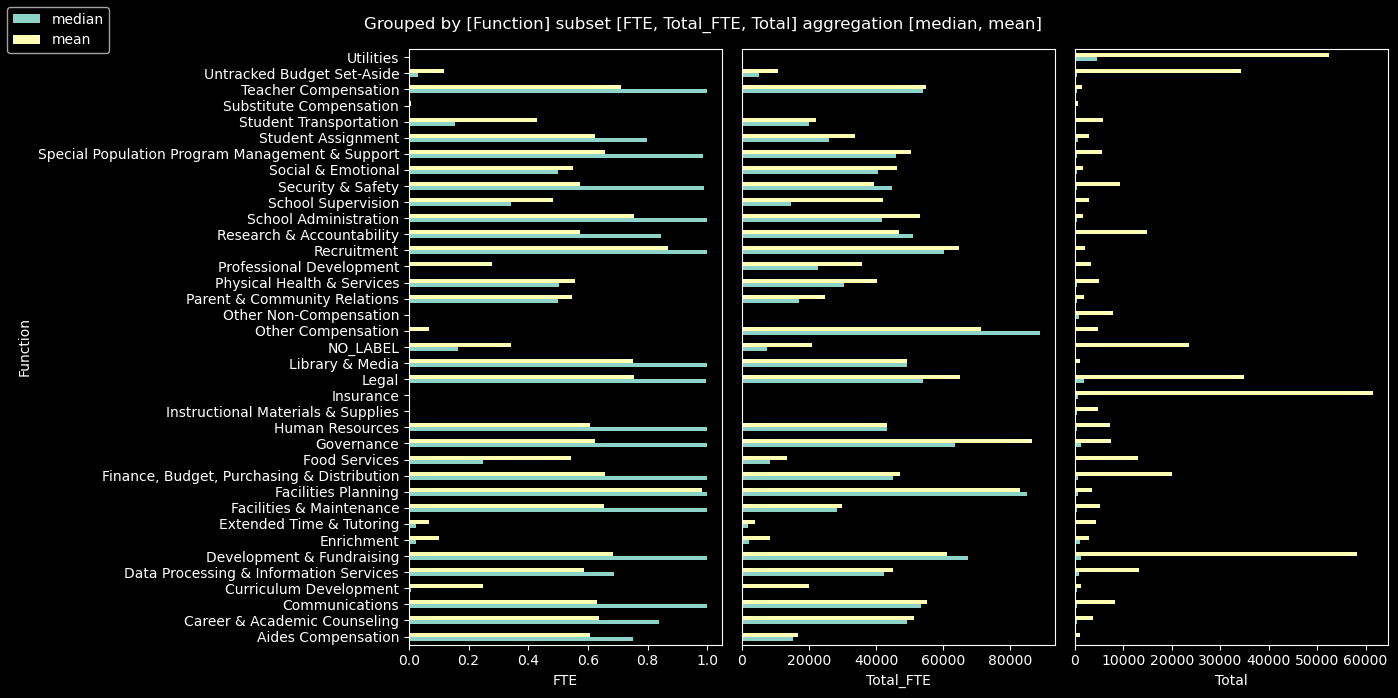

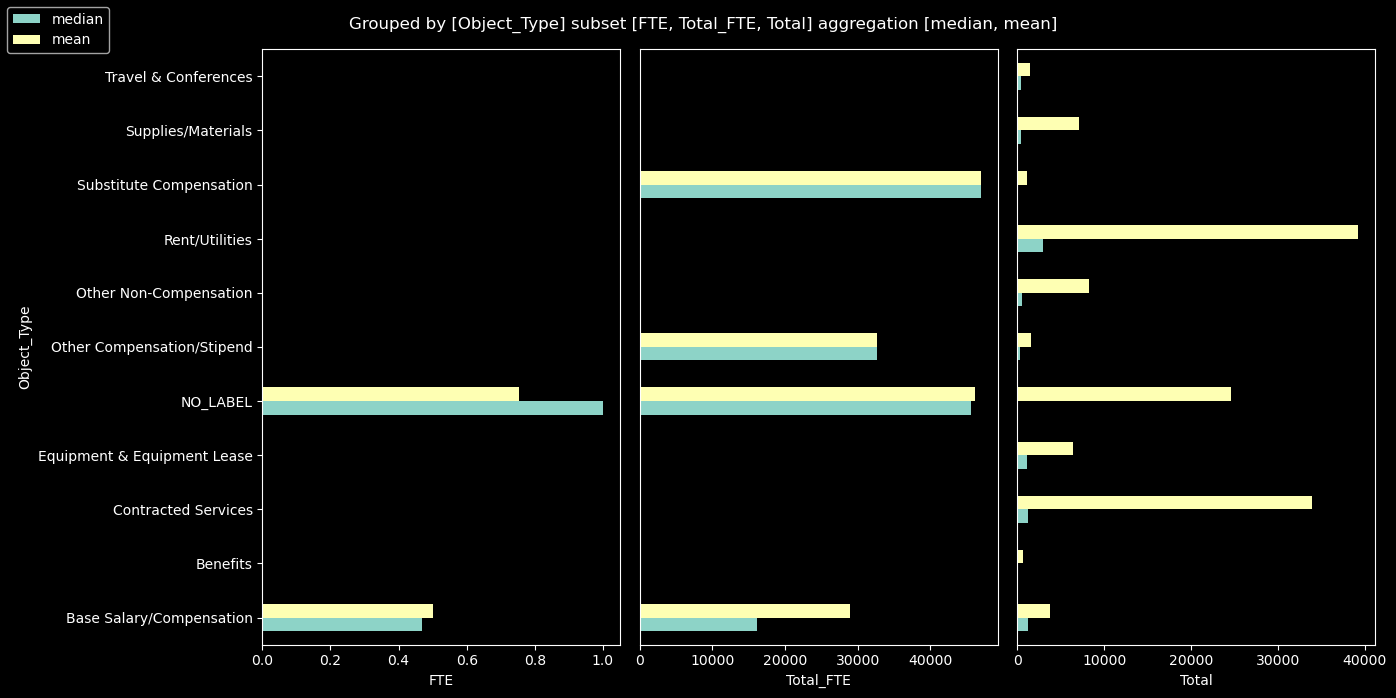

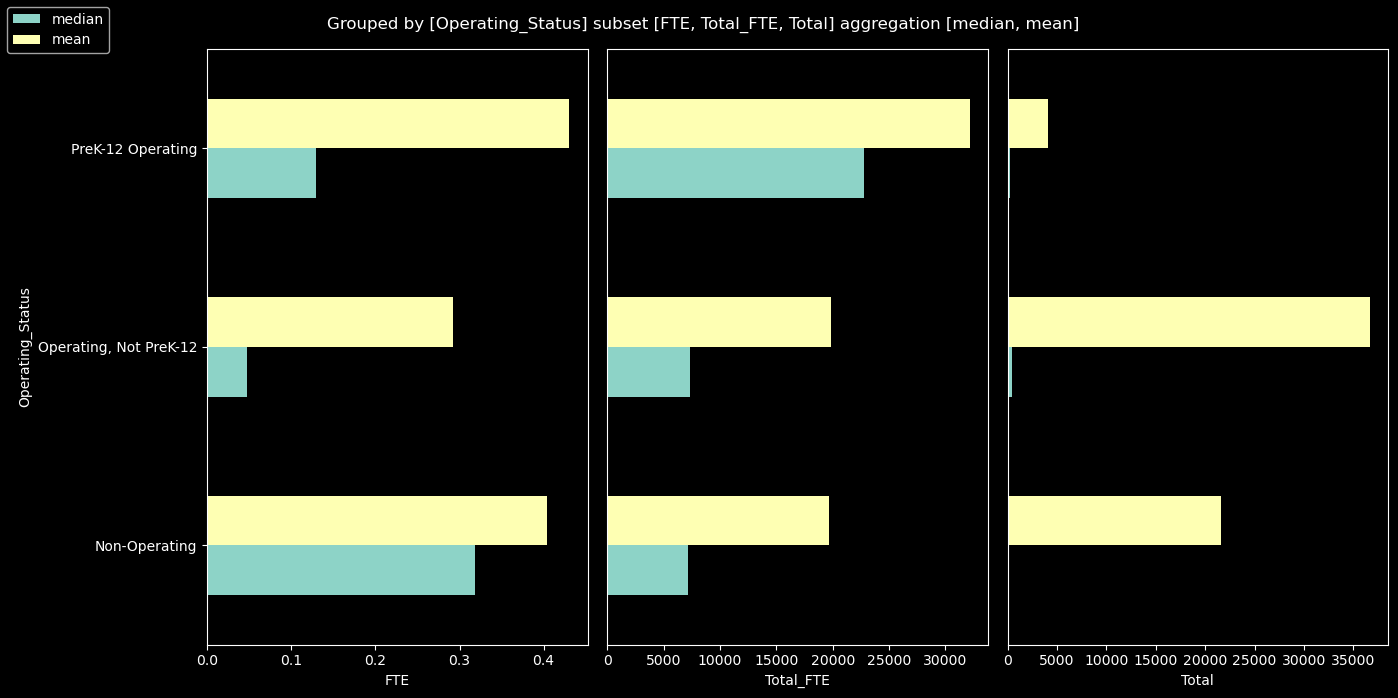

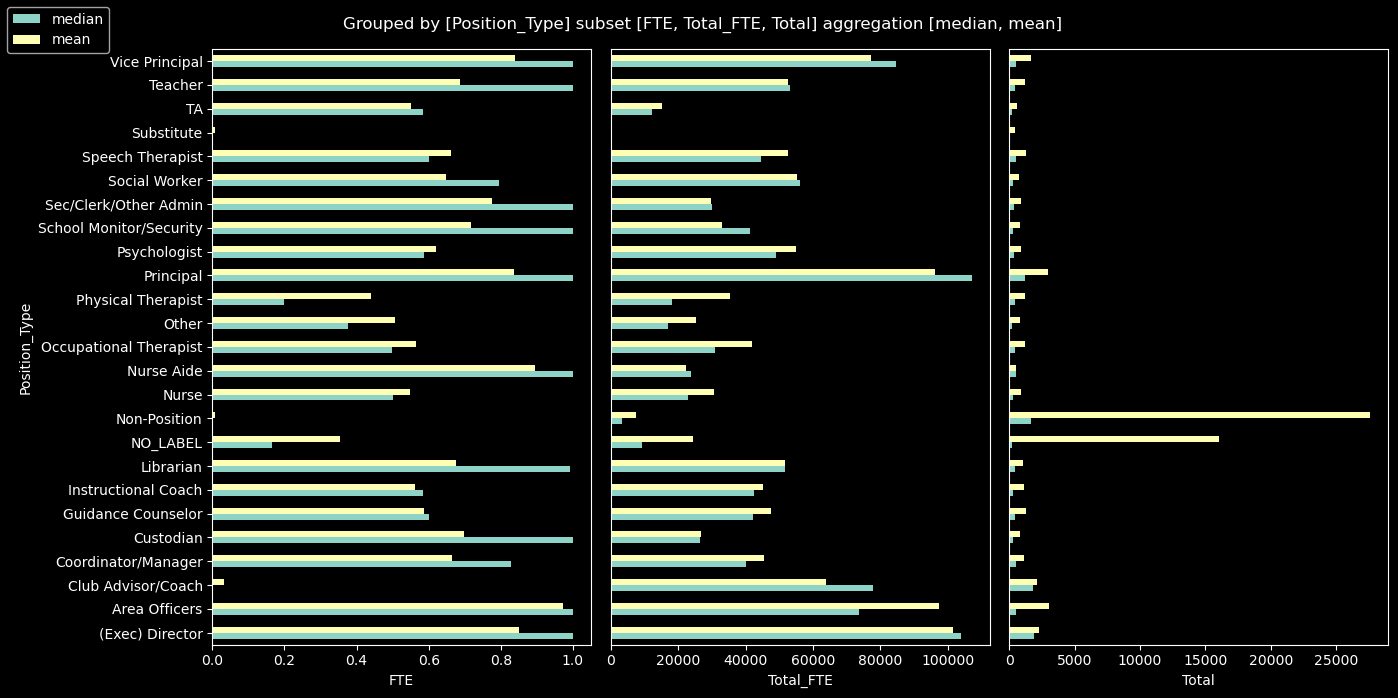

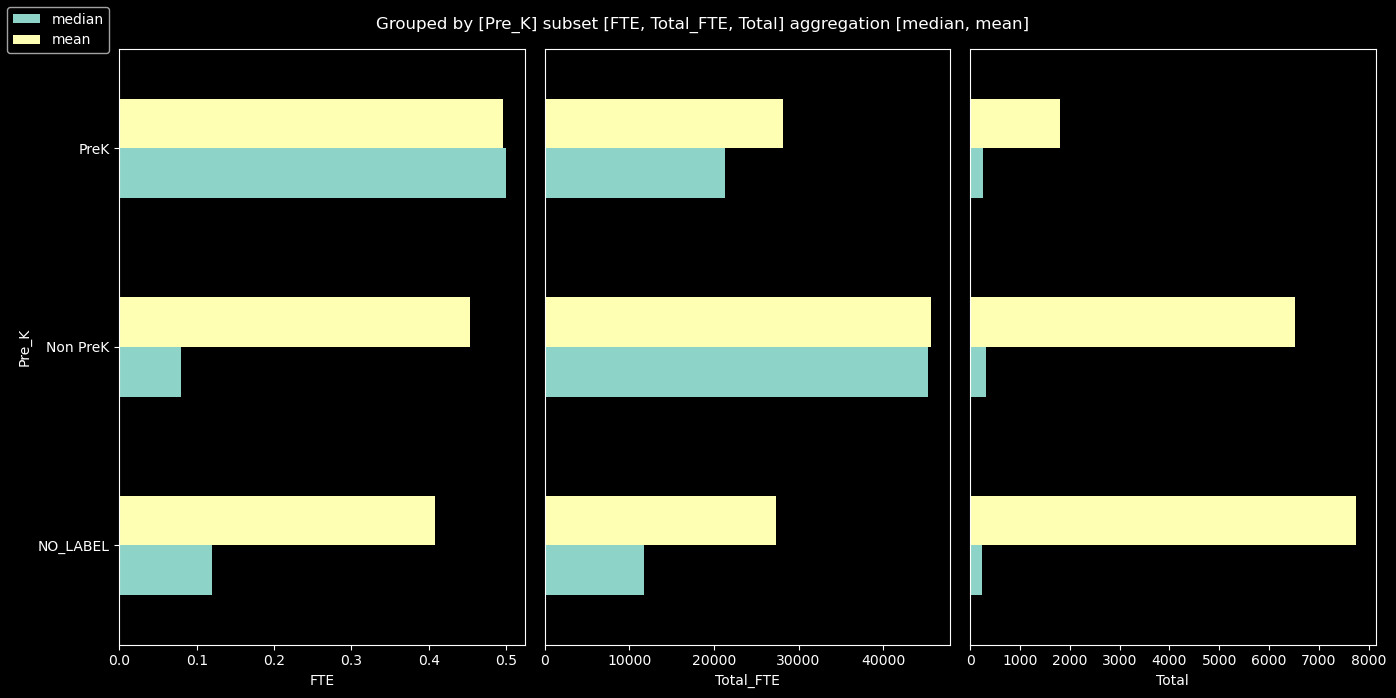

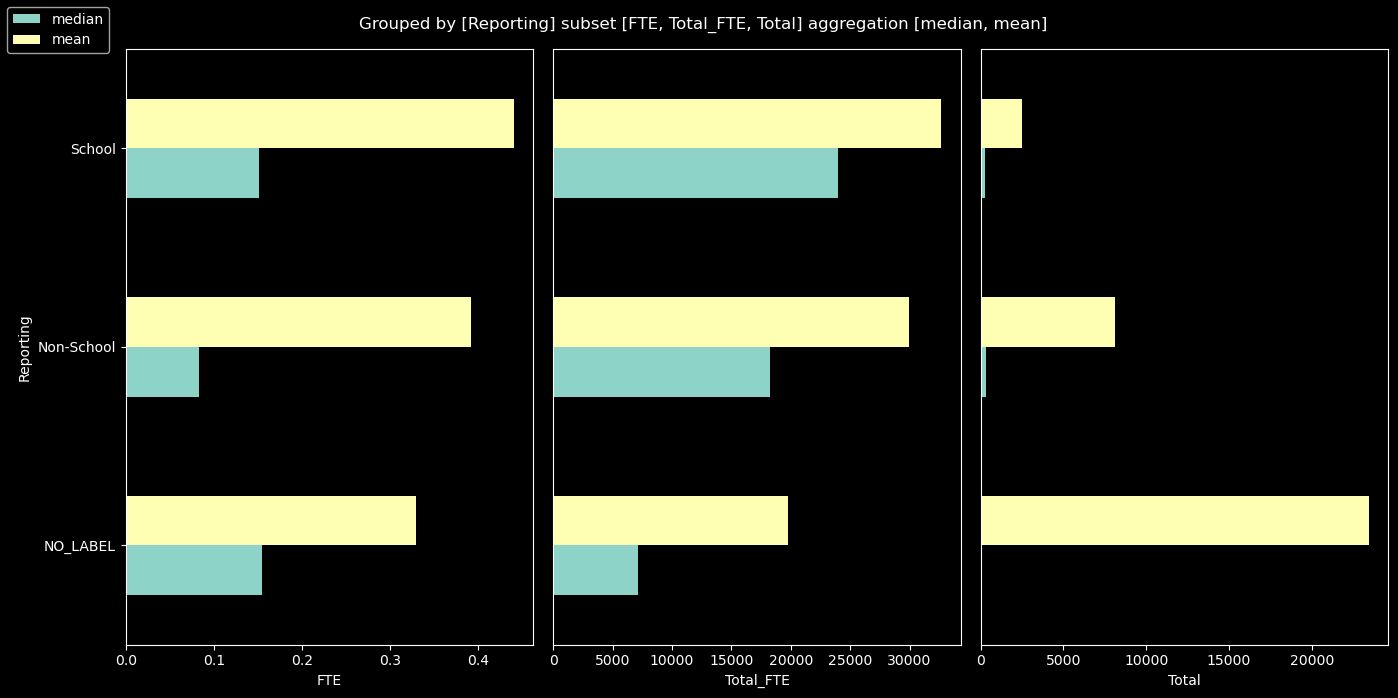

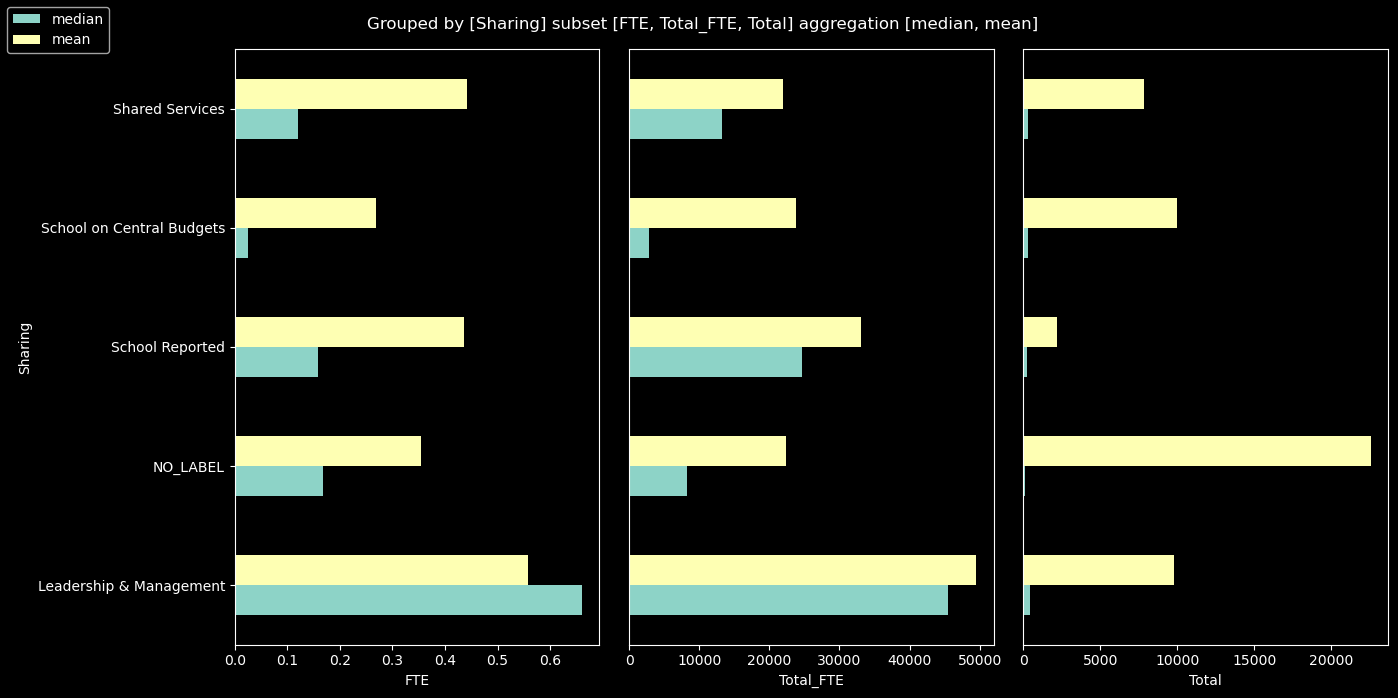

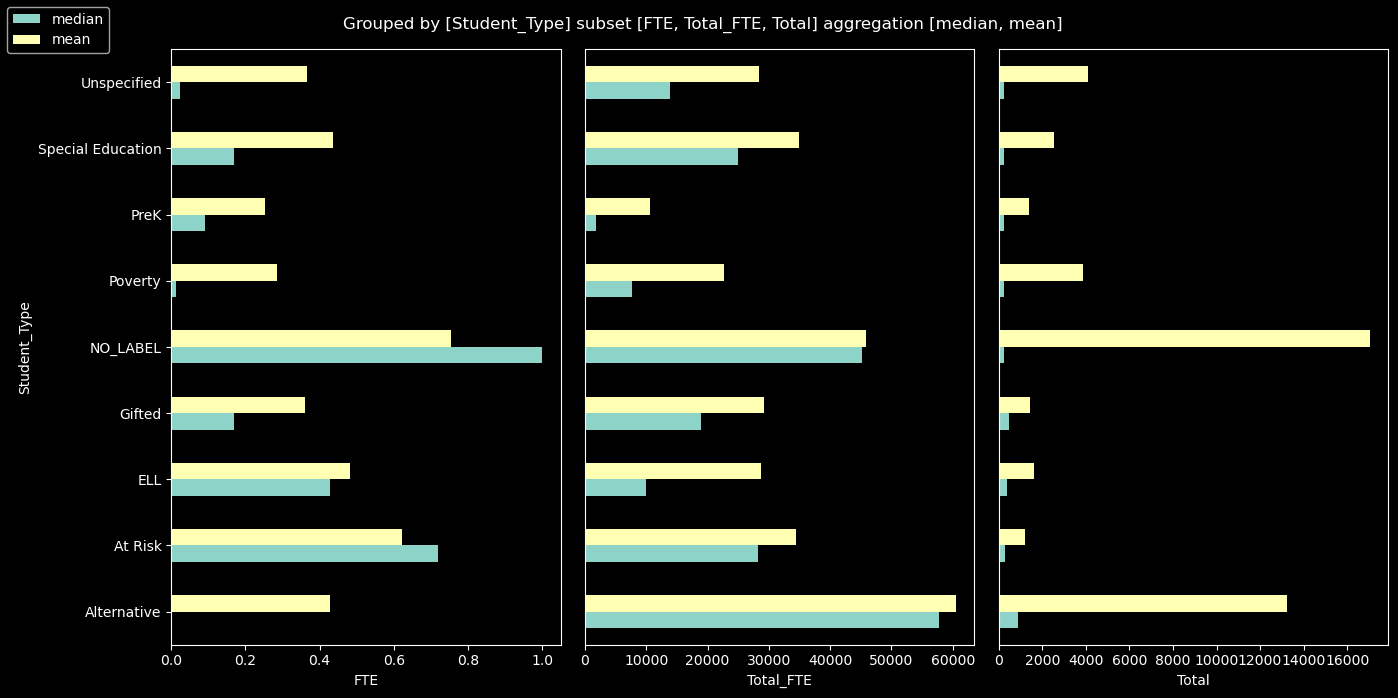

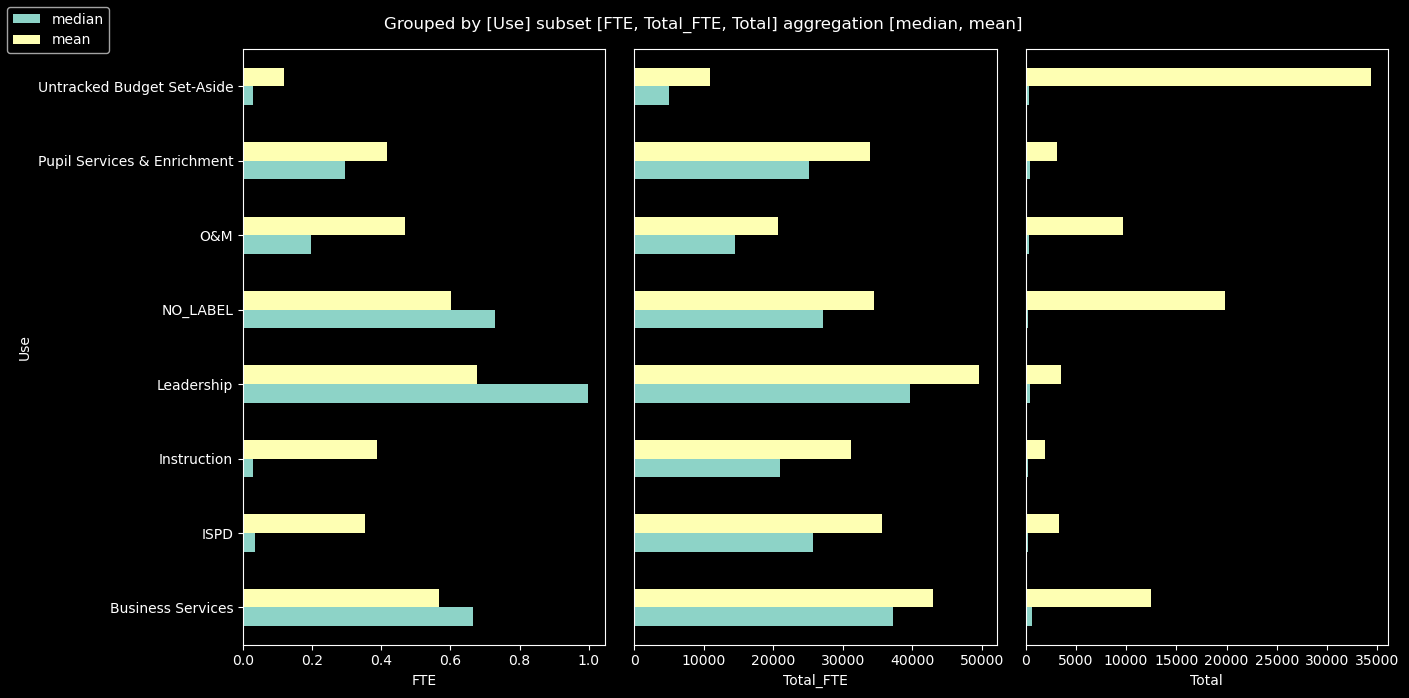

In [51]:
for label in LABELS:
    plot_grouped_statistics(df, cols=['FTE', 'Total_FTE', 'Total'], by=label)

### K-bins discretization

In [52]:
from sklearn.preprocessing import KBinsDiscretizer
KBinsDiscretizer().get_params()

{'dtype': None,
 'encode': 'onehot',
 'n_bins': 5,
 'random_state': None,
 'strategy': 'quantile',
 'subsample': 'warn'}

In [53]:
df[NUMERIC_FEATURES]

FTE     Total     Total_FTE
134338  1.00000       NaN  50471.810000
206341      NaN  3477.860           NaN
326408  1.00000       NaN  62237.130000
364634      NaN    22.300           NaN
47683       NaN    54.166           NaN
...         ...       ...           ...
109283      NaN    48.620           NaN
102430  0.00431       NaN    128.824985
413949  1.00000       NaN   4902.290000
433672      NaN  4020.290           NaN
415831      NaN    46.530           NaN

[400277 rows x 3 columns]

In [54]:
from mcr.util import binary_pivot_table

#### Uniform strategy

All bins in each feature have identical widths.

In [55]:
kbd = KBinsDiscretizer(n_bins=5, encode='onehot', strategy='uniform', subsample=None).fit(df[NUMERIC_FEATURES].fillna(0))
kbins = pd.DataFrame(data=kbd.transform(df[NUMERIC_FEATURES].fillna(0)).toarray(), columns=kbd.get_feature_names_out()).astype('uint8')
binary_pivot_table(kbins, 'FTE', 'Total_FTE')

#### Quantile strategy

All bins in each feature have the same number of points.

In [56]:
kbd = KBinsDiscretizer(n_bins=[2,5,2], encode='onehot', strategy='quantile', subsample=None).fit(df[NUMERIC_FEATURES].fillna(0))
kbins = pd.DataFrame(data=kbd.transform(df[NUMERIC_FEATURES].fillna(0)).toarray(), columns=kbd.get_feature_names_out()).astype('uint8')
binary_pivot_table(kbins, 'FTE', 'Total_FTE')

#### K-means strategy

Values in each bin have the same nearest center of a 1D k-means cluster.

In [57]:
kbd = KBinsDiscretizer(n_bins=5, encode='onehot', strategy='kmeans', subsample=None).fit(df[NUMERIC_FEATURES].fillna(0))
kbins = pd.DataFrame(data=kbd.transform(df[NUMERIC_FEATURES].fillna(0)).toarray(), columns=kbd.get_feature_names_out()).astype('uint8')
binary_pivot_table(kbins, 'FTE', 'Total_FTE')

### Sign discretization

In [58]:
from mcr.ml.preprocessing import sign_indicator

In [59]:
signs = sign_indicator(df[NUMERIC_FEATURES])
signs

FTE_negative  FTE_zero  FTE_positive  Total_negative  Total_zero  \
134338         False     False          True           False       False   
206341         False     False         False           False       False   
326408         False     False          True           False       False   
364634         False     False         False           False       False   
47683          False     False         False           False       False   
...              ...       ...           ...             ...         ...   
109283         False     False         False           False       False   
102430         False     False          True           False       False   
413949         False     False          True           False       False   
433672         False     False         False           False       False   
415831         False     False         False           False       False   

        Total_positive  Total_FTE_negative  Total_FTE_zero  Total_FTE_positive  
134338           False               False           False                True  
206341            True               False           False               False  
326408           False               False           False                True  
364634            True               False           False               False  
47683             True               False           False               False  
...                ...                 ...             ...                 ...  
109283            True               False           False               False  
102430           False               False           False                True  
413949           False               False           False                True  
433672            True               False           False               False  
415831            True               False           False               False  

[400277 rows x 9 columns]

Pivot Tables

In [60]:
binary_pivot_table(signs, 'FTE', 'Total_FTE')

### TODO: Sign and missing analysis

In [61]:
#FTE isnull Total isnull
df.loc[(df.FTE.isnull()) & (df.Total.isnull()), NUMERIC_FEATURES+LABELS]

FTE  Total  Total_FTE  Function Object_Type Operating_Status  \
156609  NaN    NaN        NaN  NO_LABEL    NO_LABEL    Non-Operating   
358584  NaN    NaN        NaN  NO_LABEL    NO_LABEL    Non-Operating   
85777   NaN    NaN        NaN  NO_LABEL    NO_LABEL    Non-Operating   
327717  NaN    NaN        NaN  NO_LABEL    NO_LABEL    Non-Operating   
269886  NaN    NaN        NaN  NO_LABEL    NO_LABEL    Non-Operating   
...     ...    ...        ...       ...         ...              ...   
300250  NaN    NaN        NaN  NO_LABEL    NO_LABEL    Non-Operating   
289753  NaN    NaN        NaN  NO_LABEL    NO_LABEL    Non-Operating   
438970  NaN    NaN        NaN  NO_LABEL    NO_LABEL    Non-Operating   
334668  NaN    NaN        NaN  NO_LABEL    NO_LABEL    Non-Operating   
29710   NaN    NaN        NaN  NO_LABEL    NO_LABEL    Non-Operating   

       Position_Type     Pre_K Reporting   Sharing Student_Type       Use  
156609      NO_LABEL  NO_LABEL  NO_LABEL  NO_LABEL     NO_LABEL  NO_LABEL  
358584      NO_LABEL  NO_LABEL  NO_LABEL  NO_LABEL     NO_LABEL  NO_LABEL  
85777       NO_LABEL  NO_LABEL  NO_LABEL  NO_LABEL     NO_LABEL  NO_LABEL  
327717      NO_LABEL  NO_LABEL  NO_LABEL  NO_LABEL     NO_LABEL  NO_LABEL  
269886      NO_LABEL  NO_LABEL  NO_LABEL  NO_LABEL     NO_LABEL  NO_LABEL  
...              ...       ...       ...       ...          ...       ...  
300250      NO_LABEL  NO_LABEL  NO_LABEL  NO_LABEL     NO_LABEL  NO_LABEL  
289753      NO_LABEL  NO_LABEL  NO_LABEL  NO_LABEL     NO_LABEL  NO_LABEL  
438970      NO_LABEL  NO_LABEL  NO_LABEL  NO_LABEL     NO_LABEL  NO_LABEL  
334668      NO_LABEL  NO_LABEL  NO_LABEL  NO_LABEL     NO_LABEL  NO_LABEL  
29710       NO_LABEL  NO_LABEL  NO_LABEL  NO_LABEL     NO_LABEL  NO_LABEL  

[3184 rows x 12 columns]

In [62]:
#FTE isnull Total notnull
df.loc[df.FTE.isnull() & df.Total.notnull(), NUMERIC_FEATURES+LABELS]

FTE       Total  Total_FTE                            Function  \
206341  NaN  3477.86000        NaN                            NO_LABEL   
364634  NaN    22.30000        NaN             Substitute Compensation   
47683   NaN    54.16600        NaN             Substitute Compensation   
229958  NaN    -8.15000        NaN            Facilities & Maintenance   
417668  NaN  2000.05000        NaN  Instructional Materials & Supplies   
...     ...         ...        ...                                 ...   
307423  NaN  -390.71000        NaN                            NO_LABEL   
46691   NaN   283.98864        NaN                Teacher Compensation   
109283  NaN    48.62000        NaN            Professional Development   
433672  NaN  4020.29000        NaN                     Library & Media   
415831  NaN    46.53000        NaN             Substitute Compensation   

                       Object_Type   Operating_Status        Position_Type  \
206341                    NO_LABEL      Non-Operating             NO_LABEL   
364634                    Benefits  PreK-12 Operating           Substitute   
47683      Substitute Compensation  PreK-12 Operating              Teacher   
229958                    Benefits  PreK-12 Operating            Custodian   
417668          Supplies/Materials  PreK-12 Operating         Non-Position   
...                            ...                ...                  ...   
307423                    NO_LABEL      Non-Operating             NO_LABEL   
46691   Other Compensation/Stipend  PreK-12 Operating              Teacher   
109283  Other Compensation/Stipend  PreK-12 Operating  Instructional Coach   
433672                    Benefits  PreK-12 Operating            Librarian   
415831     Substitute Compensation  PreK-12 Operating           Substitute   

           Pre_K   Reporting                    Sharing       Student_Type  \
206341  NO_LABEL    NO_LABEL                   NO_LABEL           NO_LABEL   
364634  NO_LABEL      School            School Reported        Unspecified   
47683   NO_LABEL      School            School Reported        Unspecified   
229958  NO_LABEL      School            School Reported        Unspecified   
417668  NO_LABEL      School            School Reported  Special Education   
...          ...         ...                        ...                ...   
307423  NO_LABEL    NO_LABEL                   NO_LABEL           NO_LABEL   
46691   NO_LABEL  Non-School  School on Central Budgets        Unspecified   
109283  NO_LABEL  Non-School            Shared Services        Unspecified   
433672  NO_LABEL  Non-School  School on Central Budgets        Unspecified   
415831  Non PreK      School            School Reported            Poverty   

                Use  
206341     NO_LABEL  
364634  Instruction  
47683   Instruction  
229958          O&M  
417668  Instruction  
...             ...  
307423     NO_LABEL  
46691   Instruction  
109283         ISPD  
433672  Instruction  
415831  Instruction  

[271022 rows x 12 columns]

In [63]:
#FTE notnull Total isnull
df.loc[df.FTE.notnull() & df.Total.isnull(), NUMERIC_FEATURES+LABELS]

FTE  Total     Total_FTE                      Function  \
134338  1.000000    NaN  50471.810000          Teacher Compensation   
326408  1.000000    NaN  62237.130000          Teacher Compensation   
84272   0.600000    NaN  38824.790000          Teacher Compensation   
169914  1.000000    NaN  66651.255981             Security & Safety   
291539  0.012931    NaN    329.353815       Substitute Compensation   
...          ...    ...           ...                           ...   
70455   1.000000    NaN  71846.661087                      NO_LABEL   
72072   1.000000    NaN  65258.960000         School Administration   
220181  0.090000    NaN   2293.931767                 Food Services   
102430  0.004310    NaN    128.824985       Substitute Compensation   
413949  1.000000    NaN   4902.290000  Parent & Community Relations   

                     Object_Type        Operating_Status   Position_Type  \
134338                  NO_LABEL       PreK-12 Operating         Teacher   
326408  Base Salary/Compensation       PreK-12 Operating         Teacher   
84272   Base Salary/Compensation       PreK-12 Operating         Teacher   
169914  Base Salary/Compensation       PreK-12 Operating           Other   
291539  Base Salary/Compensation       PreK-12 Operating      Substitute   
...                          ...                     ...             ...   
70455                   NO_LABEL  Operating, Not PreK-12        NO_LABEL   
72072   Base Salary/Compensation       PreK-12 Operating  Vice Principal   
220181  Base Salary/Compensation       PreK-12 Operating           Other   
102430  Base Salary/Compensation       PreK-12 Operating      Substitute   
413949                  NO_LABEL       PreK-12 Operating           Other   

           Pre_K   Reporting                  Sharing Student_Type  \
134338  NO_LABEL      School          School Reported     NO_LABEL   
326408  Non PreK      School          School Reported  Unspecified   
84272   Non PreK      School          School Reported  Unspecified   
169914  Non PreK  Non-School  Leadership & Management  Unspecified   
291539  NO_LABEL      School          School Reported  Unspecified   
...          ...         ...                      ...          ...   
70455   NO_LABEL    NO_LABEL                 NO_LABEL     NO_LABEL   
72072   Non PreK      School          School Reported  Unspecified   
220181  Non PreK      School          Shared Services  Unspecified   
102430  NO_LABEL      School          School Reported  Unspecified   
413949  NO_LABEL      School          School Reported     NO_LABEL   

                Use  
134338  Instruction  
326408  Instruction  
84272   Instruction  
169914          O&M  
291539  Instruction  
...             ...  
70455      NO_LABEL  
72072    Leadership  
220181          O&M  
102430  Instruction  
413949     NO_LABEL  

[94845 rows x 12 columns]

In [64]:
#FTE zero Total zero
df.loc[(df.FTE==0) & (df.Total==0), NUMERIC_FEATURES+LABELS]

FTE  Total  Total_FTE                  Function Object_Type  \
425038  0.0    0.0        NaN                  NO_LABEL    NO_LABEL   
108332  0.0    0.0        NaN  Professional Development    Benefits   
392061  0.0    0.0        NaN                  NO_LABEL    NO_LABEL   

              Operating_Status Position_Type     Pre_K Reporting  \
425038  Operating, Not PreK-12      NO_LABEL  NO_LABEL  NO_LABEL   
108332       PreK-12 Operating    Substitute  NO_LABEL    School   
392061  Operating, Not PreK-12      NO_LABEL  NO_LABEL  NO_LABEL   

                Sharing Student_Type       Use  
425038         NO_LABEL     NO_LABEL  NO_LABEL  
108332  School Reported  Unspecified      ISPD  
392061         NO_LABEL     NO_LABEL  NO_LABEL

In [65]:
#FTE negative Total zero
df.loc[(df.FTE<0) & (df.Total==0), NUMERIC_FEATURES+LABELS]

Empty DataFrame
Columns: [FTE, Total, Total_FTE, Function, Object_Type, Operating_Status, Position_Type, Pre_K, Reporting, Sharing, Student_Type, Use]
Index: []

In [66]:
#FTE positive Total zero
df.loc[(df.FTE>0) & (df.Total==0), NUMERIC_FEATURES+LABELS]

Empty DataFrame
Columns: [FTE, Total, Total_FTE, Function, Object_Type, Operating_Status, Position_Type, Pre_K, Reporting, Sharing, Student_Type, Use]
Index: []

In [67]:
#FTE zero Total negative
df.loc[(df.FTE==0) & (df.Total<0), NUMERIC_FEATURES+LABELS]

FTE   Total  Total_FTE                    Function  \
15812   0.0 -959.28        NaN          Aides Compensation   
78816   0.0   -0.38        NaN        Teacher Compensation   
249419  0.0   -0.08        NaN  Untracked Budget Set-Aside   
23073   0.0   -0.40        NaN                    NO_LABEL   
382957  0.0   -0.14        NaN    Facilities & Maintenance   
...     ...     ...        ...                         ...   
269971  0.0   -0.44        NaN                    NO_LABEL   
315906  0.0   -0.56        NaN                    NO_LABEL   
319690  0.0   -0.38        NaN     Substitute Compensation   
414078  0.0   -0.38        NaN                    NO_LABEL   
90389   0.0   -0.24        NaN          Social & Emotional   

                     Object_Type        Operating_Status Position_Type  \
15812   Base Salary/Compensation       PreK-12 Operating            TA   
78816   Base Salary/Compensation       PreK-12 Operating       Teacher   
249419                  Benefits       PreK-12 Operating    Substitute   
23073                   NO_LABEL  Operating, Not PreK-12      NO_LABEL   
382957  Base Salary/Compensation       PreK-12 Operating     Custodian   
...                          ...                     ...           ...   
269971                  NO_LABEL           Non-Operating      NO_LABEL   
315906                  NO_LABEL  Operating, Not PreK-12      NO_LABEL   
319690  Base Salary/Compensation       PreK-12 Operating    Substitute   
414078                  NO_LABEL  Operating, Not PreK-12      NO_LABEL   
90389   Base Salary/Compensation       PreK-12 Operating  Psychologist   

           Pre_K   Reporting                    Sharing       Student_Type  \
15812   NO_LABEL      School            School Reported  Special Education   
78816   NO_LABEL      School            School Reported        Unspecified   
249419  NO_LABEL      School            School Reported        Unspecified   
23073   NO_LABEL    NO_LABEL                   NO_LABEL           NO_LABEL   
382957  NO_LABEL  Non-School            Shared Services        Unspecified   
...          ...         ...                        ...                ...   
269971  NO_LABEL    NO_LABEL                   NO_LABEL           NO_LABEL   
315906  NO_LABEL    NO_LABEL                   NO_LABEL           NO_LABEL   
319690  NO_LABEL      School            School Reported        Unspecified   
414078  NO_LABEL    NO_LABEL                   NO_LABEL           NO_LABEL   
90389   NO_LABEL  Non-School  School on Central Budgets  Special Education   

                                Use  
15812                   Instruction  
78816                   Instruction  
249419   Untracked Budget Set-Aside  
23073                      NO_LABEL  
382957                          O&M  
...                             ...  
269971                     NO_LABEL  
315906                     NO_LABEL  
319690                  Instruction  
414078                     NO_LABEL  
90389   Pupil Services & Enrichment  

[136 rows x 12 columns]

In [68]:
#FTE negative Total negative
df.loc[(df.FTE<0) & (df.Total<0), NUMERIC_FEATURES+LABELS]

Empty DataFrame
Columns: [FTE, Total, Total_FTE, Function, Object_Type, Operating_Status, Position_Type, Pre_K, Reporting, Sharing, Student_Type, Use]
Index: []

In [69]:
#FTE positive Total negative
df.loc[(df.FTE>0) & (df.Total<0), NUMERIC_FEATURES+LABELS]

Empty DataFrame
Columns: [FTE, Total, Total_FTE, Function, Object_Type, Operating_Status, Position_Type, Pre_K, Reporting, Sharing, Student_Type, Use]
Index: []

In [70]:
#FTE zero Total positive
df.loc[(df.FTE==0) & (df.Total>0), NUMERIC_FEATURES+LABELS]

FTE      Total  Total_FTE                 Function  \
21870   0.0   228.5300        NaN                 NO_LABEL   
126388  0.0    71.1400        NaN  Substitute Compensation   
416860  0.0  1166.7700        NaN     Teacher Compensation   
80731   0.0  3412.4000        NaN     Teacher Compensation   
231688  0.0    76.9300        NaN  Substitute Compensation   
...     ...        ...        ...                      ...   
3476    0.0   141.0200        NaN  Substitute Compensation   
54280   0.0   535.4500        NaN  Substitute Compensation   
210652  0.0   111.9600        NaN  Substitute Compensation   
58170   0.0    71.3100        NaN  Substitute Compensation   
375092  0.0   141.9399        NaN  Substitute Compensation   

                       Object_Type        Operating_Status Position_Type  \
21870                     NO_LABEL  Operating, Not PreK-12      NO_LABEL   
126388     Substitute Compensation       PreK-12 Operating    Substitute   
416860  Other Compensation/Stipend       PreK-12 Operating       Teacher   
80731   Other Compensation/Stipend       PreK-12 Operating       Teacher   
231688     Substitute Compensation       PreK-12 Operating    Substitute   
...                            ...                     ...           ...   
3476       Substitute Compensation       PreK-12 Operating    Substitute   
54280      Substitute Compensation       PreK-12 Operating    Substitute   
210652     Substitute Compensation       PreK-12 Operating    Substitute   
58170      Substitute Compensation       PreK-12 Operating    Substitute   
375092     Substitute Compensation       PreK-12 Operating    Substitute   

           Pre_K Reporting          Sharing       Student_Type          Use  
21870   NO_LABEL  NO_LABEL         NO_LABEL           NO_LABEL     NO_LABEL  
126388  Non PreK    School  School Reported        Unspecified  Instruction  
416860  Non PreK    School  School Reported        Unspecified  Instruction  
80731   Non PreK    School  School Reported            Poverty  Instruction  
231688  NO_LABEL    School  School Reported        Unspecified  Instruction  
...          ...       ...              ...                ...          ...  
3476    Non PreK    School  School Reported        Unspecified  Instruction  
54280   Non PreK    School  School Reported  Special Education  Instruction  
210652  Non PreK    School  School Reported  Special Education  Instruction  
58170   Non PreK    School  School Reported        Unspecified  Instruction  
375092  Non PreK    School  School Reported        Unspecified  Instruction  

[31087 rows x 12 columns]

In [71]:
#FTE negative Total positive
df.loc[(df.FTE<0) & (df.Total>0), NUMERIC_FEATURES+LABELS]

Empty DataFrame
Columns: [FTE, Total, Total_FTE, Function, Object_Type, Operating_Status, Position_Type, Pre_K, Reporting, Sharing, Student_Type, Use]
Index: []

In [72]:
#FTE positive Total positive
df.loc[(df.FTE>0) & (df.Total>0), NUMERIC_FEATURES+LABELS]

Empty DataFrame
Columns: [FTE, Total, Total_FTE, Function, Object_Type, Operating_Status, Position_Type, Pre_K, Reporting, Sharing, Student_Type, Use]
Index: []

In [73]:
#FTE zero Total isnull
df.loc[(df.FTE==0) & (df.Total.isnull()), NUMERIC_FEATURES+LABELS]

FTE  Total  Total_FTE  \
150854  0.0    NaN        NaN   
151969  0.0    NaN        NaN   
205130  0.0    NaN        NaN   
430116  0.0    NaN        NaN   
13287   0.0    NaN        NaN   
...     ...    ...        ...   
209765  0.0    NaN        NaN   
435831  0.0    NaN        NaN   
283533  0.0    NaN        NaN   
114822  0.0    NaN        NaN   
175696  0.0    NaN        NaN   

                                               Function  \
150854                                         NO_LABEL   
151969                                         NO_LABEL   
205130                               Social & Emotional   
430116                          Substitute Compensation   
13287                              Teacher Compensation   
...                                                 ...   
209765                         Facilities & Maintenance   
435831  Special Population Program Management & Support   
283533                                    Food Services   
114822                                       Governance   
175696                                    Food Services   

                       Object_Type   Operating_Status       Position_Type  \
150854                    NO_LABEL      Non-Operating            NO_LABEL   
151969                    NO_LABEL      Non-Operating            NO_LABEL   
205130        Travel & Conferences  PreK-12 Operating  Guidance Counselor   
430116     Substitute Compensation  PreK-12 Operating          Substitute   
13287   Other Compensation/Stipend  PreK-12 Operating             Teacher   
...                            ...                ...                 ...   
209765  Other Compensation/Stipend  PreK-12 Operating        Non-Position   
435831  Other Compensation/Stipend  PreK-12 Operating        Non-Position   
283533                    NO_LABEL  PreK-12 Operating               Other   
114822                    NO_LABEL  PreK-12 Operating               Other   
175696                    NO_LABEL  PreK-12 Operating               Other   

           Pre_K   Reporting                  Sharing       Student_Type  \
150854  NO_LABEL    NO_LABEL                 NO_LABEL           NO_LABEL   
151969  NO_LABEL    NO_LABEL                 NO_LABEL           NO_LABEL   
205130  Non PreK      School          School Reported  Special Education   
430116  Non PreK      School          School Reported        Unspecified   
13287   Non PreK      School          School Reported        Unspecified   
...          ...         ...                      ...                ...   
209765  Non PreK      School          School Reported        Unspecified   
435831  Non PreK  Non-School  Leadership & Management  Special Education   
283533  NO_LABEL      School          School Reported           NO_LABEL   
114822  NO_LABEL  Non-School  Leadership & Management           NO_LABEL   
175696  NO_LABEL      School          School Reported           NO_LABEL   

                                Use  
150854                     NO_LABEL  
151969                     NO_LABEL  
205130  Pupil Services & Enrichment  
430116                  Instruction  
13287                   Instruction  
...                             ...  
209765                          O&M  
435831                         ISPD  
283533                     NO_LABEL  
114822                     NO_LABEL  
175696                     NO_LABEL  

[112 rows x 12 columns]

In [74]:
#FTE negative Total isnull
df.loc[(df.FTE<0) & (df.Total.isnull()), NUMERIC_FEATURES+LABELS]

FTE  Total    Total_FTE  \
111271 -2.001232e-02    NaN  -595.654318   
441763 -5.434779e-02    NaN -4116.521371   
341426 -2.368745e-03    NaN  -222.097715   
331522 -4.167114e-02    NaN -2911.257472   
29425  -1.811503e-02    NaN  -869.659820   
202976 -1.524717e-03    NaN   -49.082876   
185439 -1.063836e-03    NaN   -78.174053   
432592 -7.443467e-07    NaN     0.172825   
343482 -8.755064e-02    NaN -3665.877877   
105740 -3.020340e-02    NaN -1824.193333   
198366 -3.886916e-02    NaN -1119.479053   
7573   -1.121296e-06    NaN    -0.995772   
218456 -3.469447e-18    NaN          NaN   
263750 -2.512373e-07    NaN          NaN   
391218 -1.301321e-06    NaN    -0.121487   
89857  -2.803241e-07    NaN     0.378557   
145588 -1.040834e-17    NaN     0.030000   
10702  -9.174774e-05    NaN    -6.082811   
140218 -1.866786e-07    NaN     0.508563   
178871 -3.134635e-04    NaN   -10.827675   
120439 -1.204364e-03    NaN   -38.723702   
21338  -2.555933e-04    NaN    -8.719241   
214013 -4.187137e-07    NaN     0.485697   
22540  -3.829800e-02    NaN          NaN   
346991 -2.351461e-03    NaN   -35.953020   
43527  -9.647889e-04    NaN   -16.706390   
193662 -3.042857e-02    NaN          NaN   
303253 -2.037822e-07    NaN     0.378562   
416602 -1.224196e-06    NaN    -0.221482   
51600  -1.250590e-03    NaN   -57.965480   
169065 -2.067619e-02    NaN  -966.621829   
311769 -1.188863e-06    NaN    -0.197202   
33829  -6.122449e-02    NaN          NaN   
226837 -8.333574e-02    NaN -4876.099653   
93614  -7.280316e-07    NaN     0.405678   
144109 -4.336809e-19    NaN    -0.260000   
350549 -8.163265e-03    NaN          NaN   
301497 -1.857183e-06    NaN    -0.431520   
253483 -1.630427e-02    NaN  -712.462722   
236065 -3.125179e-03    NaN  -100.305414   
351181 -2.368622e-03    NaN  -221.166281   
335091 -3.998406e-03    NaN   -75.177010   
260677 -2.810015e-07    NaN    -0.012869   
301883 -6.793579e-02    NaN -3839.871110   
162060 -3.299699e-03    NaN  -149.755975   
87981  -2.168404e-19    NaN    -0.030000   
414775 -6.098149e-03    NaN  -194.158610   
11890  -2.448980e-02    NaN          NaN   
251131 -2.264520e-02    NaN -1279.639890   
281311 -8.163265e-03    NaN  -416.203361   
46366  -6.522883e-03    NaN  -131.104536   

                                               Function  \
111271  Special Population Program Management & Support   
441763                             Teacher Compensation   
341426  Special Population Program Management & Support   
331522                             Teacher Compensation   
29425                              Teacher Compensation   
202976  Special Population Program Management & Support   
185439                         Facilities & Maintenance   
432592                             Teacher Compensation   
343482                          Substitute Compensation   
105740                             Teacher Compensation   
198366                         Facilities & Maintenance   
7573                               Teacher Compensation   
218456                                         NO_LABEL   
263750                                         NO_LABEL   
391218                       Physical Health & Services   
89857                              Teacher Compensation   
145588                               Student Assignment   
10702                              Teacher Compensation   
140218                                  Library & Media   
178871                     Parent & Community Relations   
120439                         Professional Development   
21338                          Facilities & Maintenance   
214013                                  Library & Media   
22540                                          NO_LABEL   
346991                                         NO_LABEL   
43527                                     Food Services   
193662                                         NO_LABEL   
303253                         Professional Development   
416602           

In [75]:
#FTE positive Total isnull
df.loc[(df.FTE>0) & (df.Total.isnull()), NUMERIC_FEATURES+LABELS]

FTE  Total     Total_FTE                      Function  \
134338  1.000000    NaN  50471.810000          Teacher Compensation   
326408  1.000000    NaN  62237.130000          Teacher Compensation   
84272   0.600000    NaN  38824.790000          Teacher Compensation   
169914  1.000000    NaN  66651.255981             Security & Safety   
291539  0.012931    NaN    329.353815       Substitute Compensation   
...          ...    ...           ...                           ...   
70455   1.000000    NaN  71846.661087                      NO_LABEL   
72072   1.000000    NaN  65258.960000         School Administration   
220181  0.090000    NaN   2293.931767                 Food Services   
102430  0.004310    NaN    128.824985       Substitute Compensation   
413949  1.000000    NaN   4902.290000  Parent & Community Relations   

                     Object_Type        Operating_Status   Position_Type  \
134338                  NO_LABEL       PreK-12 Operating         Teacher   
326408  Base Salary/Compensation       PreK-12 Operating         Teacher   
84272   Base Salary/Compensation       PreK-12 Operating         Teacher   
169914  Base Salary/Compensation       PreK-12 Operating           Other   
291539  Base Salary/Compensation       PreK-12 Operating      Substitute   
...                          ...                     ...             ...   
70455                   NO_LABEL  Operating, Not PreK-12        NO_LABEL   
72072   Base Salary/Compensation       PreK-12 Operating  Vice Principal   
220181  Base Salary/Compensation       PreK-12 Operating           Other   
102430  Base Salary/Compensation       PreK-12 Operating      Substitute   
413949                  NO_LABEL       PreK-12 Operating           Other   

           Pre_K   Reporting                  Sharing Student_Type  \
134338  NO_LABEL      School          School Reported     NO_LABEL   
326408  Non PreK      School          School Reported  Unspecified   
84272   Non PreK      School          School Reported  Unspecified   
169914  Non PreK  Non-School  Leadership & Management  Unspecified   
291539  NO_LABEL      School          School Reported  Unspecified   
...          ...         ...                      ...          ...   
70455   NO_LABEL    NO_LABEL                 NO_LABEL     NO_LABEL   
72072   Non PreK      School          School Reported  Unspecified   
220181  Non PreK      School          Shared Services  Unspecified   
102430  NO_LABEL      School          School Reported  Unspecified   
413949  NO_LABEL      School          School Reported     NO_LABEL   

                Use  
134338  Instruction  
326408  Instruction  
84272   Instruction  
169914          O&M  
291539  Instruction  
...             ...  
70455      NO_LABEL  
72072    Leadership  
220181          O&M  
102430  Instruction  
413949     NO_LABEL  

[94682 rows x 12 columns]

In [76]:
#FTE zero Total notnull
df.loc[(df.FTE==0) & (df.Total.notnull()), NUMERIC_FEATURES+LABELS]

FTE      Total  Total_FTE                 Function  \
21870   0.0   228.5300        NaN                 NO_LABEL   
126388  0.0    71.1400        NaN  Substitute Compensation   
416860  0.0  1166.7700        NaN     Teacher Compensation   
80731   0.0  3412.4000        NaN     Teacher Compensation   
231688  0.0    76.9300        NaN  Substitute Compensation   
...     ...        ...        ...                      ...   
3476    0.0   141.0200        NaN  Substitute Compensation   
54280   0.0   535.4500        NaN  Substitute Compensation   
210652  0.0   111.9600        NaN  Substitute Compensation   
58170   0.0    71.3100        NaN  Substitute Compensation   
375092  0.0   141.9399        NaN  Substitute Compensation   

                       Object_Type        Operating_Status Position_Type  \
21870                     NO_LABEL  Operating, Not PreK-12      NO_LABEL   
126388     Substitute Compensation       PreK-12 Operating    Substitute   
416860  Other Compensation/Stipend       PreK-12 Operating       Teacher   
80731   Other Compensation/Stipend       PreK-12 Operating       Teacher   
231688     Substitute Compensation       PreK-12 Operating    Substitute   
...                            ...                     ...           ...   
3476       Substitute Compensation       PreK-12 Operating    Substitute   
54280      Substitute Compensation       PreK-12 Operating    Substitute   
210652     Substitute Compensation       PreK-12 Operating    Substitute   
58170      Substitute Compensation       PreK-12 Operating    Substitute   
375092     Substitute Compensation       PreK-12 Operating    Substitute   

           Pre_K Reporting          Sharing       Student_Type          Use  
21870   NO_LABEL  NO_LABEL         NO_LABEL           NO_LABEL     NO_LABEL  
126388  Non PreK    School  School Reported        Unspecified  Instruction  
416860  Non PreK    School  School Reported        Unspecified  Instruction  
80731   Non PreK    School  School Reported            Poverty  Instruction  
231688  NO_LABEL    School  School Reported        Unspecified  Instruction  
...          ...       ...              ...                ...          ...  
3476    Non PreK    School  School Reported        Unspecified  Instruction  
54280   Non PreK    School  School Reported  Special Education  Instruction  
210652  Non PreK    School  School Reported  Special Education  Instruction  
58170   Non PreK    School  School Reported        Unspecified  Instruction  
375092  Non PreK    School  School Reported        Unspecified  Instruction  

[31226 rows x 12 columns]

In [77]:
#FTE negative Total notnull
df.loc[(df.FTE<0) & (df.Total.notnull()), NUMERIC_FEATURES+LABELS]

Empty DataFrame
Columns: [FTE, Total, Total_FTE, Function, Object_Type, Operating_Status, Position_Type, Pre_K, Reporting, Sharing, Student_Type, Use]
Index: []

In [78]:
#FTE positive Total notnull
df.loc[(df.FTE>0) & (df.Total.notnull()), NUMERIC_FEATURES+LABELS]

Empty DataFrame
Columns: [FTE, Total, Total_FTE, Function, Object_Type, Operating_Status, Position_Type, Pre_K, Reporting, Sharing, Student_Type, Use]
Index: []

In [79]:
#FTE isnull Total negative
df.loc[(df.FTE.isnull()) & (df.Total<0), NUMERIC_FEATURES+LABELS]

FTE      Total  Total_FTE                  Function Object_Type  \
229958  NaN      -8.15        NaN  Facilities & Maintenance    Benefits   
304569  NaN   -5509.32        NaN                  NO_LABEL    NO_LABEL   
64760   NaN -122544.07        NaN                  NO_LABEL    NO_LABEL   
43727   NaN    -446.11        NaN                  NO_LABEL    NO_LABEL   
84040   NaN  -21795.93        NaN                  NO_LABEL    NO_LABEL   
...     ...        ...        ...                       ...         ...   
376749  NaN   -1058.18        NaN      Teacher Compensation    Benefits   
288379  NaN   -3491.77        NaN                  NO_LABEL    NO_LABEL   
277504  NaN    -838.82        NaN      Teacher Compensation    Benefits   
446383  NaN   -7725.35        NaN                  NO_LABEL    NO_LABEL   
307423  NaN    -390.71        NaN                  NO_LABEL    NO_LABEL   

         Operating_Status Position_Type     Pre_K Reporting          Sharing  \
229958  PreK-12 Operating     Custodian  NO_LABEL    School  School Reported   
304569      Non-Operating      NO_LABEL  NO_LABEL  NO_LABEL         NO_LABEL   
64760       Non-Operating      NO_LABEL  NO_LABEL  NO_LABEL         NO_LABEL   
43727       Non-Operating      NO_LABEL  NO_LABEL  NO_LABEL         NO_LABEL   
84040       Non-Operating      NO_LABEL  NO_LABEL  NO_LABEL         NO_LABEL   
...                   ...           ...       ...       ...              ...   
376749  PreK-12 Operating       Teacher  NO_LABEL    School  School Reported   
288379      Non-Operating      NO_LABEL  NO_LABEL  NO_LABEL         NO_LABEL   
277504  PreK-12 Operating       Teacher  NO_LABEL    School  School Reported   
446383      Non-Operating      NO_LABEL  NO_LABEL  NO_LABEL         NO_LABEL   
307423      Non-Operating      NO_LABEL  NO_LABEL  NO_LABEL         NO_LABEL   

             Student_Type          Use  
229958        Unspecified          O&M  
304569           NO_LABEL     NO_LABEL  
64760            NO_LABEL     NO_LABEL  
43727            NO_LABEL     NO_LABEL  
84040            NO_LABEL     NO_LABEL  
...                   ...          ...  
376749  Special Education  Instruction  
288379           NO_LABEL     NO_LABEL  
277504        Unspecified  Instruction  
446383           NO_LABEL     NO_LABEL  
307423           NO_LABEL     NO_LABEL  

[43662 rows x 12 columns]

In [80]:
#FTE isnull Total zero
df.loc[(df.FTE.isnull()) & (df.Total==0), NUMERIC_FEATURES+LABELS]

FTE  Total  Total_FTE                  Function  \
272836  NaN    0.0        NaN   Substitute Compensation   
12358   NaN    0.0        NaN   Substitute Compensation   
287800  NaN    0.0        NaN         Security & Safety   
80133   NaN    0.0        NaN               Recruitment   
291983  NaN    0.0        NaN                  NO_LABEL   
36950   NaN    0.0        NaN                  NO_LABEL   
197473  NaN    0.0        NaN                  NO_LABEL   
7999    NaN    0.0        NaN                  NO_LABEL   
305440  NaN    0.0        NaN                  NO_LABEL   
272780  NaN    0.0        NaN                  NO_LABEL   
343635  NaN    0.0        NaN                  NO_LABEL   
224050  NaN    0.0        NaN                  NO_LABEL   
247614  NaN    0.0        NaN                  NO_LABEL   
183034  NaN    0.0        NaN               Recruitment   
157626  NaN    0.0        NaN                  NO_LABEL   
50341   NaN    0.0        NaN  Professional Development   
236144  NaN    0.0        NaN      Teacher Compensation   
254546  NaN    0.0        NaN                  NO_LABEL   
6076    NaN    0.0        NaN    Curriculum Development   
66580   NaN    0.0        NaN                  NO_LABEL   
131746  NaN    0.0        NaN                  NO_LABEL   
358774  NaN    0.0        NaN                  NO_LABEL   
272048  NaN    0.0        NaN   Substitute Compensation   
120995  NaN    0.0        NaN   Substitute Compensation   
388516  NaN    0.0        NaN  Facilities & Maintenance   
213108  NaN    0.0        NaN                  NO_LABEL   
364786  NaN    0.0        NaN                  NO_LABEL   
352423  NaN    0.0        NaN             Food Services   
12161   NaN    0.0        NaN  Professional Development   
89121   NaN    0.0        NaN                  NO_LABEL   
142169  NaN    0.0        NaN                  NO_LABEL   
201752  NaN    0.0        NaN                  NO_LABEL   
13146   NaN    0.0        NaN   Substitute Compensation   
252726  NaN    0.0        NaN                  NO_LABEL   
293034  NaN    0.0        NaN                  NO_LABEL   
288671  NaN    0.0        NaN                  NO_LABEL   
363917  NaN    0.0        NaN                  NO_LABEL   
133009  NaN    0.0        NaN                  NO_LABEL   
394425  NaN    0.0        NaN                  NO_LABEL   
1367    NaN    0.0        NaN   Substitute Compensation   
215990  NaN    0.0        NaN                  NO_LABEL   

                        Object_Type   Operating_Status  \
272836                     Benefits  PreK-12 Operating   
12358                      Benefits  PreK-12 Operating   
287800                     Benefits  PreK-12 Operating   
80133                      Benefits  PreK-12 Operating   
291983                     NO_LABEL      Non-Operating   
36950                      NO_LABEL      Non-Operating   
197473                     NO_LABEL      Non-Operating   
7999                       NO_LABEL      Non-Operating   
305440                     NO_LABEL      Non-Operating   
272780                     NO_LABEL      Non-Operating   
343635                     NO_LABEL      Non-Operating   
224050                     NO_LABEL      Non-Operating   
247614                     NO_LABEL      Non-Operating   
183034                     Benefits  PreK-12 Operating   
157626                     NO_LABEL      Non-Operating   
50341      Base Salary/Compensation  PreK-12 Operating   
236144                     Benefits  PreK-12 Operating   
254546                     NO_LABEL      Non-Operating   
6076            Contracted Services  PreK-12 Operating   
66580                      NO_LABEL      Non-Operating   
131746                     NO_LABEL      Non-Operating   
358774                     NO_LABEL      Non-Operating   
272048                     Benefits  PreK-12 Operating   
120995                     Benefits  PreK-12 Operating   
388516       Other Non-Compensation  PreK-12 Operating   
213108               

In [81]:
#FTE isnull Total positive
df.loc[(df.FTE.isnull()) & (df.Total>0), NUMERIC_FEATURES+LABELS]

FTE       Total  Total_FTE                            Function  \
206341  NaN  3477.86000        NaN                            NO_LABEL   
364634  NaN    22.30000        NaN             Substitute Compensation   
47683   NaN    54.16600        NaN             Substitute Compensation   
417668  NaN  2000.05000        NaN  Instructional Materials & Supplies   
126378  NaN     0.72000        NaN                       Food Services   
...     ...         ...        ...                                 ...   
397424  NaN   157.65400        NaN                            NO_LABEL   
46691   NaN   283.98864        NaN                Teacher Compensation   
109283  NaN    48.62000        NaN            Professional Development   
433672  NaN  4020.29000        NaN                     Library & Media   
415831  NaN    46.53000        NaN             Substitute Compensation   

                       Object_Type   Operating_Status        Position_Type  \
206341                    NO_LABEL      Non-Operating             NO_LABEL   
364634                    Benefits  PreK-12 Operating           Substitute   
47683      Substitute Compensation  PreK-12 Operating              Teacher   
417668          Supplies/Materials  PreK-12 Operating         Non-Position   
126378                    Benefits  PreK-12 Operating  Coordinator/Manager   
...                            ...                ...                  ...   
397424                    NO_LABEL      Non-Operating             NO_LABEL   
46691   Other Compensation/Stipend  PreK-12 Operating              Teacher   
109283  Other Compensation/Stipend  PreK-12 Operating  Instructional Coach   
433672                    Benefits  PreK-12 Operating            Librarian   
415831     Substitute Compensation  PreK-12 Operating           Substitute   

           Pre_K   Reporting                    Sharing       Student_Type  \
206341  NO_LABEL    NO_LABEL                   NO_LABEL           NO_LABEL   
364634  NO_LABEL      School            School Reported        Unspecified   
47683   NO_LABEL      School            School Reported        Unspecified   
417668  NO_LABEL      School            School Reported  Special Education   
126378  NO_LABEL  Non-School  School on Central Budgets        Unspecified   
...          ...         ...                        ...                ...   
397424  NO_LABEL    NO_LABEL                   NO_LABEL           NO_LABEL   
46691   NO_LABEL  Non-School  School on Central Budgets        Unspecified   
109283  NO_LABEL  Non-School            Shared Services        Unspecified   
433672  NO_LABEL  Non-School  School on Central Budgets        Unspecified   
415831  Non PreK      School            School Reported            Poverty   

                Use  
206341     NO_LABEL  
364634  Instruction  
47683   Instruction  
417668  Instruction  
126378          O&M  
...             ...  
397424     NO_LABEL  
46691   Instruction  
109283         ISPD  
433672  Instruction  
415831  Instruction  

[227319 rows x 12 columns]

In [82]:
#FTE notnull Total negative
df.loc[(df.FTE.notnull()) & (df.Total<0), NUMERIC_FEATURES+LABELS]

FTE   Total  Total_FTE                    Function  \
15812   0.0 -959.28        NaN          Aides Compensation   
78816   0.0   -0.38        NaN        Teacher Compensation   
249419  0.0   -0.08        NaN  Untracked Budget Set-Aside   
23073   0.0   -0.40        NaN                    NO_LABEL   
382957  0.0   -0.14        NaN    Facilities & Maintenance   
...     ...     ...        ...                         ...   
269971  0.0   -0.44        NaN                    NO_LABEL   
315906  0.0   -0.56        NaN                    NO_LABEL   
319690  0.0   -0.38        NaN     Substitute Compensation   
414078  0.0   -0.38        NaN                    NO_LABEL   
90389   0.0   -0.24        NaN          Social & Emotional   

                     Object_Type        Operating_Status Position_Type  \
15812   Base Salary/Compensation       PreK-12 Operating            TA   
78816   Base Salary/Compensation       PreK-12 Operating       Teacher   
249419                  Benefits       PreK-12 Operating    Substitute   
23073                   NO_LABEL  Operating, Not PreK-12      NO_LABEL   
382957  Base Salary/Compensation       PreK-12 Operating     Custodian   
...                          ...                     ...           ...   
269971                  NO_LABEL           Non-Operating      NO_LABEL   
315906                  NO_LABEL  Operating, Not PreK-12      NO_LABEL   
319690  Base Salary/Compensation       PreK-12 Operating    Substitute   
414078                  NO_LABEL  Operating, Not PreK-12      NO_LABEL   
90389   Base Salary/Compensation       PreK-12 Operating  Psychologist   

           Pre_K   Reporting                    Sharing       Student_Type  \
15812   NO_LABEL      School            School Reported  Special Education   
78816   NO_LABEL      School            School Reported        Unspecified   
249419  NO_LABEL      School            School Reported        Unspecified   
23073   NO_LABEL    NO_LABEL                   NO_LABEL           NO_LABEL   
382957  NO_LABEL  Non-School            Shared Services        Unspecified   
...          ...         ...                        ...                ...   
269971  NO_LABEL    NO_LABEL                   NO_LABEL           NO_LABEL   
315906  NO_LABEL    NO_LABEL                   NO_LABEL           NO_LABEL   
319690  NO_LABEL      School            School Reported        Unspecified   
414078  NO_LABEL    NO_LABEL                   NO_LABEL           NO_LABEL   
90389   NO_LABEL  Non-School  School on Central Budgets  Special Education   

                                Use  
15812                   Instruction  
78816                   Instruction  
249419   Untracked Budget Set-Aside  
23073                      NO_LABEL  
382957                          O&M  
...                             ...  
269971                     NO_LABEL  
315906                     NO_LABEL  
319690                  Instruction  
414078                     NO_LABEL  
90389   Pupil Services & Enrichment  

[136 rows x 12 columns]

In [83]:
#FTE notnull Total zero
df.loc[(df.FTE.notnull()) & (df.Total==0), NUMERIC_FEATURES+LABELS]

FTE  Total  Total_FTE                  Function Object_Type  \
425038  0.0    0.0        NaN                  NO_LABEL    NO_LABEL   
108332  0.0    0.0        NaN  Professional Development    Benefits   
392061  0.0    0.0        NaN                  NO_LABEL    NO_LABEL   

              Operating_Status Position_Type     Pre_K Reporting  \
425038  Operating, Not PreK-12      NO_LABEL  NO_LABEL  NO_LABEL   
108332       PreK-12 Operating    Substitute  NO_LABEL    School   
392061  Operating, Not PreK-12      NO_LABEL  NO_LABEL  NO_LABEL   

                Sharing Student_Type       Use  
425038         NO_LABEL     NO_LABEL  NO_LABEL  
108332  School Reported  Unspecified      ISPD  
392061         NO_LABEL     NO_LABEL  NO_LABEL

In [84]:
#FTE notnull Total positive
df.loc[(df.FTE.notnull()) & (df.Total>0), NUMERIC_FEATURES+LABELS]

FTE      Total  Total_FTE                 Function  \
21870   0.0   228.5300        NaN                 NO_LABEL   
126388  0.0    71.1400        NaN  Substitute Compensation   
416860  0.0  1166.7700        NaN     Teacher Compensation   
80731   0.0  3412.4000        NaN     Teacher Compensation   
231688  0.0    76.9300        NaN  Substitute Compensation   
...     ...        ...        ...                      ...   
3476    0.0   141.0200        NaN  Substitute Compensation   
54280   0.0   535.4500        NaN  Substitute Compensation   
210652  0.0   111.9600        NaN  Substitute Compensation   
58170   0.0    71.3100        NaN  Substitute Compensation   
375092  0.0   141.9399        NaN  Substitute Compensation   

                       Object_Type        Operating_Status Position_Type  \
21870                     NO_LABEL  Operating, Not PreK-12      NO_LABEL   
126388     Substitute Compensation       PreK-12 Operating    Substitute   
416860  Other Compensation/Stipend       PreK-12 Operating       Teacher   
80731   Other Compensation/Stipend       PreK-12 Operating       Teacher   
231688     Substitute Compensation       PreK-12 Operating    Substitute   
...                            ...                     ...           ...   
3476       Substitute Compensation       PreK-12 Operating    Substitute   
54280      Substitute Compensation       PreK-12 Operating    Substitute   
210652     Substitute Compensation       PreK-12 Operating    Substitute   
58170      Substitute Compensation       PreK-12 Operating    Substitute   
375092     Substitute Compensation       PreK-12 Operating    Substitute   

           Pre_K Reporting          Sharing       Student_Type          Use  
21870   NO_LABEL  NO_LABEL         NO_LABEL           NO_LABEL     NO_LABEL  
126388  Non PreK    School  School Reported        Unspecified  Instruction  
416860  Non PreK    School  School Reported        Unspecified  Instruction  
80731   Non PreK    School  School Reported            Poverty  Instruction  
231688  NO_LABEL    School  School Reported        Unspecified  Instruction  
...          ...       ...              ...                ...          ...  
3476    Non PreK    School  School Reported        Unspecified  Instruction  
54280   Non PreK    School  School Reported  Special Education  Instruction  
210652  Non PreK    School  School Reported  Special Education  Instruction  
58170   Non PreK    School  School Reported        Unspecified  Instruction  
375092  Non PreK    School  School Reported        Unspecified  Instruction  

[31087 rows x 12 columns]

## Free text form variables

The `cross_value_counts()` function includes missing counts.

### Text counts by feature

In [85]:
cvc = cross_value_counts(df[TEXT_FEATURES].set_axis(df[TEXT_FEATURES].columns.str.replace('_', ' '), axis=1), pattern='\s+')
cvc.shape

(7812, 14)

Top 20

In [86]:
cvc.head(20).style.bar()

### Text count totals by feature

In [87]:
# skip the 1st line (missing count) to sum only real values
cvc.iloc[1:].sum().to_frame('Totals').style.bar()

### Text features frequency summary

Top 20

In [107]:
cvcs = cross_value_counts_summary(df[TEXT_FEATURES])
cvcs.head(20).style.bar()

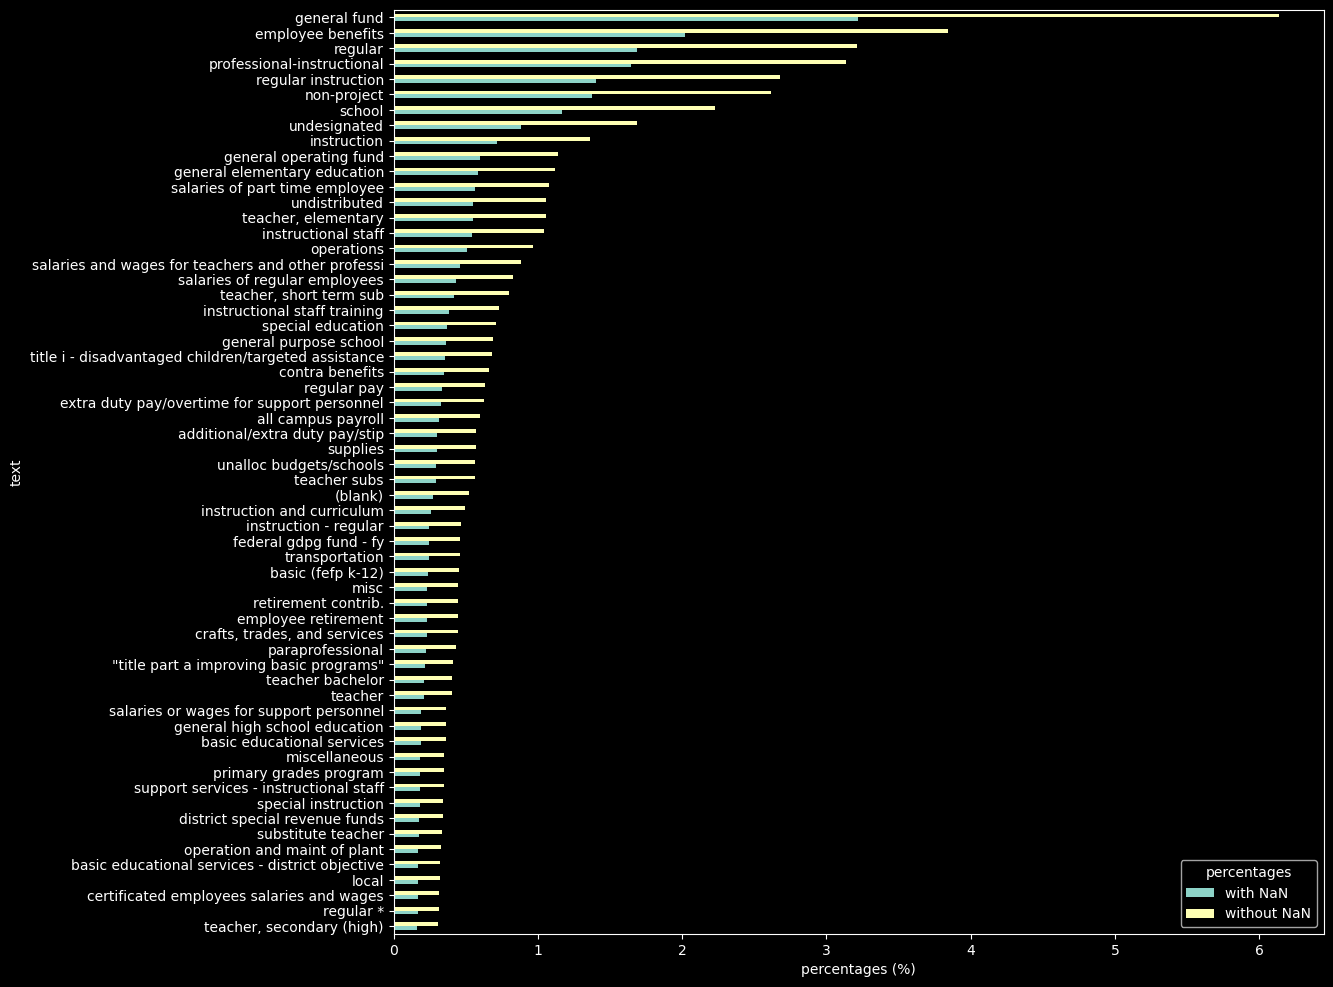

In [89]:
wwo_nan_cvcs = pd.concat({'with NaN': cvcs['% w/NaN'].drop('NaN'),
                          'without NaN': cvcs['% wo/NaN'].drop('NaN')},
                         axis=1, sort=True).sort_values(['with NaN', 'without NaN'])
wwo_nan_cvcs.index.name='text'
wwo_nan_cvcs.columns.name='percentages'
wwo_nan_cvcs.tail(60).plot(kind='barh', stacked=False, figsize=(12, 12))
plt.xlabel('percentages (%)')
plt.show()

In [90]:
# 249 texts represent 80% of the corpus
cvcs['Cumulated % wo/NaN'][lambda x: x <= 80].shape[0]

249

### N-Grams

In [91]:
from mcr.nlp import ngram_builder, combine_text_columns, SentenceTokenizer, token_count, WordTokenizer, tokenized_stopwords, ngram_plot

#### Top 50 sentences

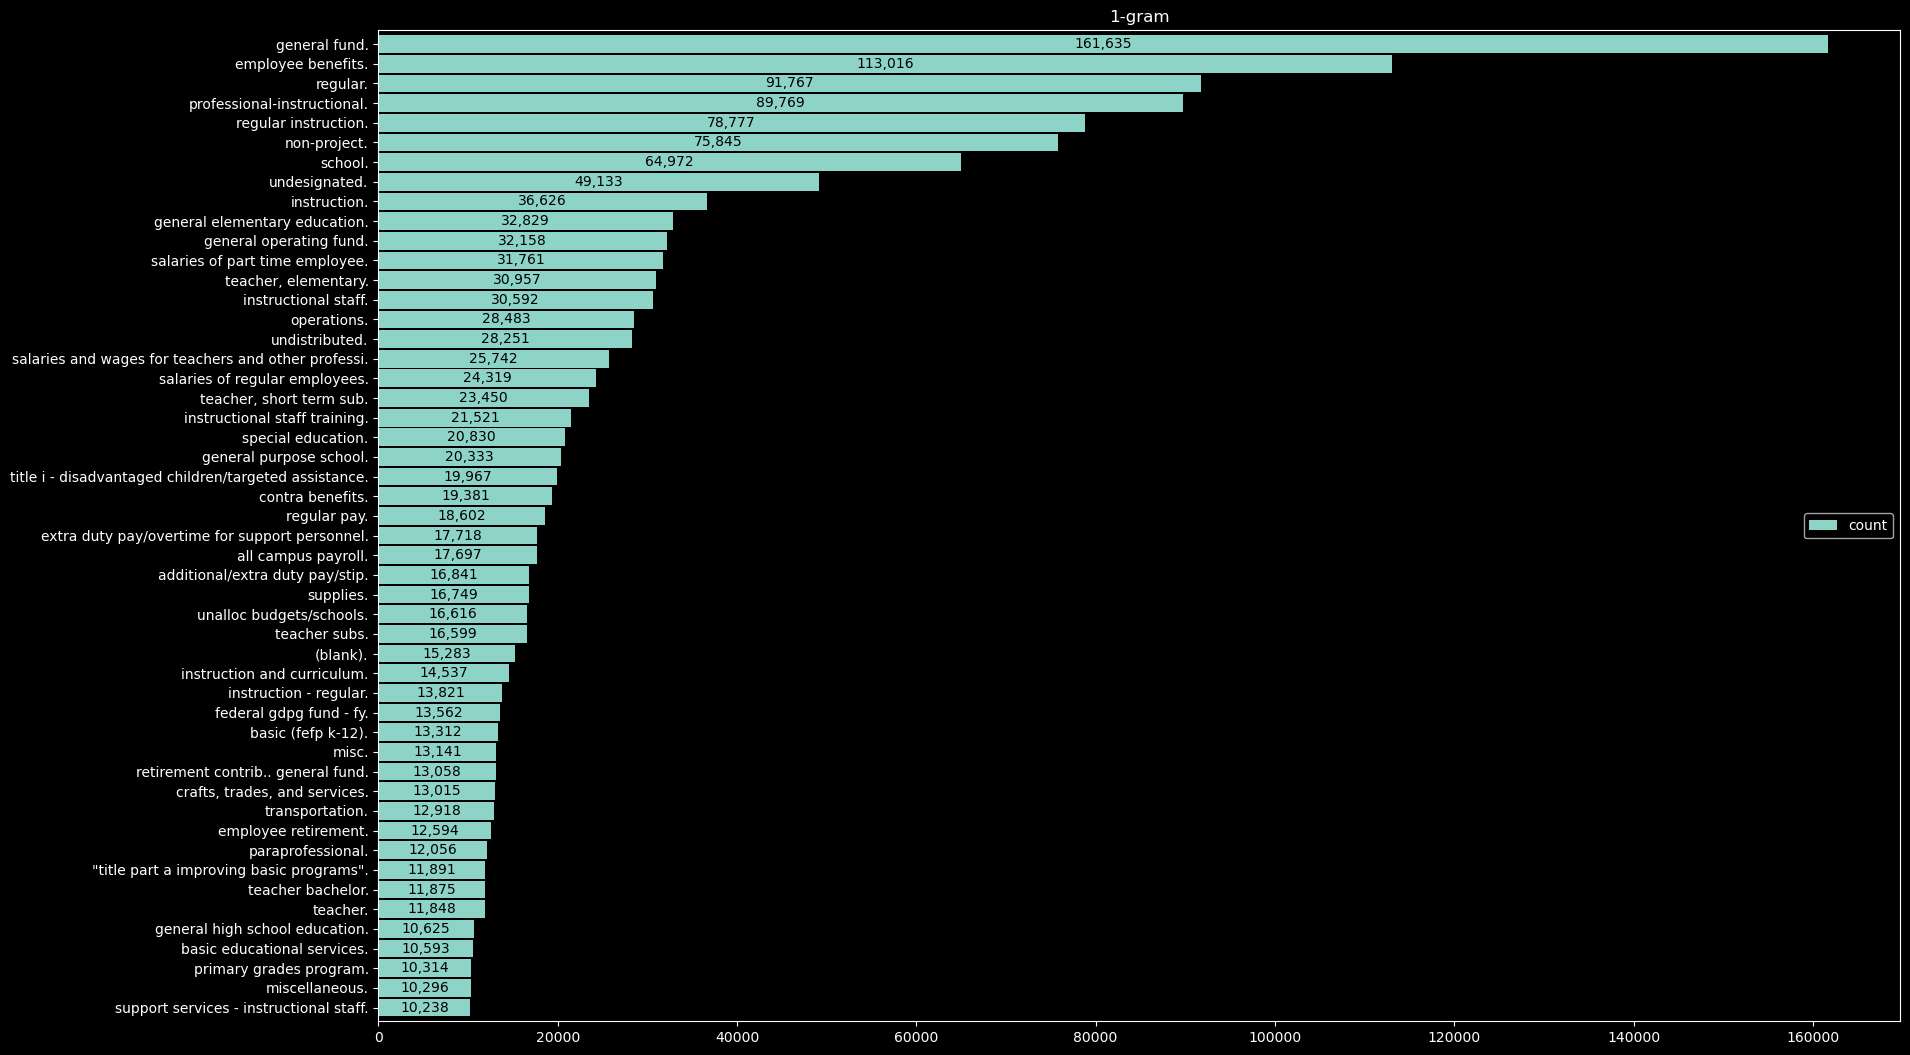

In [92]:
column_as_sentence = combine_text_columns(df[TEXT_FEATURES], sep='. ')
ngram_plot(ngram_builder(column_as_sentence, tokenizer=SentenceTokenizer(), max_features=50))

#### Top 50 words

In [93]:
# combining entire rows as a single sentence speedups the WordTokenizer and generates less copies
row_as_sentence = combine_text_columns(df[TEXT_FEATURES], sep=' ')

In [94]:
# 1001 tokens represent 99% of the corpus
word_ngrams = ngram_builder(row_as_sentence, tokenizer=WordTokenizer())
(word_ngrams['count'] / word_ngrams['count'].sum()).cumsum()[lambda x: x<=.99].shape[0]

1001

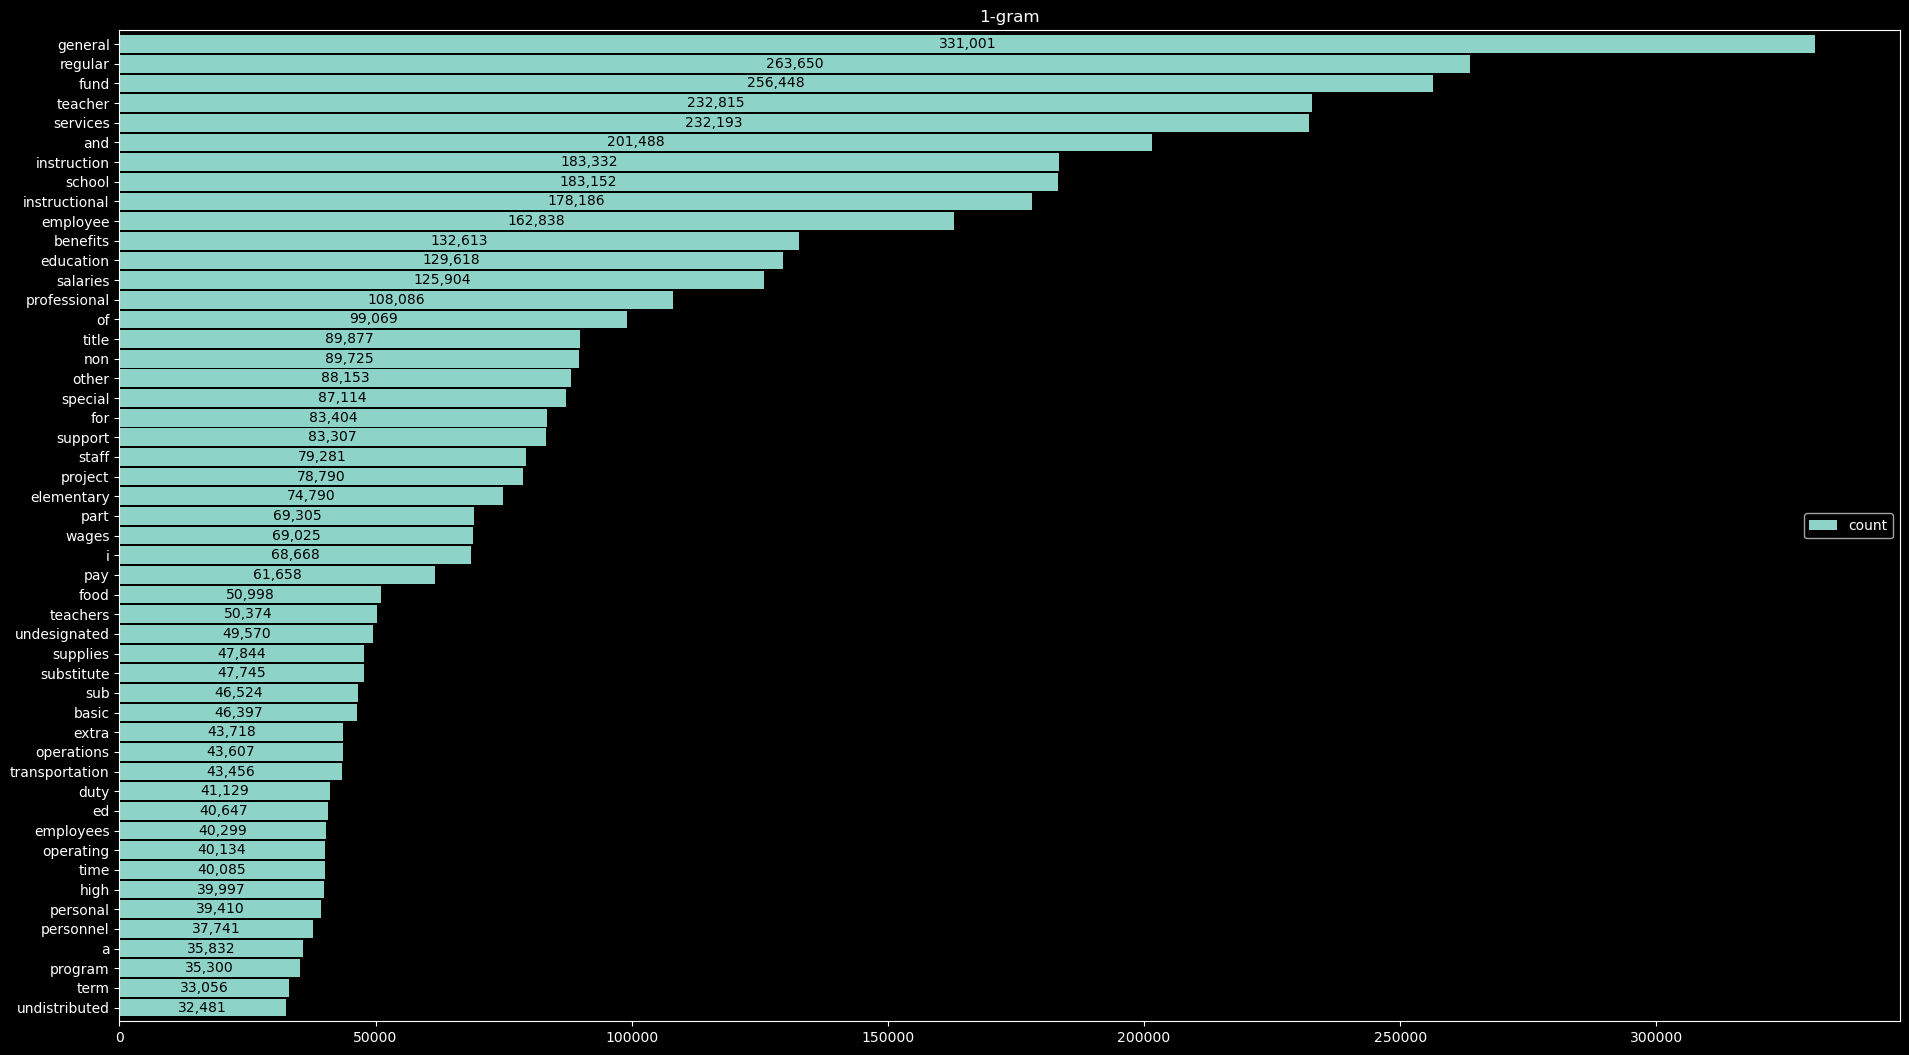

In [95]:
ngram_plot(ngram_builder(row_as_sentence, tokenizer=WordTokenizer(), max_features=50))

#### Top 50 words without stopwords

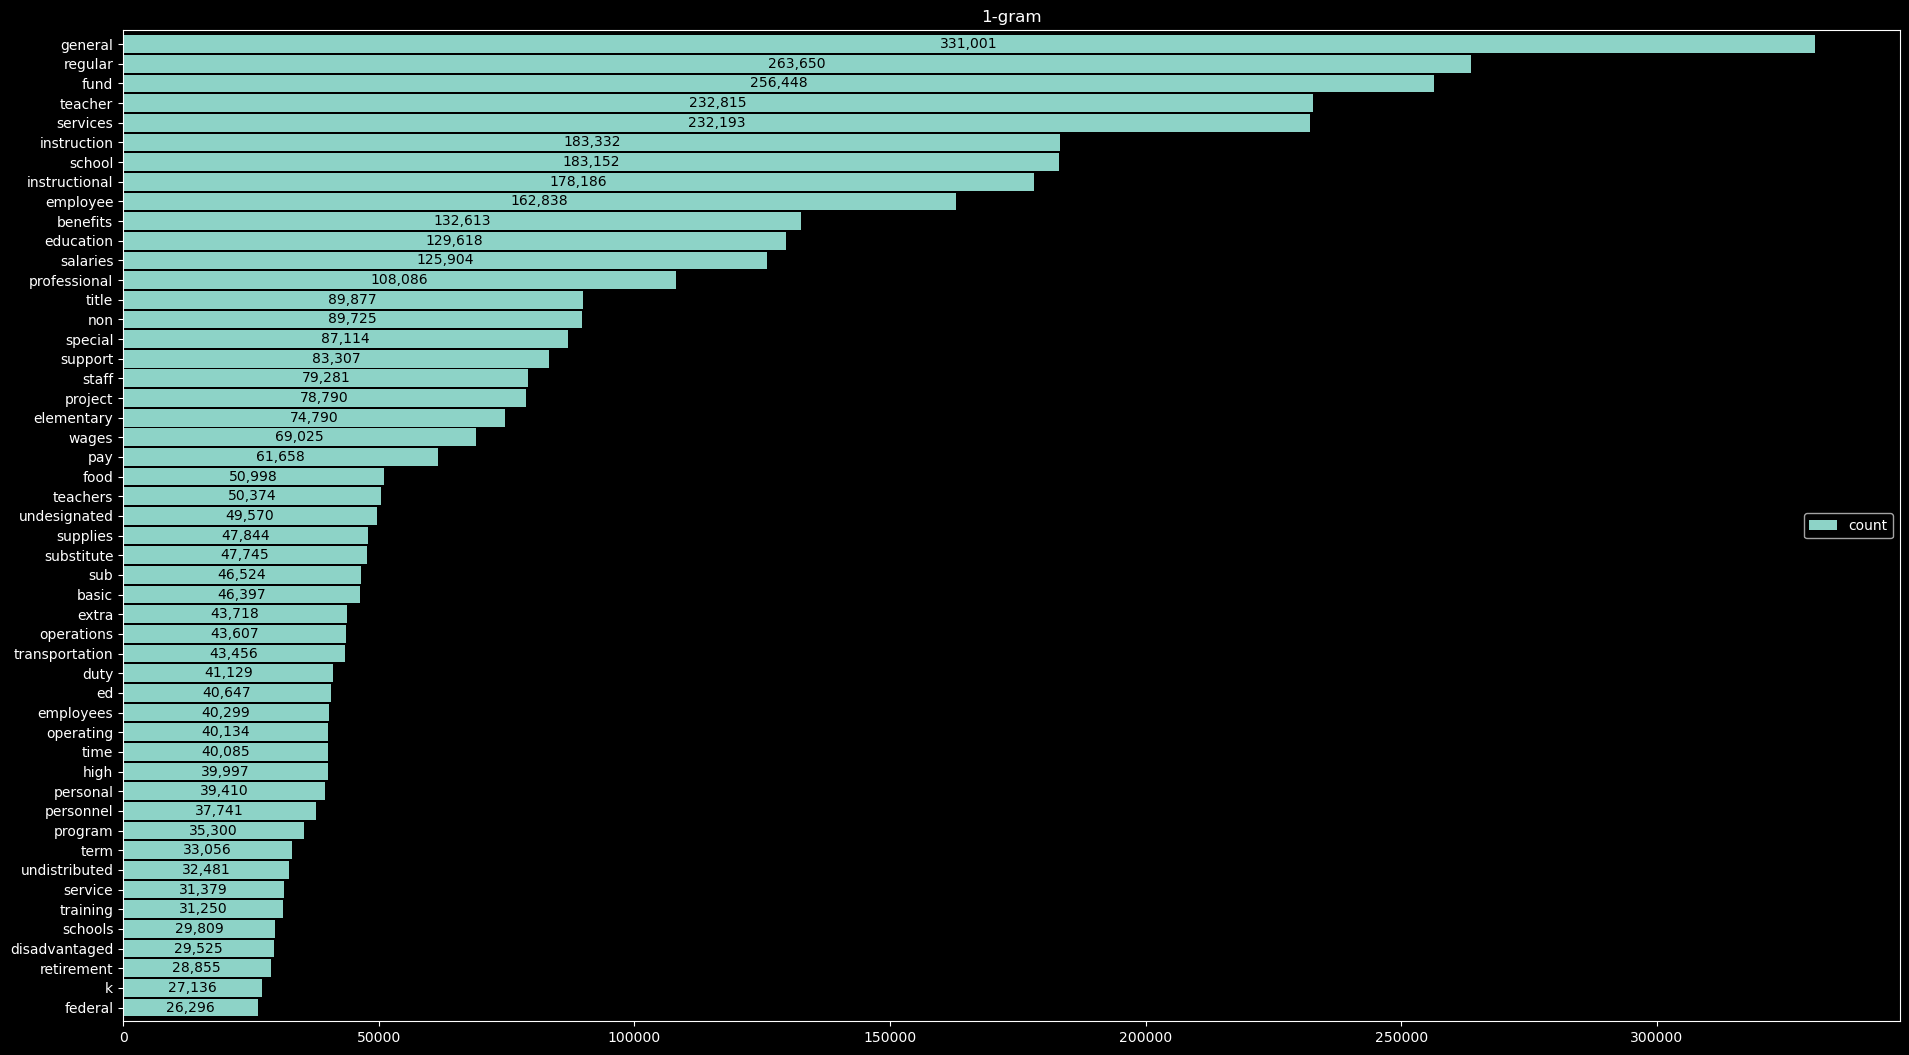

In [96]:
ngram_plot(ngram_builder(row_as_sentence, tokenizer=WordTokenizer(), max_features=50, stop_words=tokenized_stopwords()))

#### Comparison plot

**Sentence**

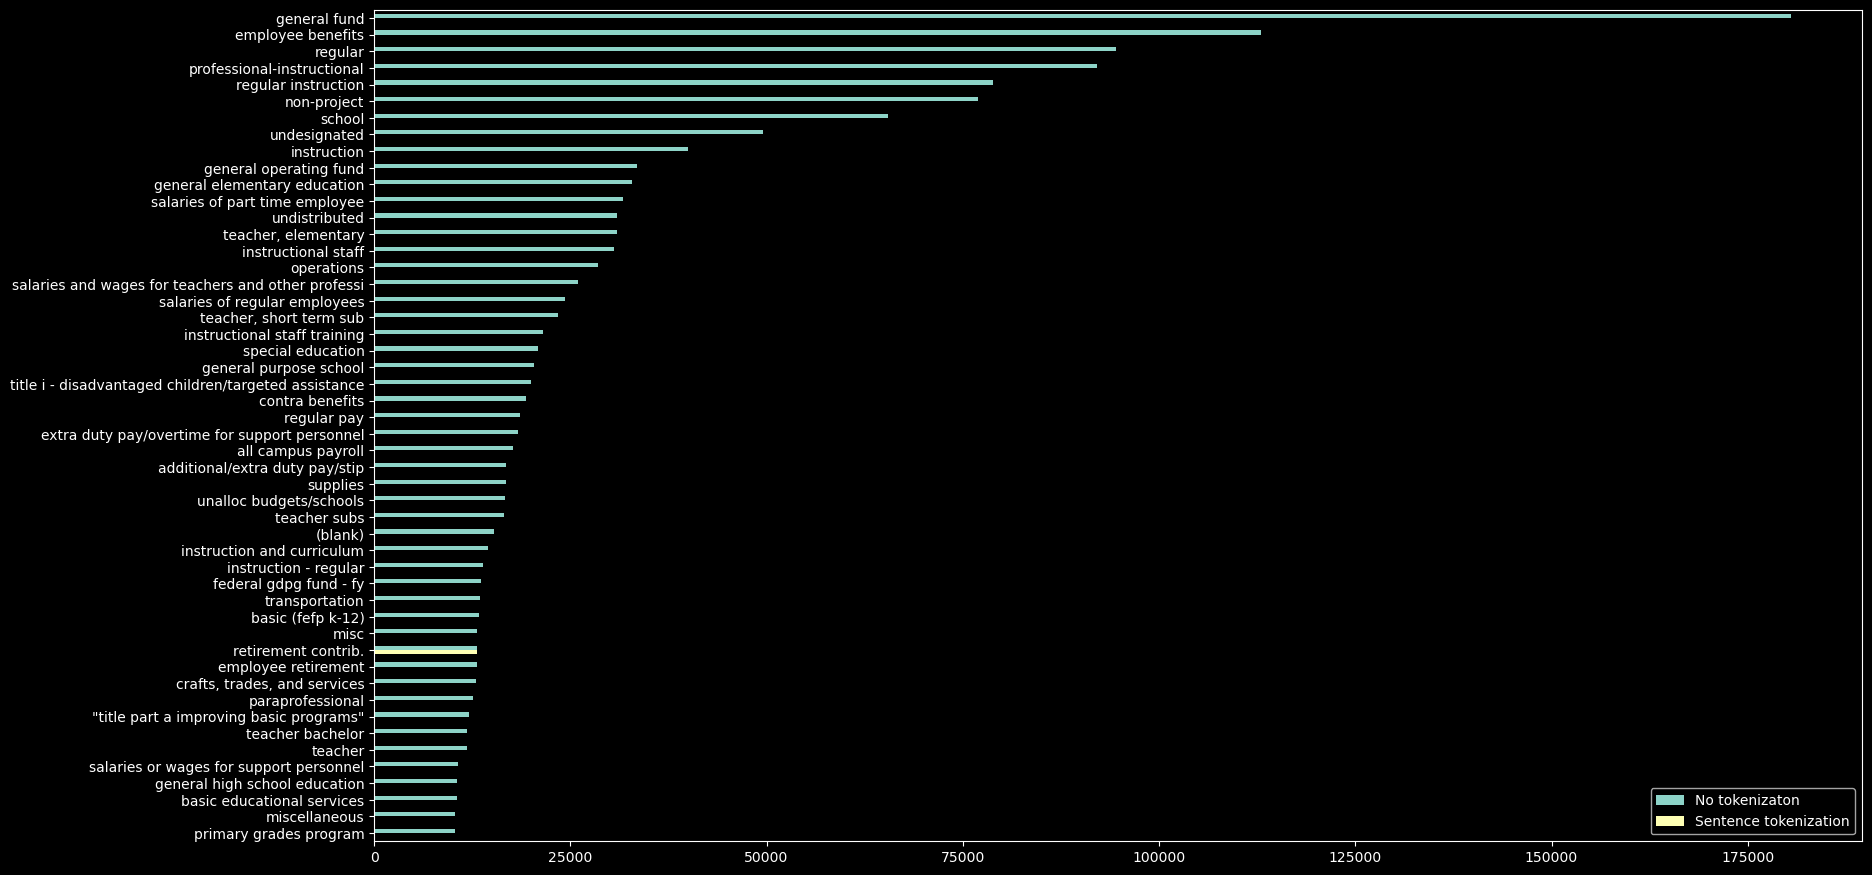

In [97]:
sentence_counts = token_count(row_as_sentence, tokenizer=SentenceTokenizer())
ax = pd.concat([
    cvcs.iloc[1:]['Ocurrences'].to_frame('No tokenizaton').rename_axis(None),
    pd.DataFrame(data=sentence_counts.values(), index=sentence_counts.keys(), columns=['Sentence tokenization']),
], axis=1).head(50).plot(kind='barh', figsize=(19.2,10.8))
ax.invert_yaxis()

**Word**

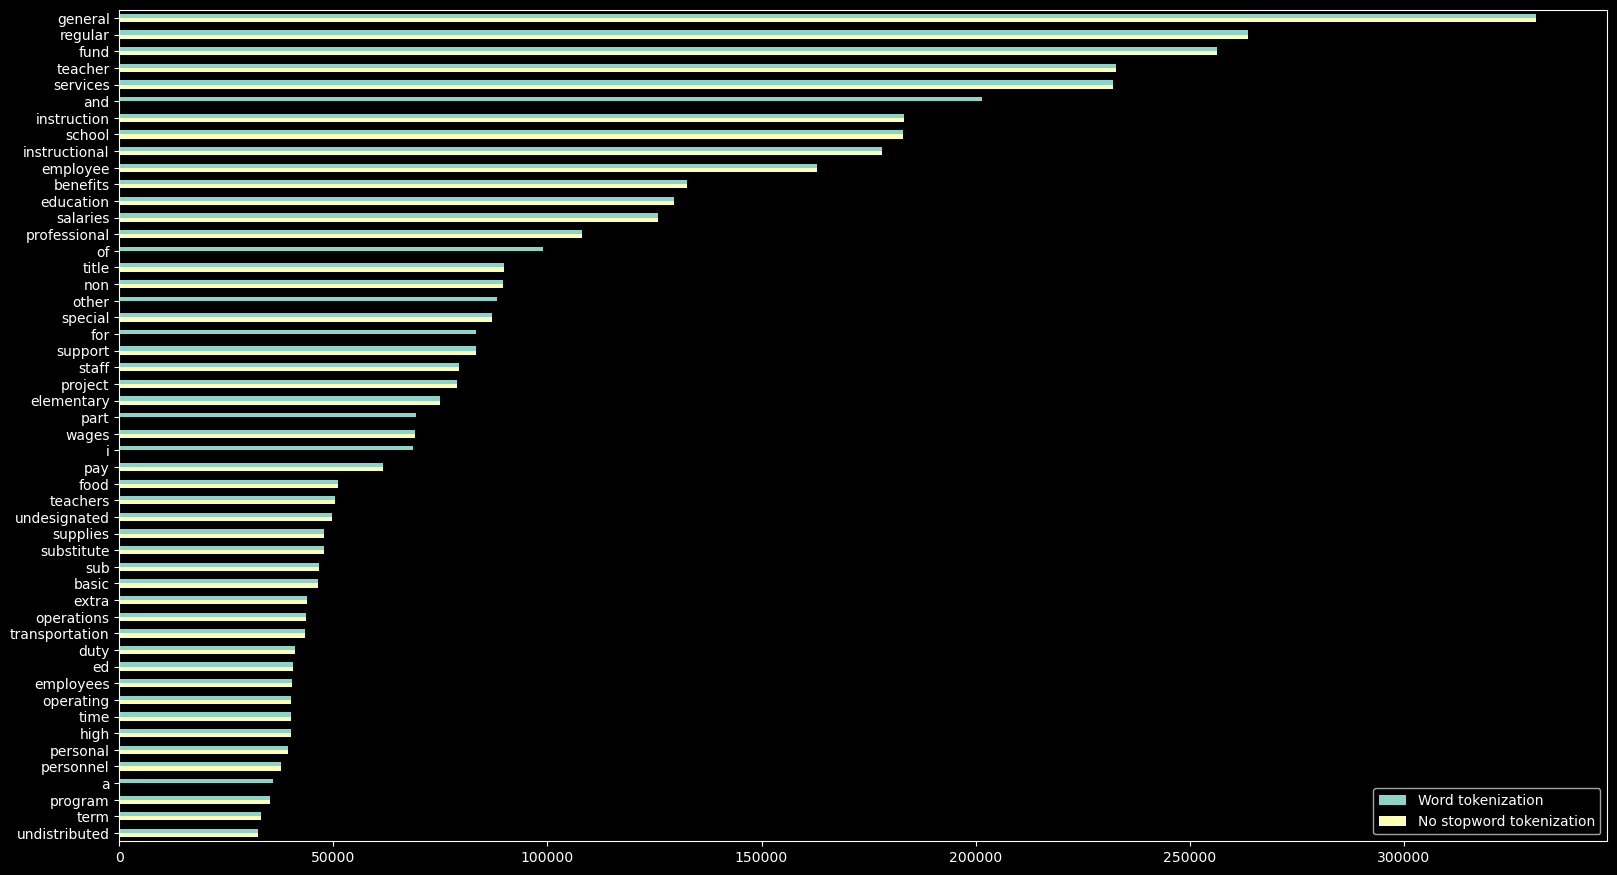

In [98]:
word_counts = token_count(row_as_sentence, tokenizer=WordTokenizer(), max_features=50)
nostopword_counts = token_count(row_as_sentence, tokenizer=WordTokenizer(), stop_words=tokenized_stopwords(), max_features=50)
ax = pd.concat([
    pd.DataFrame(data=word_counts.values(), index=word_counts.keys(), columns=['Word tokenization']),
    pd.DataFrame(data=nostopword_counts.values(), index=nostopword_counts.keys(), columns=['No stopword tokenization']),
], axis=1).head(50).plot(kind='barh', figsize=(19.2,10.8))
ax.invert_yaxis()

## Categorical variables

### Unique classes per label

In [99]:
num_unique_labels = df[LABELS].nunique()
num_unique_labels

Function            37
Object_Type         11
Operating_Status     3
Position_Type       25
Pre_K                3
Reporting            3
Sharing              5
Student_Type         9
Use                  8
dtype: int64

Total number of unique labels

In [100]:
num_unique_labels.sum()

104

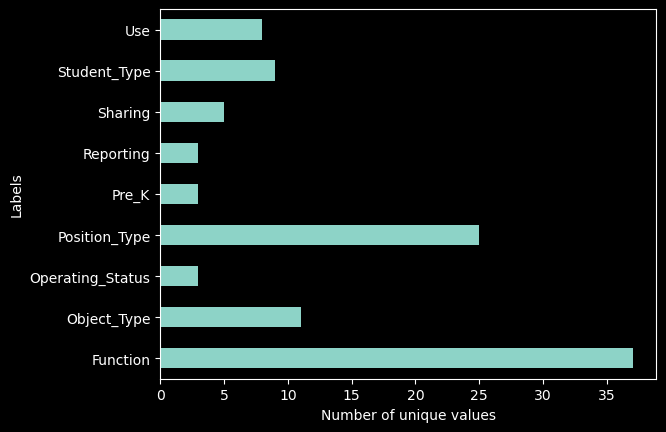

In [101]:
num_unique_labels.plot(kind='barh')
plt.xlabel('Number of unique values')
plt.ylabel('Labels')
plt.show()

### Encoding labels as categories to optimize memory and performance

In [102]:
#Converting label columns to category type
print('Memory before encoding: {:.1f} MB ({:.1f} MB deep)'.format(df.memory_usage().sum()/1024**2, df.memory_usage(deep=True).sum()/1024**2))
df[LABELS] = df[LABELS].apply(lambda x: x.astype('category'), axis=0)
print('Memory after encoding : {:.1f} MB ({:.1f} MB deep)'.format(df.memory_usage().sum()/1024**2, df.memory_usage(deep=True).sum()/1024**2))

Memory before encoding: 90.5 MB (559.6 MB deep)
Memory after encoding : 66.5 MB (324.1 MB deep)


### Combination of labels frequency

In [104]:
df[LABELS].value_counts().to_frame('value_counts')

value_counts
Function                   Object_Type                Operating_Status  Position_Type         Pre_K    Reporting  Sharing                 Student_Type Use                                      
NO_LABEL                   NO_LABEL                   Non-Operating     NO_LABEL              NO_LABEL NO_LABEL   NO_LABEL                NO_LABEL     NO_LABEL                            48034
Teacher Compensation       Benefits                   PreK-12 Operating Teacher               NO_LABEL School     School Reported         Unspecified  Instruction                         22169
Substitute Compensation    Base Salary/Compensation   PreK-12 Operating Substitute            NO_LABEL School     School Reported         Unspecified  Instruction                         16130
                           Benefits                   PreK-12 Operating Substitute            NO_LABEL School     School Reported         Unspecified  Instruction                         14110
Teacher Compensation       Base Salary/Compensation   PreK-12 Operating Teacher               NO_LABEL School     School Reported         Unspecified  Instruction                         13551
...                                                                                                                                                                                          ...
Physical Health & Services Other Compensation/Stipend PreK-12 Operating Non-Position          Non PreK Non-School Leadership & Management Unspecified  Pupil Services & Enrichment             1
                                                                        Instructional Coach   NO_LABEL Non-School Shared Services         Unspecified  Pupil Services & Enrichment             1
                                                                        Coordinator/Manager   NO_LABEL Non-School Shared Services         Unspecified  Pupil Services & Enrichment             1
                           NO_LABEL                   PreK-12 Operating Sec/Clerk/Other Admin NO_LABEL Non-School NO_LABEL                NO_LABEL     NO_LABEL                                1
Utilities                  Supplies/Materials         PreK-12 Operating Non-Position          NO_LABEL Non-School Shared Services         Unspecified  O&M                                     1

[5489 rows x 1 columns]

### Class frequency per label

In [139]:
cross_value_counts(df[LABELS]).style.format('{:,}').bar()

In [146]:
cross_value_counts_summary(df[LABELS]).style.format('{:,}').bar()

### Converting labels in dummy variables

Double underscore conventioned by the competition

In [124]:
# Converting labels in dummy variables
dummy_labels = pd.get_dummies(df[LABELS], prefix_sep='__')
dummy_labels

Function__Aides Compensation  Function__Career & Academic Counseling  \
134338                             0                                       0   
206341                             0                                       0   
326408                             0                                       0   
364634                             0                                       0   
47683                              0                                       0   
...                              ...                                     ...   
109283                             0                                       0   
102430                             0                                       0   
413949                             0                                       0   
433672                             0                                       0   
415831                             0                                       0   

        Function__Communications  Function__Curriculum Development  \
134338                         0                                 0   
206341                         0                                 0   
326408                         0                                 0   
364634                         0                                 0   
47683                          0                                 0   
...                          ...                               ...   
109283                         0                                 0   
102430                         0                                 0   
413949                         0                                 0   
433672                         0                                 0   
415831                         0                                 0   

        Function__Data Processing & Information Services  \
134338                                                 0   
206341                                                 0   
326408                                                 0   
364634                                                 0   
47683                                                  0   
...                                                  ...   
109283                                                 0   
102430                                                 0   
413949                                                 0   
433672                                                 0   
415831                                                 0   

        Function__Development & Fundraising  Function__Enrichment  \
134338                                    0                     0   
206341                                    0                     0   
326408                                    0                     0   
364634                                    0                     0   
47683                                     0                     0   
...                                     ...                   ...   
109283                                    0                     0   
102430                                    0                     0   
413949                                    0                     0   
433672                                    0                     0   
415831                                    0                     0   

        Function__Extended Time & Tutoring  \
134338                                   0   
206341                                   0   
326408                                   0   
364634                                   0   
47683                                    0   
...                                    ...   
109283                                   0   
102430                                   0   
413949                                   0   
433672                                   0   
415831                                   0   

        Function__Facilities & Maintenance  Function__Facilities Planning  \
134338                    

### Class count

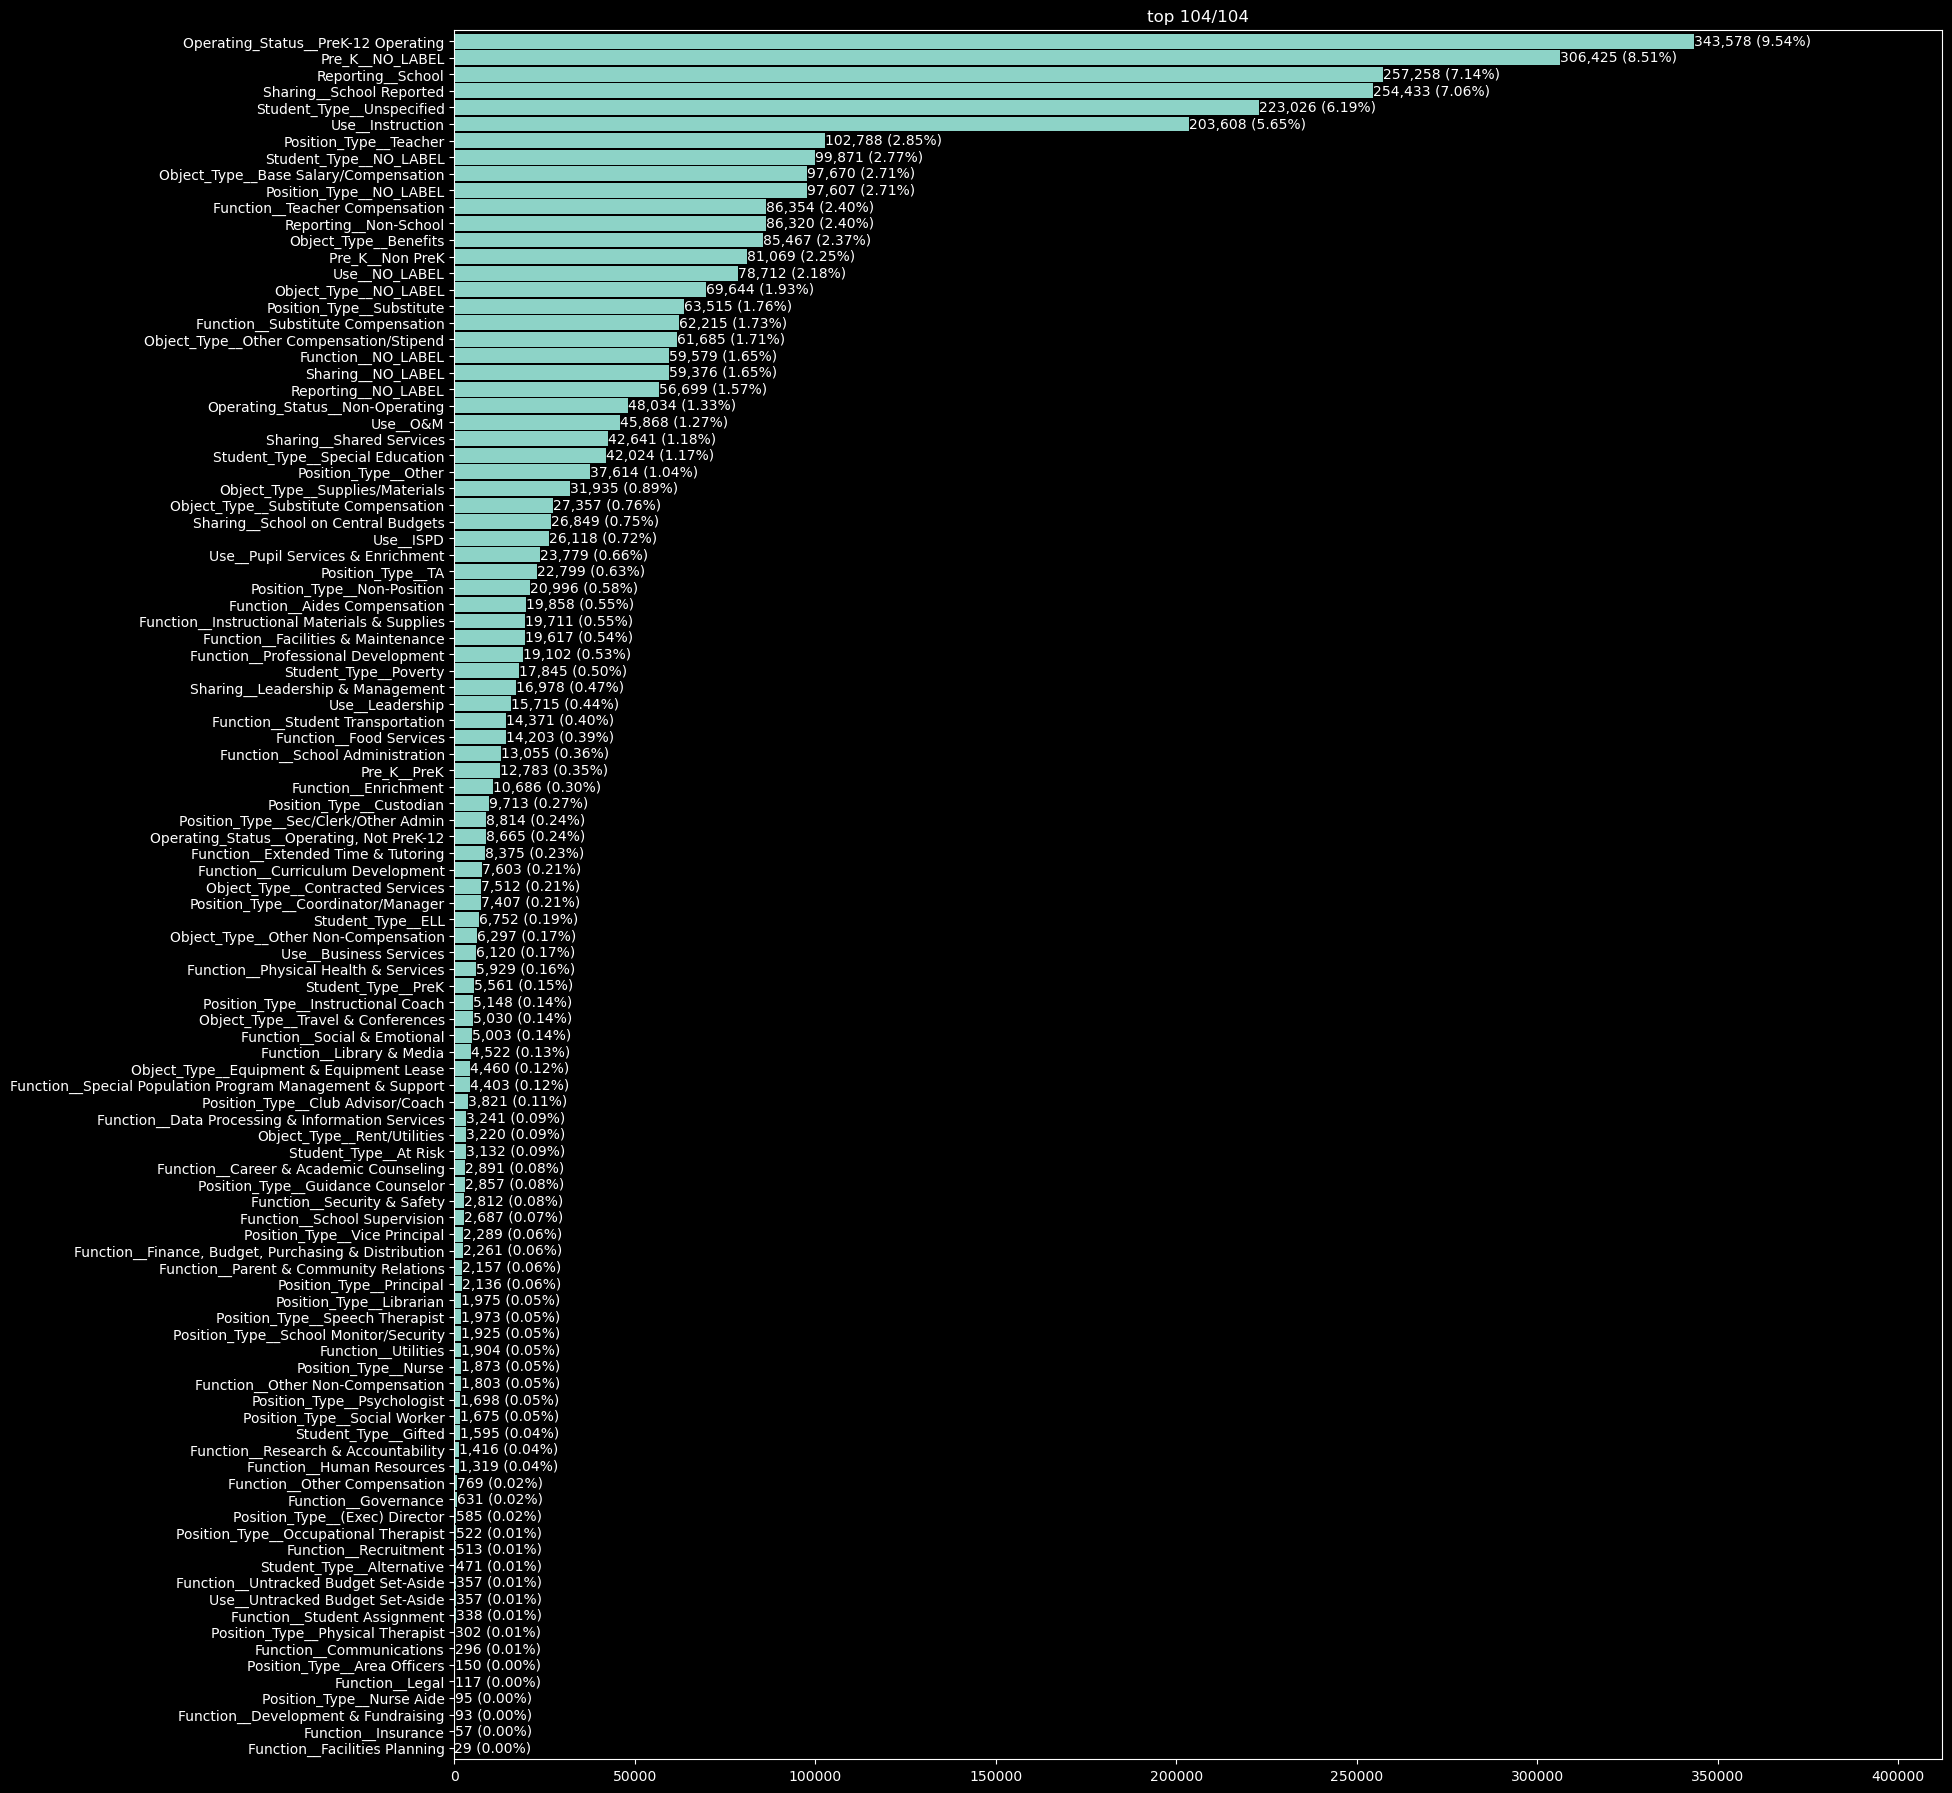

In [178]:
plot_counts(dummy_labels.sum(), min_frequency=1)

# Exploring holdout data

This holdout dataset has no labels due to the secrecy of the competition

In [108]:
holdout = pd.read_csv('/data/drivendata/TestData.csv', index_col=0, low_memory=False)
holdout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50064 entries, 180042 to 249087
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Object_Description      48330 non-null  object 
 1   Program_Description     44811 non-null  object 
 2   SubFund_Description     16111 non-null  object 
 3   Job_Title_Description   32317 non-null  object 
 4   Facility_or_Department  2839 non-null   object 
 5   Sub_Object_Description  33612 non-null  object 
 6   Location_Description    37316 non-null  object 
 7   FTE                     19605 non-null  float64
 8   Function_Description    46866 non-null  object 
 9   Position_Extra          13813 non-null  object 
 10  Text_4                  2814 non-null   object 
 11  Total                   49404 non-null  float64
 12  Text_2                  4641 non-null   object 
 13  Text_3                  5784 non-null   object 
 14  Fund_Description        39586 no

## Disambiguation of Total when having FTE

In [109]:
holdout[['FTE', 'Total', 'Total_FTE']] = disambiguate(holdout, 'FTE', 'Total')
holdout[NUMERIC_FEATURES]

FTE        Total     Total_FTE
180042   NaN  3999.910000           NaN
28872    NaN  3447.320213           NaN
186915  1.00          NaN  52738.780869
412396  1.00          NaN  69729.263191
427740  1.00          NaN  29492.834215
...      ...          ...           ...
169063  0.49          NaN   1542.840000
433255  0.50          NaN   9943.970000
232204  1.00          NaN  14674.360000
171685  0.50          NaN  11006.140000
249087  0.50          NaN  14434.350000

[50064 rows x 3 columns]

In [110]:
numeric_statistics(holdout)

count           mean           std           min          25%  \
FTE        19605       1.349004  8.468634e+01 -1.917398e-07      0.50000   
Total      31697   19603.748970  7.870683e+05 -2.370180e+06     96.24928   
Total_FTE  17707  107644.971964  8.668858e+06 -3.614359e-01  26257.11810   

                    50%           75%           max  missing  miss_ratio  \
FTE            1.000000      1.000000  1.185724e+04    30459    0.608401   
Total        708.997156   3000.120000  1.117399e+08    18367    0.366870   
Total_FTE  45797.151087  55692.674744  1.153578e+09    32357    0.646313   

                    sum         range    skewness      kurtosis           iqr  \
FTE        2.644721e+04  1.185724e+04  139.979137  19597.734159      0.500000   
Total      6.213800e+08  1.141100e+08  110.119126  14010.268042   2903.870720   
Total_FTE  1.906070e+09  1.153578e+09  133.064592  17706.456716  29435.556644   

             lo_outlier   hi_outlier  
FTE           -0.250000      1.75000  
Total      -4259.556800   7355.92608  
Total_FTE -17896.216867  99846.00971

## Missing data

Overall count and proportion of missing holdout features compared to missing training features:

In [111]:
missing = df[FEATURES].isnull()
missing_holdout = holdout.isnull()
pd.DataFrame({'dataset':  ['training', 'holdout'],
              'missing':    [missing.sum().sum(), missing_holdout.sum().sum()],
              'proportion': [missing.mean().mean(),
                             missing_holdout.mean().mean()]}).set_index('dataset')

missing  proportion
dataset                      
training  3342386    0.491187
holdout    437861    0.514472

**The proportion of missing data in the holdout set is bigger.**

Comparing missing feature heatmaps.  The columns of both datasets are ordered by the features of the training set with less missing data first. The idea is to compare some sort of missing proportion clusters.

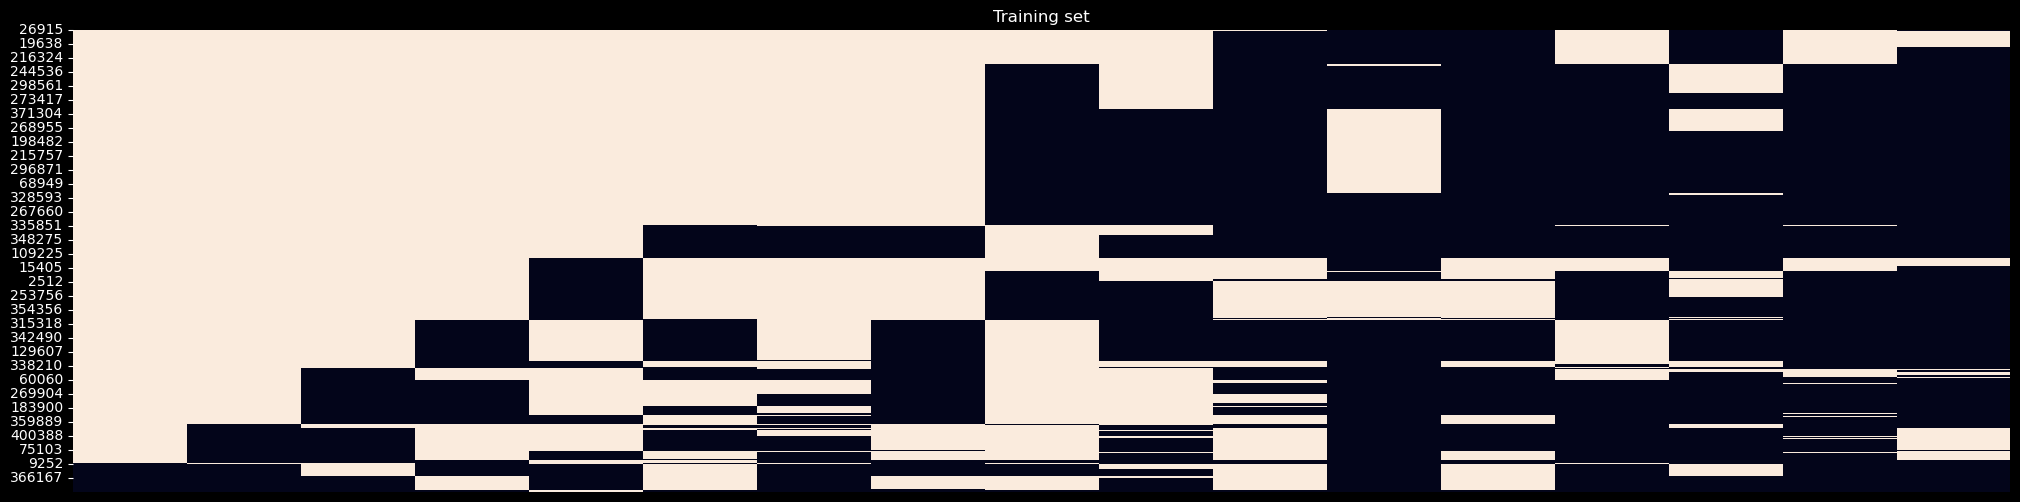

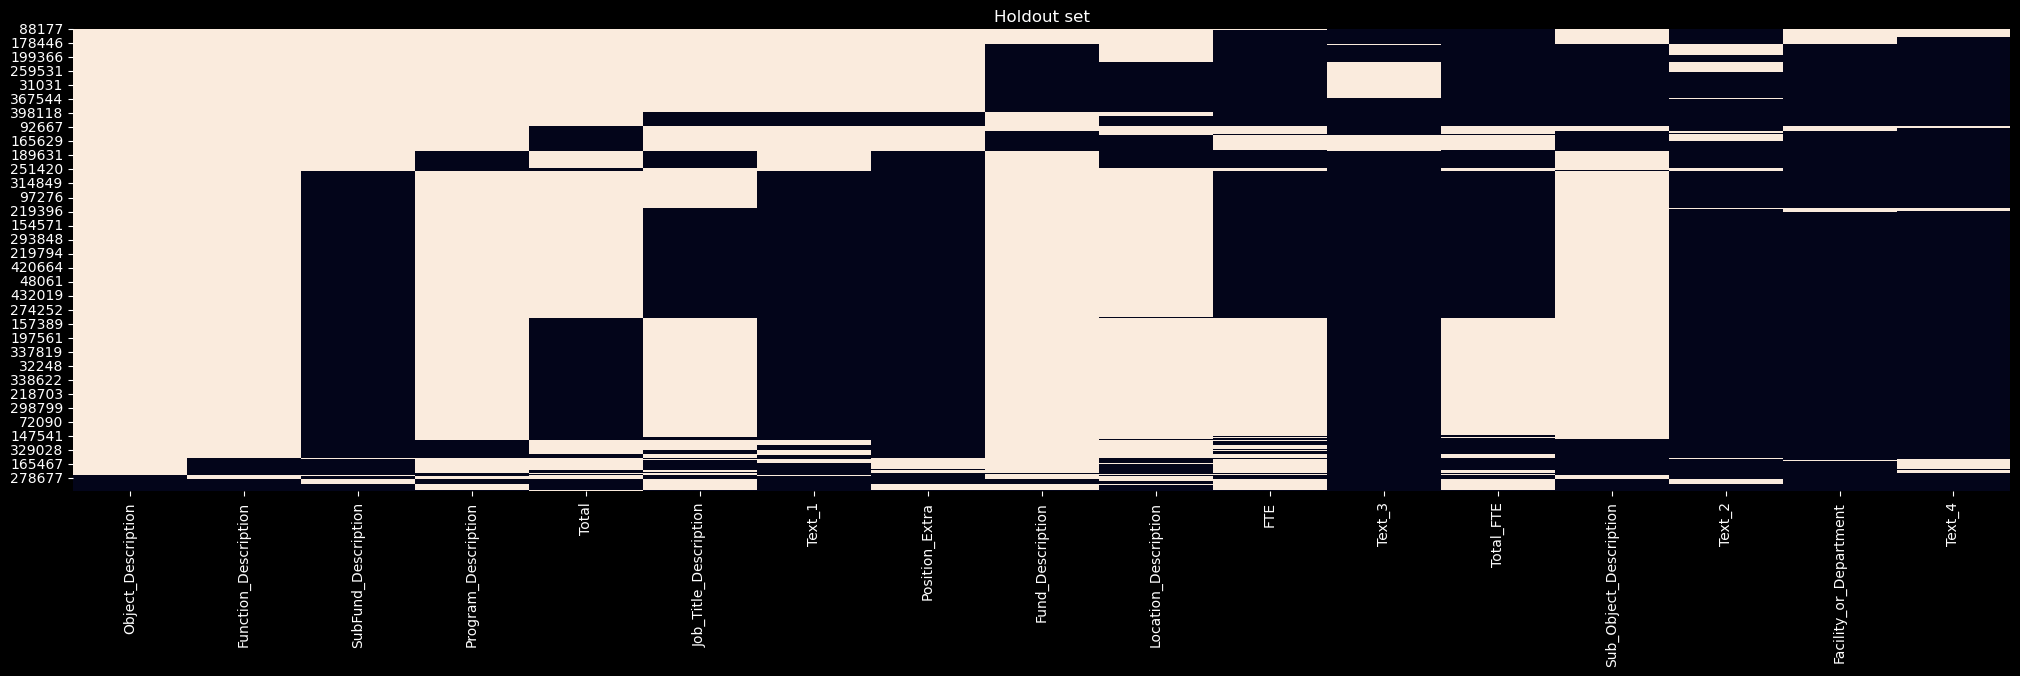

In [112]:
freq_col_order = missing.sum().sort_values().index.to_list()
plt.figure(figsize=(25,6))
sns.heatmap(~missing.loc[: , # missing.sum(axis=1).sort_values().index.to_list(),
    freq_col_order].sort_values(freq_col_order), cbar=False, xticklabels=False)
plt.title('Training set')
plt.figure(figsize=(25,6))
sns.heatmap(~missing_holdout.loc[:, # missing_holdout.sum(axis=1).sort_values().index.to_list(),
    freq_col_order].sort_values(freq_col_order), cbar=False)
plt.title('Holdout set')
plt.show()

Comparing the heatmaps became suspect that the holdout dataset is not just a fair random sample because it's missing data pattern differs a lot from the training dataset.

Some missing value areas are proportionally bigger in the holdout set, which is confirmed by the missing ratio which differs a lot.

In [113]:
(holdout.isnull().mean() / df[FEATURES].isnull().mean()).sort_values(ascending=False)

SubFund_Description       2.905789
Text_1                    2.568016
Position_Extra            2.138819
Total                     1.498024
Job_Title_Description     1.319515
Text_3                    1.216083
Text_2                    1.163785
Text_4                    1.090171
Facility_or_Department    1.090035
FTE                       0.888124
Total_FTE                 0.843226
Object_Description        0.559388
Function_Description      0.440222
Program_Description       0.439246
Location_Description      0.427852
Sub_Object_Description    0.426141
Fund_Description          0.424391
dtype: float64

## `FTE` univariate analysis

In [114]:
holdout.FTE.describe()

count    1.960500e+04
mean     1.349004e+00
std      8.468634e+01
min     -1.917398e-07
25%      5.000000e-01
50%      1.000000e+00
75%      1.000000e+00
max      1.185724e+04
Name: FTE, dtype: float64

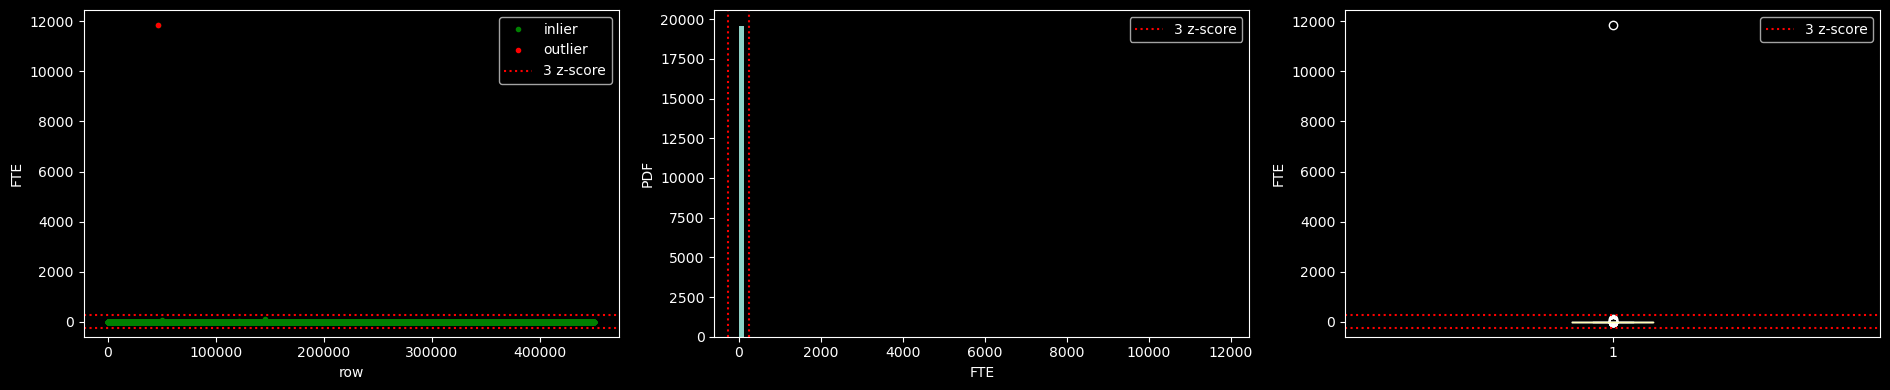

Upper outliers: 1
Lower outliers: 0


In [115]:
density_plots(holdout.FTE, bins=100)
zscores = zscore(holdout.FTE, nan_policy='omit')
print('Upper outliers:', sum(zscores > 3))
print('Lower outliers:', sum(zscores < -3))

It's suspicious how the holdout set has only one `FTE` outlier with a value never seen so high in the whole training set: near `11857.24`, while the max `FTE` in training set is `46.8`.

This specific outlier has no textual data.

In [116]:
holdout[holdout.FTE == holdout.FTE.max()].transpose()

46063
Object_Description                NaN
Program_Description               NaN
SubFund_Description               NaN
Job_Title_Description             NaN
Facility_or_Department            NaN
Sub_Object_Description            NaN
Location_Description              NaN
FTE                       11857.24475
Function_Description              NaN
Position_Extra                    NaN
Text_4                            NaN
Total                             NaN
Text_2                            NaN
Text_3                            NaN
Fund_Description                  NaN
Text_1                            NaN
Total_FTE               1153578234.84

Searching for holdout observations with no textual data: There are 116 other holdout observations without textual data.

In [117]:
holdout.loc[holdout[TEXT_FEATURES].isnull().all(axis=1), NUMERIC_FEATURES].sort_values(['FTE', 'Total'], ascending=False)

FTE     Total     Total_FTE
46063   11857.24475       NaN  1.153578e+09
45795           NaN  36483.49           NaN
156857          NaN  29225.60           NaN
47394           NaN  15943.17           NaN
312570          NaN  15160.44           NaN
...             ...       ...           ...
354927          NaN     41.99           NaN
103425          NaN     18.91           NaN
71261           NaN       NaN           NaN
230738          NaN       NaN           NaN
297095          NaN       NaN           NaN

[116 rows x 3 columns]

Searching for training observations with no textual data: There are 1874 other training observations without textual data.

In [118]:
df.loc[df[TEXT_FEATURES].isnull().all(axis=1), LABELS+NUMERIC_FEATURES].sort_values(['FTE', 'Total'], ascending=False)

Function              Object_Type   Operating_Status  \
108731  Substitute Compensation  Substitute Compensation  PreK-12 Operating   
205873  Substitute Compensation  Substitute Compensation  PreK-12 Operating   
105293  Substitute Compensation  Substitute Compensation  PreK-12 Operating   
36835   Substitute Compensation  Substitute Compensation  PreK-12 Operating   
350915  Substitute Compensation  Substitute Compensation  PreK-12 Operating   
...                         ...                      ...                ...   
314104  Substitute Compensation  Substitute Compensation  PreK-12 Operating   
276236  Substitute Compensation  Substitute Compensation  PreK-12 Operating   
196727  Substitute Compensation  Substitute Compensation  PreK-12 Operating   
266312  Substitute Compensation  Substitute Compensation  PreK-12 Operating   
50702   Substitute Compensation  Substitute Compensation  PreK-12 Operating   

       Position_Type     Pre_K   Reporting   Sharing Student_Type  \
108731    Substitute  NO_LABEL  Non-School  NO_LABEL     NO_LABEL   
205873    Substitute  NO_LABEL  Non-School  NO_LABEL     NO_LABEL   
105293    Substitute  NO_LABEL  Non-School  NO_LABEL     NO_LABEL   
36835     Substitute  NO_LABEL  Non-School  NO_LABEL     NO_LABEL   
350915    Substitute  NO_LABEL  Non-School  NO_LABEL     NO_LABEL   
...              ...       ...         ...       ...          ...   
314104    Substitute  NO_LABEL  Non-School  NO_LABEL     NO_LABEL   
276236    Substitute  NO_LABEL  Non-School  NO_LABEL     NO_LABEL   
196727    Substitute  NO_LABEL  Non-School  NO_LABEL     NO_LABEL   
266312    Substitute  NO_LABEL  Non-School  NO_LABEL     NO_LABEL   
50702     Substitute  NO_LABEL  Non-School  NO_LABEL     NO_LABEL   

                Use  FTE     Total  Total_FTE  
108731  Instruction  NaN  48876.09        NaN  
205873  Instruction  NaN  37433.31        NaN  
105293  Instruction  NaN  35955.32        NaN  
36835   Instruction  NaN  32213.99        NaN  
350915  Instruction  NaN  31920.97        NaN  
...             ...  ...       ...        ...  
314104  Instruction  NaN       NaN        NaN  
276236  Instruction  NaN       NaN        NaN  
196727  Instruction  NaN       NaN        NaN  
266312  Instruction  NaN       NaN        NaN  
50702   Instruction  NaN       NaN        NaN  

[1874 rows x 12 columns]

Stats of training observations with no textual, data grouped by labels

In [119]:
df.loc[df[TEXT_FEATURES].isnull().all(axis=1), LABELS+NUMERIC_FEATURES].sort_values(['FTE', 'Total'], ascending=False)\
    .groupby(LABELS, observed=True).agg(['count', 'sum'])#.to_frame('count')

FTE  \
                                                                                                                                             count   
Function                Object_Type             Operating_Status  Position_Type Pre_K    Reporting  Sharing         Student_Type Use                 
Substitute Compensation Substitute Compensation PreK-12 Operating Substitute    NO_LABEL Non-School NO_LABEL        NO_LABEL     Instruction     0   
                                                                                         School     School Reported NO_LABEL     Instruction     0   
NO_LABEL                Substitute Compensation PreK-12 Operating Substitute    NO_LABEL Non-School NO_LABEL        NO_LABEL     NO_LABEL        0   
                        NO_LABEL                Non-Operating     NO_LABEL      NO_LABEL NO_LABEL   NO_LABEL        NO_LABEL     NO_LABEL        0   

                                                                                                                                                   \
                                                                                                                                              sum   
Function                Object_Type             Operating_Status  Position_Type Pre_K    Reporting  Sharing         Student_Type Use                
Substitute Compensation Substitute Compensation PreK-12 Operating Substitute    NO_LABEL Non-School NO_LABEL        NO_LABEL     Instruction  0.0   
                                                                                         School     School Reported NO_LABEL     Instruction  0.0   
NO_LABEL                Substitute Compensation PreK-12 Operating Substitute    NO_LABEL Non-School NO_LABEL        NO_LABEL     NO_LABEL     0.0   
                        NO_LABEL                Non-Operating     NO_LABEL      NO_LABEL NO_LABEL   NO_LABEL        NO_LABEL     NO_LABEL     0.0   

                                                                                                                                             Total  \
                                                                                                                                             count   
Function                Object_Type             Operating_Status  Position_Type Pre_K    Reporting  Sharing         Student_Type Use                 
Substitute Compensation Substitute Compensation PreK-12 Operating Substitute    NO_LABEL Non-School NO_LABEL        NO_LABEL     Instruction  1727   
                                                                                         School     School Reported NO_LABEL     Instruction   131   
NO_LABEL                Substitute Compensation PreK-12 Operating Substitute    NO_LABEL Non-School NO_LABEL        NO_LABEL     NO_LABEL        1   
                        NO_LABEL                Non-Operating     NO_LABEL      NO_LABEL NO_LABEL   NO_LABEL        NO_LABEL     NO_LABEL        0   

                                                                                                                                                          \
                                                                                                                                                     sum   
Function                Object_Type             Operating_Status  Position_Type Pre_K    Reporting  Sharing         Student_Type Use                       
Substitute Compensation Substitute Compensation PreK-12 Operating Substitute    NO_LABEL Non-School NO_LABEL        NO_LABEL     Instruction  9048461.73   
                                                                                         School     School Reported NO_LABEL     Instruction   376272.11   
NO_LABEL                Substitute Compensation PreK-12 Operating Substitute    NO_LABEL Non-School NO_LABEL        NO_LABEL     NO_LABEL         210.76   
                        NO_LABEL                Non-Operating

## `Total_FTE` univariate analysis

In [120]:
holdout.Total_FTE.describe()

count    1.770700e+04
mean     1.076450e+05
std      8.668858e+06
min     -3.614359e-01
25%      2.625712e+04
50%      4.579715e+04
75%      5.569267e+04
max      1.153578e+09
Name: Total_FTE, dtype: float64

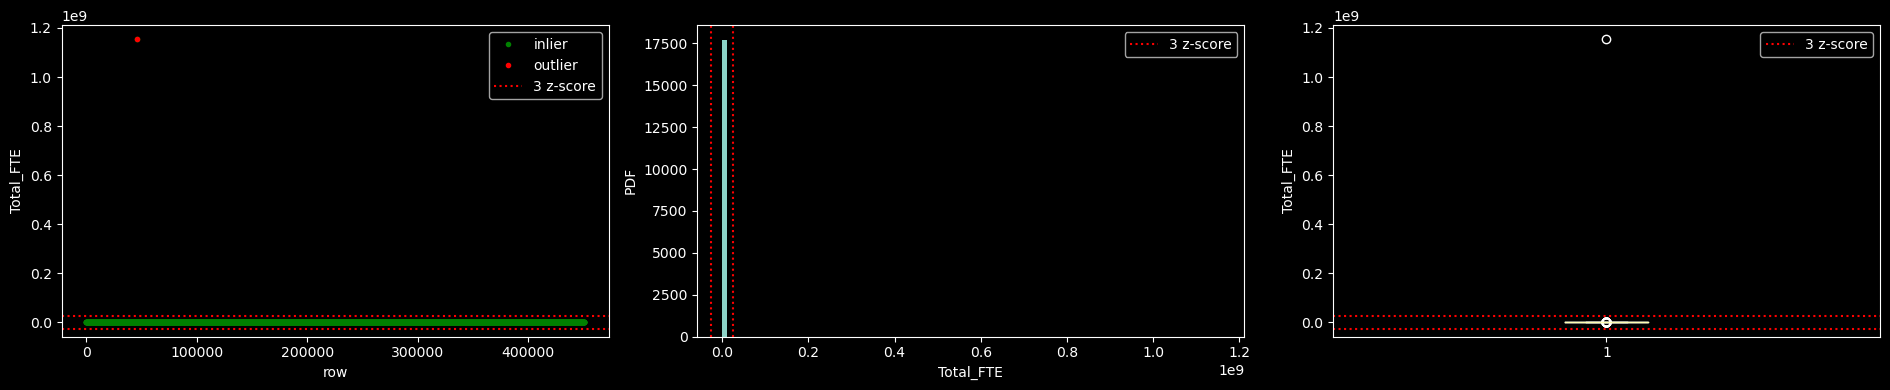

Upper outliers: 1
Lower outliers: 0


In [121]:
density_plots(holdout.Total_FTE, bins=100)
zscores = zscore(holdout.Total_FTE, nan_policy='omit')
print('Upper outliers:', sum(zscores > 3))
print('Lower outliers:', sum(zscores < -3))

It's suspicious how the holdout set has a huge Total outlier close to 1.2 billion while the max in training is 129 million and in fact, this `Total` outlier is the same as the `FTE` outlier.

The highest outlier has not textual data.

In [122]:
holdout[(zscores < -3) | (zscores > 3)].transpose()

46063
Object_Description                NaN
Program_Description               NaN
SubFund_Description               NaN
Job_Title_Description             NaN
Facility_or_Department            NaN
Sub_Object_Description            NaN
Location_Description              NaN
FTE                       11857.24475
Function_Description              NaN
Position_Extra                    NaN
Text_4                            NaN
Total                             NaN
Text_2                            NaN
Text_3                            NaN
Fund_Description                  NaN
Text_1                            NaN
Total_FTE               1153578234.84

## `Total` univariate analysis

In [123]:
holdout.Total.describe()

count    3.169700e+04
mean     1.960375e+04
std      7.870683e+05
min     -2.370180e+06
25%      9.624928e+01
50%      7.089972e+02
75%      3.000120e+03
max      1.117399e+08
Name: Total, dtype: float64

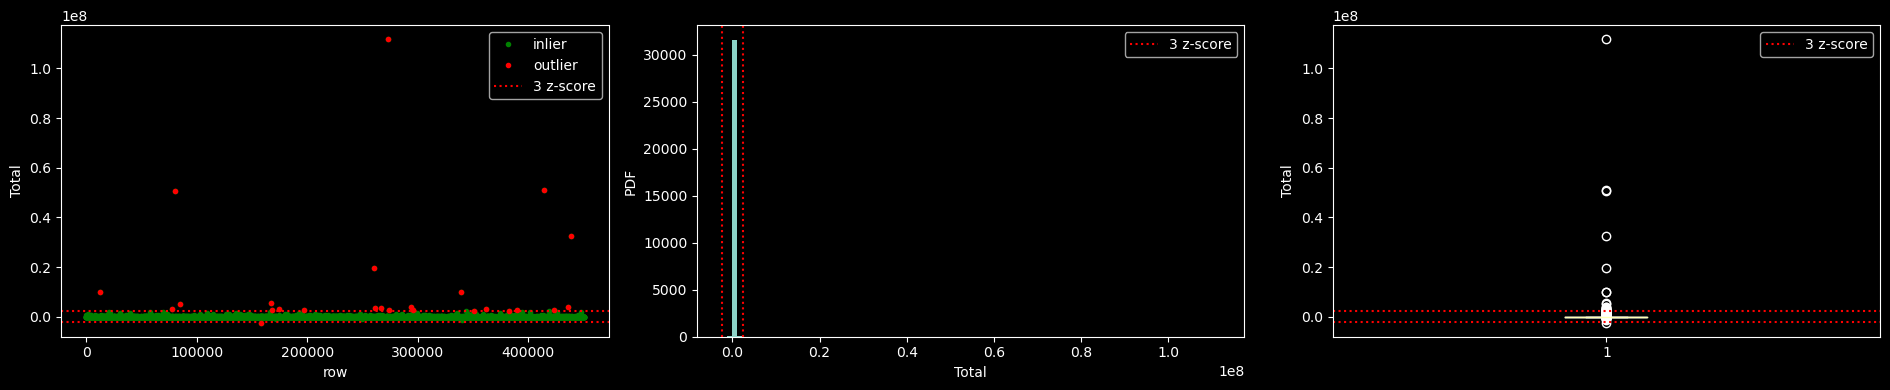

Upper outliers: 24
Lower outliers: 1


In [124]:
density_plots(holdout.Total, bins=100)
zscores = zscore(holdout.Total, nan_policy='omit')
print('Upper outliers:', sum(zscores > 3))
print('Lower outliers:', sum(zscores < -3))

It's suspicious how the holdout set has a huge Total outlier close to 1.2 billion while the max in training is 129 million and in fact, this `Total` outlier is the same as the `FTE` outlier.

The highest outlier has not textual data.

In [125]:
holdout[(zscores < -3) | (zscores > 3)].transpose()

293744  \
Object_Description            Tax Appraisal & Collection   
Program_Description                        Undistributed   
SubFund_Description                                  NaN   
Job_Title_Description                                NaN   
Facility_or_Department                               NaN   
Sub_Object_Description           Property Appraisal Srvc   
Location_Description                     Tax Collections   
FTE                                                  NaN   
Function_Description    Other Intergovernmental Charges    
Position_Extra                                       NaN   
Text_4                                               NaN   
Total                                         3962545.67   
Text_2                                               NaN   
Text_3                                               NaN   
Fund_Description                            General Fund   
Text_1                                               NaN   
Total_FTE                                            NaN   

                                            273904                  197099  \
Object_Description           Professional Salaries  Gasoline & Other Fuels   
Program_Description     Basic Educational Services           Undistributed   
SubFund_Description                            NaN                     NaN   
Job_Title_Description                          NaN                     NaN   
Facility_or_Department                         NaN                     NaN   
Sub_Object_Description                     General                 General   
Location_Description       Unallocated Cost Budget   Transportation Office   
FTE                                            NaN                     NaN   
Function_Description                   Instruction  Student Transportation   
Position_Extra                                 NaN                     NaN   
Text_4                                         NaN                     NaN   
Total                                   2625389.75              2499999.99   
Text_2                                         NaN                     NaN   
Text_3                                         NaN                     NaN   
Fund_Description                      General Fund            General Fund   
Text_1                                         NaN                     NaN   
Total_FTE                                      NaN                     NaN   

                                                                                        78059   \
Object_Description                                                             Federal Revenue   
Program_Description                                                                        NaN   
SubFund_Description                                                                        NaN   
Job_Title_Description                                                                      NaN   
Facility_or_Department                                                                     NaN   
Sub_Object_Description                                                                 General   
Location_Description                                                                       NaN   
FTE                                                                                        NaN   
Function_Description                                                             Miscellaneous   
Position_Extra                                                                             NaN   
Text_4                                                                                     NaN   
Total                                                                               3225847.03   
Text_2                                                                                     NaN   
Text_3                                                                                     NaN   
Fund_Description        ESEA, Title II, Part A - Teacher and Principal Training and Recruiting

## Regression and correlation by imputation strategy

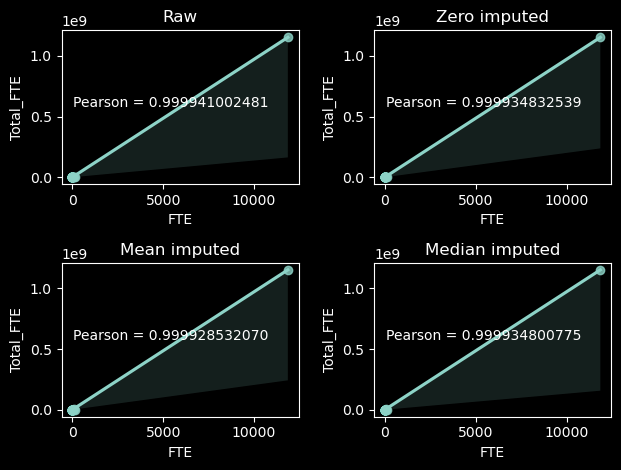

In [126]:
plot_regression_correlation_imputation(holdout, 'FTE', 'Total_FTE')

## Free text form variables

### Text counts by feature

In [127]:
holdout_cvc = cross_value_counts(holdout[TEXT_FEATURES].set_axis(holdout[TEXT_FEATURES].columns.str.replace('_', ' '), axis=1))
holdout_cvc.shape

(5103, 14)

In [128]:
holdout_cvc.head(50).style.bar()

### Text count totals by feature

In [129]:
holdout_cvc.iloc[1:].sum().to_frame('Totals').style.bar()

### Text features frequency summary

In [130]:
holdout_cvcs = cross_value_counts_summary(holdout[TEXT_FEATURES])
holdout_cvcs.head(18).style.bar()

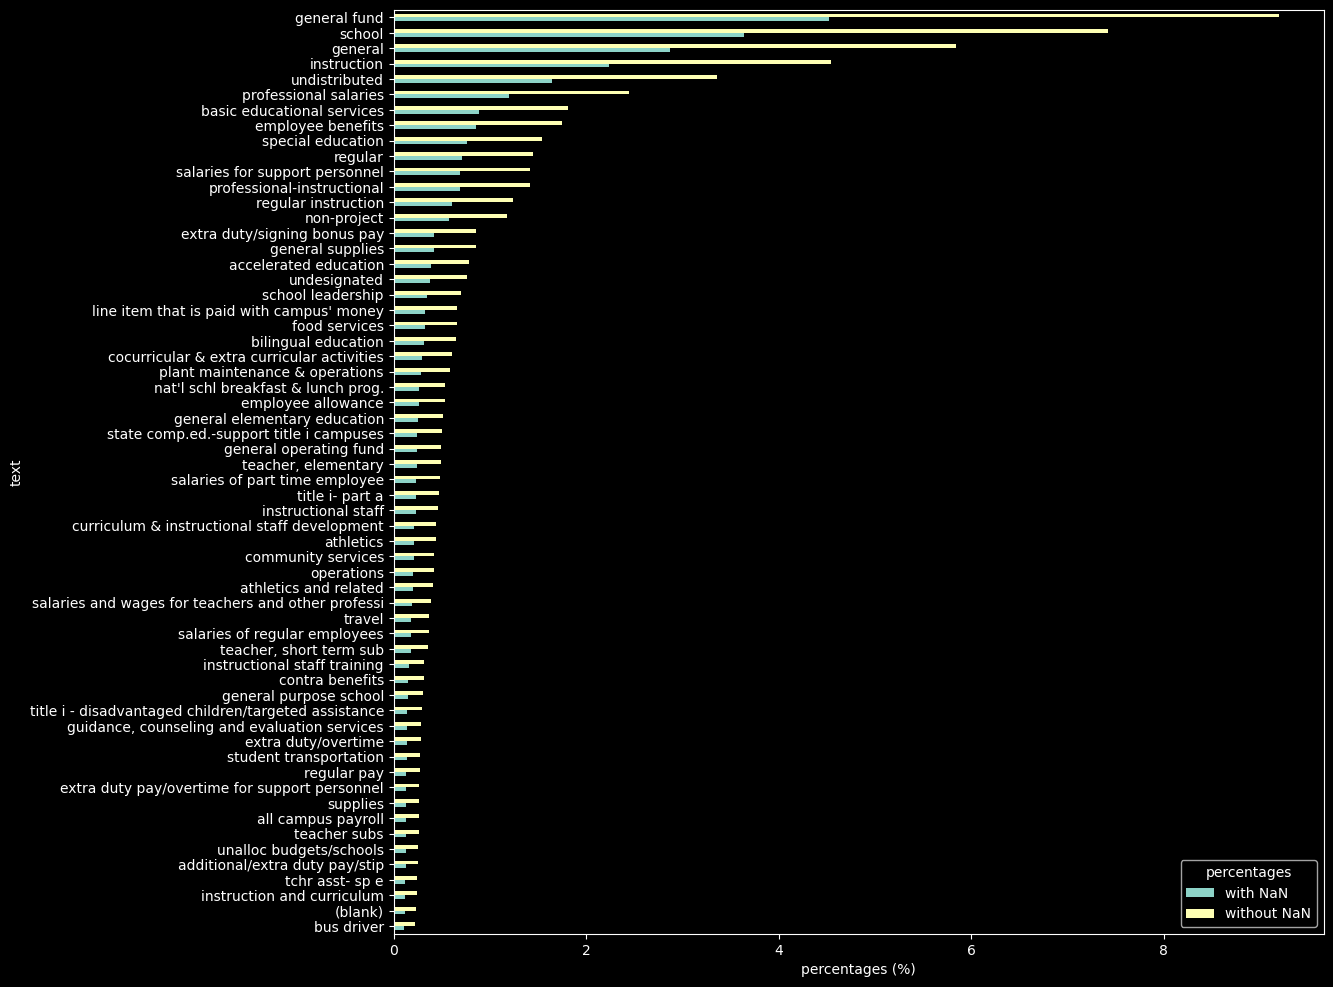

In [131]:
wwo_nan_holdout_cvcs = pd.concat({'with NaN': holdout_cvcs['% w/NaN'].drop('NaN'),
                          'without NaN': holdout_cvcs['% wo/NaN'].drop('NaN')},
                         axis=1, sort=True).sort_values(['with NaN', 'without NaN'])
wwo_nan_holdout_cvcs.index.name='text'
wwo_nan_holdout_cvcs.columns.name='percentages'
wwo_nan_holdout_cvcs.tail(60).plot(kind='barh', stacked=False, figsize=(12, 12))
plt.xlabel('percentages (%)')
plt.show()

### Comparing training-holdout text frequency summaries

percentages                    train   holdout
text                                          
general fund                6.139676  9.202308
employee benefits           3.843661  1.747439
regular                     3.212414  1.450825
professional-instructional  3.133313  1.413349
regular instruction         2.679211  1.236135
...                              ...       ...
wan manager                 0.000000  0.000291
web manager                 0.000000  0.000291
welder                      0.000000  0.000291
youth commission            0.000000  0.000291
NaN                         0.000000  0.000000

[9180 rows x 2 columns]

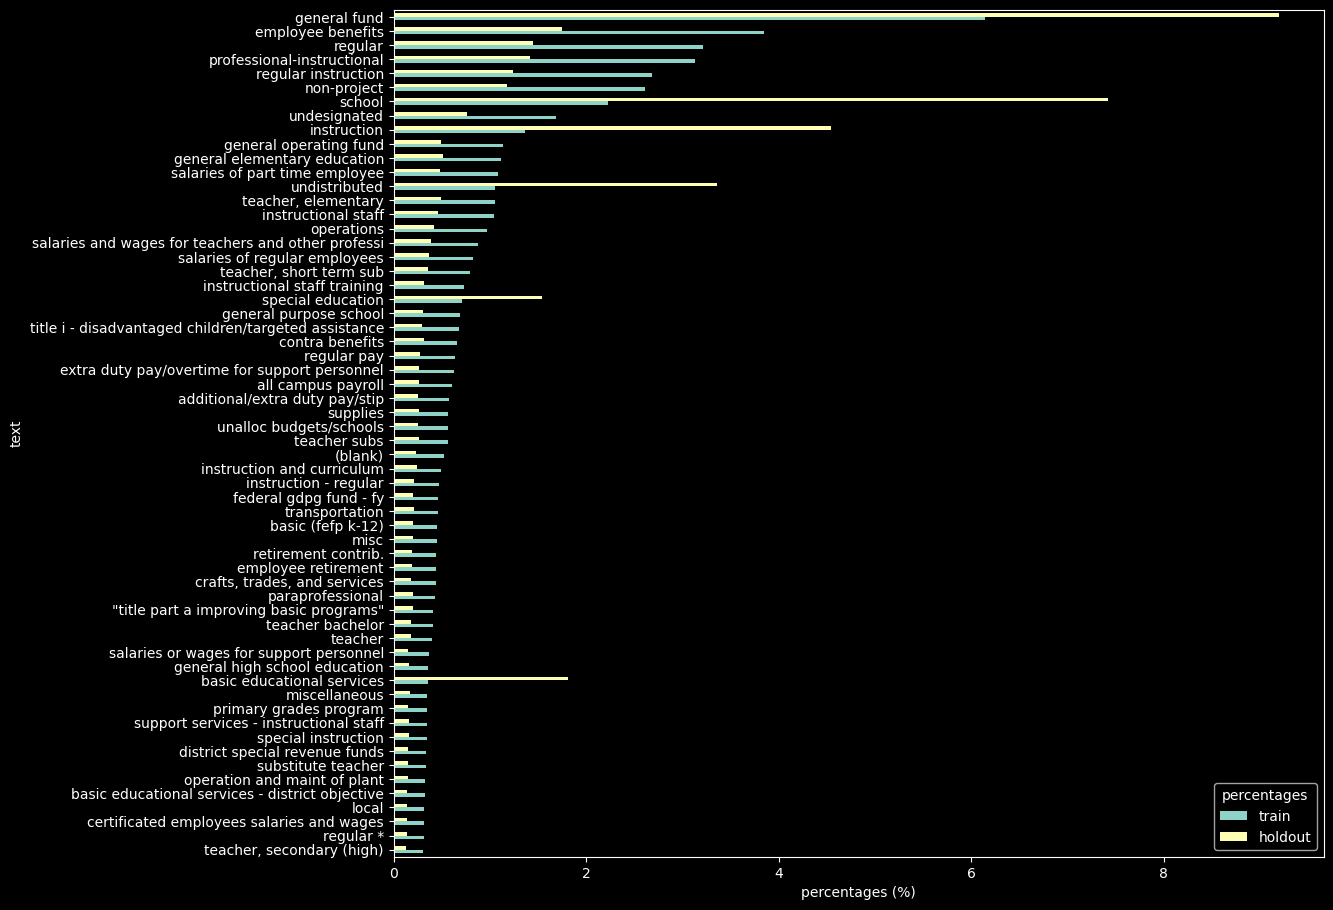

In [132]:
compare_cvcs = pd.concat({'train': cvcs['% wo/NaN'], 'holdout': holdout_cvcs['% wo/NaN']},
                         axis=1, sort=True).fillna(0).sort_values(['train', 'holdout'], ascending=False)
compare_cvcs.index.name='text'
compare_cvcs.columns.name='percentages'
display(compare_cvcs)
compare_cvcs.sort_values(['train', 'holdout']).tail(60).plot(kind='barh', stacked=False, figsize=(12, 11))
plt.xlabel('percentages (%)')
plt.show()

# Metrics

## log loss

Log loss for binary classification

$$logloss = - \frac{1}{N}\sum^N_{i=1}{(y_i log(p_i) + (1-y_i)log(1-p_i))}$$

>Better to be less confident than confident and wrong

In [133]:
from mcr.ml.metrics.log_loss import log_loss
# from sklearn.metrics import log_loss

Wrong and confident       : 34.538776394910684
Wrong and not confident   : 0.916290731874155
Correct and not confident : 0.5108256237659907
Correct and confident     : 9.992007221626415e-16


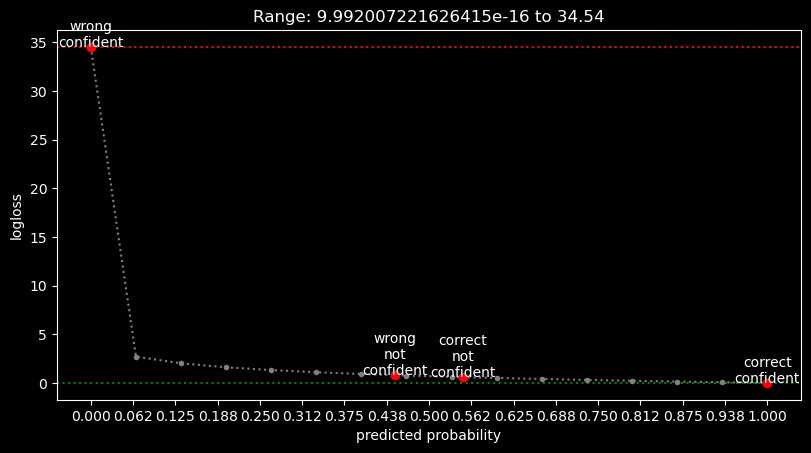

In [155]:
print('Wrong and confident       :', log_loss(y_true=1, y_pred=0))
print('Wrong and not confident   :', log_loss(y_true=1, y_pred=0.4))
print('Correct and not confident :', log_loss(y_true=1, y_pred=0.6))
print('Correct and confident     :', log_loss(y_true=1, y_pred=1))
predicts = np.linspace(0,1,16)
lloss = [log_loss(1,x) for x in predicts]
plt.figure(figsize=(9.6, 4.8))
plt.axhline(0, ls=':', color='g')
plt.axhline(log_loss(1,0), ls=':', color='r')
plt.plot(predicts, lloss, marker='.', linestyle='dotted', color='gray')
points = [0, 0.45, 0.55, 1]
classes = ['wrong\nconfident', 'wrong\nnot\nconfident', 'correct\nnot\nconfident', 'correct\nconfident']
for i, x in enumerate(points):
    y=log_loss(y_true=1, y_pred=x)
    plt.plot(x, y, 'ro')
    plt.text(x, y, s=classes[i], ha='center' )
plt.xticks(np.linspace(0, 1, len(predicts)+1))
plt.title('Range: {0:} to {1:.2f}'.format(lloss[-1], lloss[0]))
plt.xlabel('predicted probability')
plt.ylabel('logloss')
plt.show()

 Log loss penalizes highly confident wrong answers much more than any other type. This is a good metric to use in this model and required by the competition.